Using matplotlib backend: TkAgg
1278


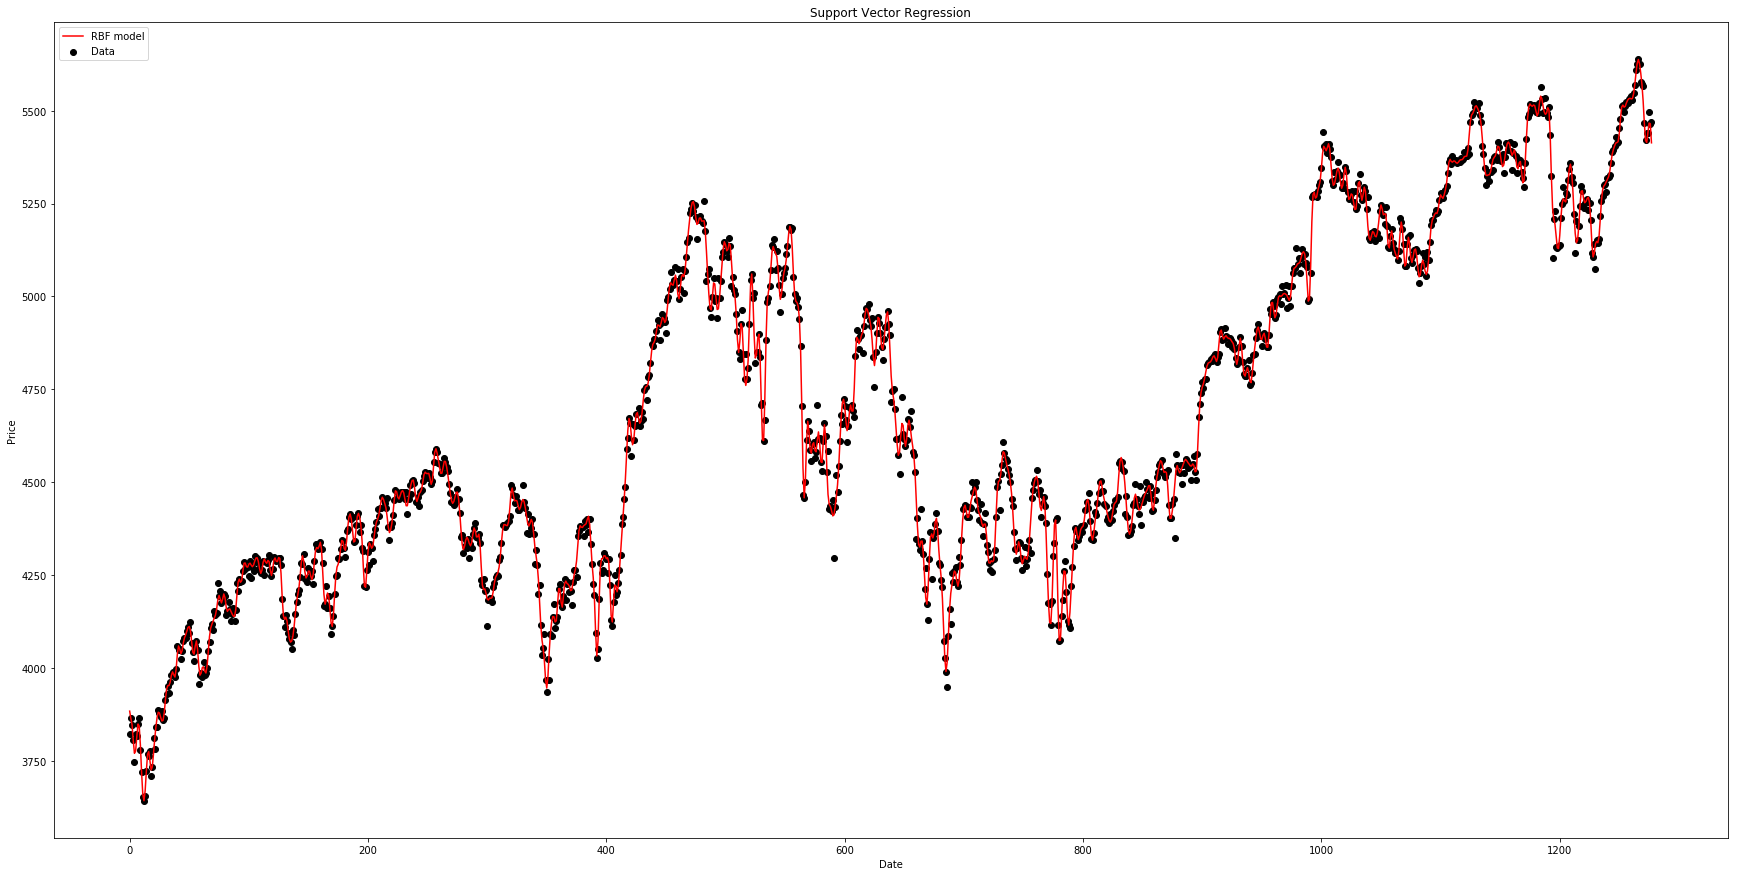

1278
5299.665365245893


In [1]:
# SVR
%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30.0, 15.0)

import csv
import numpy as np
from sklearn.svm import SVR


dates = []
real_dates = []
prices = []

i = 0

def read_data(filename):
    global i
    i = 0
    with open(filename, 'r') as csvFile:
        csvFileReader = csv.reader(csvFile)
        next(csvFileReader)
        for row in csvFileReader:
            real_dates.append(row[0])
            dates.append(i)
            prices.append(float(row[1]))
            i = i+1
        print(i)
    return

def price_prediction_model(dates, prices, x):
    dates = np.reshape(dates, (len(dates),1))
    svr_rbf = SVR(kernel='rbf',C=1e3, gamma = 0.1)
        
    svr_rbf.fit(dates,prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.savefig('test.png', bbox_inches='tight')
    plt.show()
    return svr_rbf.predict(x)[0] 

read_data('CAC40_5Y.csv')

predicted_price = price_prediction_model(dates, prices, i)

print(i)
print(predicted_price)
#SVM not very good at price prediction with 1YR data set
#SVM not very good at price prediction with 5YR data set
# which is normal since SVM is not very good whith large data sets


In [1]:

"""
NEAT evloving a TraderGenome able to buy/sell/hodl fit for maximum returns
Strategy :  if output in :
                - ]-1, -0.33[ then sell
                - [-0.33, 0.33] then hodl
                - ]0.33, 1[ then buy
"""

from __future__ import print_function
import os
import neat
import visualize
import csv
import math
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


# custom gene with buy_count,sell_count and hodl_count
class TraderGenome(neat.DefaultGenome):
    def __init__(self, key):
        super().__init__(key)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def configure_new(self, config):
        super().configure_new(config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def configure_crossover(self, genome1, genome2, config):
        super().configure_crossover(genome1, genome2, config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def mutate(self, config):
        super().mutate(config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def __str__(self):
        return "buy_count: {0}, sell_count: {1}, hodl_count: {2}\n{3}".format(self.buy_count,self.sell_count,self.hodl_count, super().__str__())



# Date, Open, High, Low, Close, Volume
# training data of CAC40 from 2005-06-13 till 2014-12-31
input_training_data = []

# training data of CAC40 from 2015-01-02 till 2018-06-11
input_testing_data = []

# 1 -> buy
# -1 -> sell
# 0 -> hodl
def decide(res):
    if (res > 0.33):
        return 1.0
    elif (res < -0.33):
        return -1.0
    else:
        return 0.0

def normalize_data(data_array):
    data_norm = []
    minx = min(data_array)
    maxx = max(data_array)
    for data in data_array:
        data_norm.append(2*((data-minx)/(maxx-minx))-1)
    return data_norm, minx, maxx

def load_data_from_csv(filename):
    data = []
    data_open = []
    data_high = []
    data_low = []
    data_close = []
    data_volume = []
    with open(filename, 'r') as File:  
        reader = csv.reader(File)
        for row in reader:
            data.append((round(float(row[1]),2),round(float(row[2]),2),round(float(row[3]),2),round(float(row[4]),2),round(float(row[5]),2)))
            data_open.append(round(float(row[1]),2))
            data_high.append(round(float(row[2]),2))
            data_low.append(round(float(row[3]),2))
            data_close.append(round(float(row[4]),2))
            data_volume.append(round(float(row[5]),2))
    return data, data_open,data_high,data_low,data_close,data_volume
            
    
def combine_arrays(arr1,arr2,arr3,arr4,arr5,):
    index = len(arr1)
    output = []
    for i in range(0,index):
        output.append((arr1[i],arr2[i],arr3[i],arr4[i],arr5[i]))
    return output


input_training_data,input_training_data_open,input_training_data_high,input_training_data_low,input_training_data_close,input_training_data_volume = load_data_from_csv('CAC40_2005_2017.csv')
input_testing_data,input_testing_data_open,input_testing_data_high,input_testing_data_low,input_testing_data_close,input_testing_data_volume = load_data_from_csv('CAC40_2017_2018.csv')


input_training_data_open_norm, input_training_data_open_minx, input_training_data_open_maxx = normalize_data(input_training_data_open)
input_training_data_high_norm, input_training_data_high_minx, input_training_data_high_maxx = normalize_data(input_training_data_high)
input_training_data_low_norm, input_training_data_low_minx, input_training_data_low_maxx = normalize_data(input_training_data_low)
input_training_data_close_norm, input_training_data_close_minx, input_training_data_close_maxx = normalize_data(input_training_data_close)
input_training_data_volume_norm, input_training_data_volume_minx, input_training_data_volume_maxx = normalize_data(input_training_data_volume)


input_testing_data_open_norm, input_testing_data_open_minx, input_testing_data_open_maxx = normalize_data(input_testing_data_open)
input_testing_data_high_norm, input_testing_data_high_minx, input_testing_data_high_maxx = normalize_data(input_testing_data_high)
input_testing_data_low_norm, input_testing_data_low_minx, input_testing_data_low_maxx = normalize_data(input_testing_data_low)
input_testing_data_close_norm, input_testing_data_close_minx, input_testing_data_close_maxx = normalize_data(input_testing_data_close)
input_testing_data_volume_norm, input_testing_data_volume_minx, input_testing_data_volume_maxx = normalize_data(input_testing_data_volume)


    
input_training_data_norm = combine_arrays(input_training_data_open_norm,
                                          input_training_data_high_norm,
                                          input_training_data_low_norm,
                                          input_training_data_close_norm,
                                          input_training_data_volume_norm)

input_testing_data_norm = combine_arrays(input_testing_data_open_norm,
                                          input_testing_data_high_norm,
                                          input_testing_data_low_norm,
                                          input_testing_data_close_norm,
                                          input_testing_data_volume_norm)


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        money = 100000.0
        genome.fitness = 0
        shares = 0
        net = neat.nn.RecurrentNetwork.create(genome, config)
        size = len(input_training_data)
        genome.buy_count = 0
        genome.sell_count = 0
        genome.hodl_count = 0
        for i, input_data in enumerate(input_training_data_norm):
            if (i < size-1):
                #input_data = (input_data) + (shares,money,)
                output = net.activate(input_data)
                decision = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares > 0):
                    shares = shares-1
                    money = money + input_training_data[i+1][0] #Sell on market open
                    genome.sell_count = genome.sell_count+1
                
                elif (decision == 1 and money > input_training_data[i+1][0]):
                    shares = shares+1
                    money = money - input_training_data[i+1][0] #Buy on market open
                    genome.buy_count = genome.buy_count+1
                else: 
                    genome.hodl_count = genome.hodl_count+1
                    
        genome.fitness = ((money + shares*input_training_data[size-1][0]) - 100000.0)/1000.0 #returns in %
        if(genome.buy_count == 0 or genome.sell_count == 0):
            genome.fitness = genome.fitness - 50
        #if(genome.hodl_count > genome.sell_count + genome.buy_count):
        #    op_sum = genome.sell_count + genome.buy_count
        #    penality = 80
        #    if (op_sum != 0):
        #        penality == 30*genome.hodl_count/(op_sum)

        #   genome.fitness -= math.floor(penality)


                
#EXECUSTION            
local_dir = os.getcwd()
config_path = os.path.join(local_dir, 'config-tradergenome')
# Load configuration.
config = neat.Config(TraderGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(5))

# Run for up to X generations.
winner = p.run(eval_genomes, NONE)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

print('\nOutput:')
winner_net = neat.nn.RecurrentNetwork.create(winner, config)

node_names = {-1:'Open', -2: 'High',-3: 'Low',-4: 'Close',-5: 'Volume', 0:'Decide'}
visualize.draw_net(config, winner, True, node_names=node_names)
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

"""
Testing best TraderGenome 2017-2018
"""

def test_best(input_test,input_test_norm):
    capital = 100000.0
    shares = 0
    size = len(input_test)
    buy_count = 0
    sell_count = 0
    hodl_count = 0
    for i, input_data in enumerate(input_test_norm):
        if (i < size-1):
                #input_data = (input_data) + (shares,capital,)
                output = winner_net.activate(input_data)
                decision = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares > 0):
                    shares = shares-1
                    capital = capital + input_test[i+1][0] #Sell on market open
                    sell_count = sell_count+1

                elif (decision == 1 and capital > input_test[i+1][0]):
                    shares = shares+1
                    capital = capital - input_test[i+1][0] #Buy on market open
                    buy_count = buy_count+1
                else: 
                    hodl_count = hodl_count+1
    print('Money: {!r}, Shares: {!r}\n'.format(capital,shares))
    print('buy_count: {!r}, sell_count: {!r}, hodl_count: {!r}\n'.format(buy_count,sell_count,hodl_count))        

print('2017-2018 test')
test_best(input_testing_data,input_testing_data_norm)
    
"""
Testing TraderGenome 2005-2018
"""

input_testing_data_norm_full = input_training_data_norm + input_testing_data_norm

input_testing_data_full = input_training_data + input_testing_data

print('2005-2018 test')
test_best(input_testing_data_full,input_testing_data_norm_full)



FileNotFoundError: [Errno 2] No such file or directory: 'CAC40_2005_2017.csv'

In [1]:


from __future__ import print_function
import os
import neat
import visualize
import csv
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

local_dir = os.getcwd()
config_path = os.path.join(local_dir, 'config-tradergenome')
# Load configuration.
config = neat.Config(TraderGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)




p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-673')
winner = p.run(eval_genomes, 100)

winner_net = neat.nn.RecurrentNetwork.create(winner, config)


"""
Testing best TraderGenome 2017-2018
"""

def test_best(input_test,input_test_norm):
    capital = 100000.0
    shares = 0
    size = len(input_test)
    buy_count = 0
    sell_count = 0
    hodl_count = 0
    for i, input_data in enumerate(input_test_norm):
        if (i < size-1):
                #input_data = (input_data) + (shares,capital,)
                output = winner_net.activate(input_data)
                decision = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                string_dec = ''
                if (decision == -1 and shares > 0):
                    shares = shares-1
                    capital = capital + input_test[i+1][0] #Sell on market open
                    sell_count = sell_count+1
                    string_dec = 'Sell'

                elif (decision == 1 and capital > input_test[i+1][0]):
                    shares = shares+1
                    capital = capital - input_test[i+1][0] #Buy on market open
                    buy_count = buy_count+1
                    string_dec = 'Buy'
                else: 
                    hodl_count = hodl_count+1
                    string_dec = 'Hodl'
                
               # print('{!r}->{!s}: (Money: {!r}, Shares: {!r})'.format(i,string_dec,capital,shares))
    print('Money: {!r}, Shares: {!r}\n'.format(capital,shares))
    print('buy_count: {!r}, sell_count: {!r}, hodl_count: {!r}\n'.format(buy_count,sell_count,hodl_count))        


print('2017-2018 test')
test_best(input_testing_data,input_testing_data_norm)
    
"""
Testing TraderGenome 2005-2018
"""

input_testing_data_norm_full = input_training_data_norm + input_testing_data_norm

input_testing_data_full = input_training_data + input_testing_data

print('2005-2018 test')
test_best(input_testing_data_full,input_testing_data_norm_full)


NameError: name 'TraderGenome' is not defined


 ****** Running generation 0 ****** 



c:\users\mbouqsimi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: divide by zero encountered in arctanh


Population's average fitness: -7100.56539 stdev: 2583.55365
Best fitness: -2620.44172 - size: (18, 172) - species 1 - id 147
Average adjusted fitness: 0.332
Mean genetic distance 4.108, standard deviation 0.382
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    98  -2620.4    0.372     0
     2    0    59  -3331.0    0.440     0
     3    0   130  -3178.1    0.339     0
     4    0    36  -2845.9    0.517     0
     5    0    24  -4609.0    0.280     0
     6    0    39  -4415.9    0.197     0
     7    0     9  -3105.3    0.179     0
     8    0     5       --       --     0
Total extinctions: 0
Generation time: 63.753 sec

Best genome:
buy_count: 506, sell_count: 614, hodl_count: 1319
Key: 147
Fitness: -2620.44172
Nodes:
	0 DefaultNodeGene(key=0, bias=1.5767172635497335, response=1.0, activation=tanh, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=0.015960938213784786, response=1.0, activation=ta

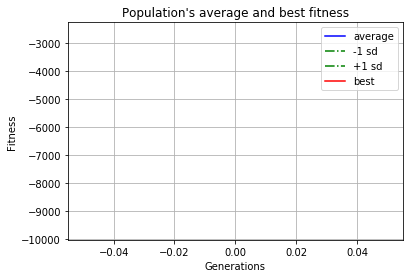

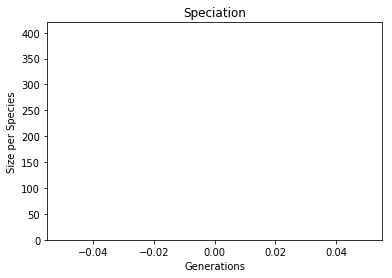

2005-2014 test
Money: 96277.43000000007, Shares: 5, Returns: 17.56%

buy_count: 506, sell_count: 614, hodl_count: 1319

2015-2018 test
Money: 90004.40000000001, Shares: 6, Returns: 22.76%

buy_count: 228, sell_count: 264, hodl_count: 383



In [2]:

"""
NEAT evloving a TraderGenome able to buy/sell/hodl fit for maximum returns
Strategy :  -transform output from ]-1,1[ to ]-5,5[
            -compute the floor of the absolute value of the output and its sign
            -output > 0 then buy or sell (sign -1 sell, sign +1 buy)
            -output = 0 then hodl 
"""

from __future__ import print_function
import os
import neat
import visualize
import csv
import numpy as np
import math

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


# custom gene with buy_count,sell_count and hodl_count
class TraderGenome(neat.DefaultGenome):
    def __init__(self, key):
        super().__init__(key)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def configure_new(self, config):
        super().configure_new(config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def configure_crossover(self, genome1, genome2, config):
        super().configure_crossover(genome1, genome2, config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def mutate(self, config):
        super().mutate(config)
        self.buy_count = 0
        self.sell_count = 0
        self.hodl_count = 0

    def __str__(self):
        return "buy_count: {0}, sell_count: {1}, hodl_count: {2}\n{3}".format(self.buy_count,self.sell_count,self.hodl_count, super().__str__())



# Date, Open, High, Low, Close, Volume
# training data of CAC40 from 2005-06-13 till 2014-12-31
input_training_data = []

# training data of CAC40 from 2015-01-02 till 2018-06-11
input_testing_data = []    
    

def normalize_data(data_array):
    data_norm = []
    minx = min(data_array)
    maxx = max(data_array)
    for data in data_array:
        data_norm.append(2*((data-minx)/(maxx-minx))-1)
    return data_norm, minx, maxx

def load_data_from_csv(filename):
    data = []
    data_open = []
    data_high = []
    data_low = []
    data_close = []
    data_volume = []
    with open(filename, 'r') as File:  
        reader = csv.reader(File)
        for row in reader:
            data.append((round(float(row[1]),2),round(float(row[2]),2),round(float(row[3]),2),round(float(row[4]),2),round(float(row[5]),2)))
            data_open.append(round(float(row[1]),2))
            data_high.append(round(float(row[2]),2))
            data_low.append(round(float(row[3]),2))
            data_close.append(round(float(row[4]),2))
            data_volume.append(round(float(row[5]),2))
    return data, data_open,data_high,data_low,data_close,data_volume
            
    
def combine_arrays(arr1,arr2,arr3,arr4,arr5,):
    index = len(arr1)
    output = []
    for i in range(0,index):
        output.append((arr1[i],arr2[i],arr3[i],arr4[i],arr5[i]))
    return output


input_training_data,input_training_data_open,input_training_data_high,input_training_data_low,input_training_data_close,input_training_data_volume = load_data_from_csv('CAC40_2005_2014.csv')
input_testing_data,input_testing_data_open,input_testing_data_high,input_testing_data_low,input_testing_data_close,input_testing_data_volume = load_data_from_csv('CAC40_2015_2018.csv')


input_training_data_open_norm, input_training_data_open_minx, input_training_data_open_maxx = normalize_data(input_training_data_open)
input_training_data_high_norm, input_training_data_high_minx, input_training_data_high_maxx = normalize_data(input_training_data_high)
input_training_data_low_norm, input_training_data_low_minx, input_training_data_low_maxx = normalize_data(input_training_data_low)
input_training_data_close_norm, input_training_data_close_minx, input_training_data_close_maxx = normalize_data(input_training_data_close)
input_training_data_volume_norm, input_training_data_volume_minx, input_training_data_volume_maxx = normalize_data(input_training_data_volume)


input_testing_data_open_norm, input_testing_data_open_minx, input_testing_data_open_maxx = normalize_data(input_testing_data_open)
input_testing_data_high_norm, input_testing_data_high_minx, input_testing_data_high_maxx = normalize_data(input_testing_data_high)
input_testing_data_low_norm, input_testing_data_low_minx, input_testing_data_low_maxx = normalize_data(input_testing_data_low)
input_testing_data_close_norm, input_testing_data_close_minx, input_testing_data_close_maxx = normalize_data(input_testing_data_close)
input_testing_data_volume_norm, input_testing_data_volume_minx, input_testing_data_volume_maxx = normalize_data(input_testing_data_volume)


    
input_training_data_norm = combine_arrays(input_training_data_open_norm,
                                          input_training_data_high_norm,
                                          input_training_data_low_norm,
                                          input_training_data_close_norm,
                                          input_training_data_volume_norm)

input_testing_data_norm = combine_arrays(input_testing_data_open_norm,
                                          input_testing_data_high_norm,
                                          input_testing_data_low_norm,
                                          input_testing_data_close_norm,
                                          input_testing_data_volume_norm)


# input:
#    res[0] -> buy
#    res[1] -> hodl
#    res[2] -> sell
#    res[3] -> quantity
#
# firt output:
#    1 -> buy
#    -1 -> sell
#    0 -> hodl
# second output: share amount to buy/sell
def decide(output):
    amount = np.arctanh(output[3]) #denormalizing shares amount ???
    values = output[:3]
    i = values.index(max(values))
    if(np.isinf(amount) or np.isnan(amount)):
        amount = 0
        res = 0
    elif i==0:
        res = 1
    elif i==1:
        res = 0
    elif i==2:
        res = -1
    return res, math.floor(amount)


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        money = 100000.0
        genome.fitness = 0
        shares = 0
        net = neat.nn.RecurrentNetwork.create(genome, config)
        size = len(input_training_data)
        genome.buy_count = 0
        genome.sell_count = 0
        genome.hodl_count = 0
        for i, input_data in enumerate(input_training_data_norm):
            if (i < size-1):
                input_data = (input_data) + (np.tanh(shares),np.tanh(money),) #shares and capital normalized ???
                output = net.activate(input_data)
                decision, amount = decide(output) # 0:buy, 1:hodl, 2:sell, 3:quantity
                if (decision == -1 and shares >= amount and amount > 0):
                    shares = shares-amount
                    money = money + (amount*input_training_data[i+1][0]) #Sell on market open
                    genome.sell_count = genome.sell_count+1
                
                elif (decision == 1 and money >= (amount*input_training_data[i+1][0]) and amount > 0):
                    shares = shares+amount
                    money = money - (amount*input_training_data[i+1][0]) #Buy on market open
                    genome.buy_count = genome.buy_count+1
                else: 
                    genome.hodl_count = genome.hodl_count+1
                    
        genome.fitness = ((money + shares*input_training_data[-1][0]) - 100000.0)/1000.0 #returns in %
        penality = 2*genome.hodl_count
        if(genome.buy_count == 0 or genome.sell_count == 0):
            genome.fitness = genome.fitness - penality
        if(genome.hodl_count > genome.sell_count + genome.buy_count):
            op_sum = genome.sell_count + genome.buy_count
            if (op_sum != 0):
                penality == 30*genome.hodl_count/op_sum

            genome.fitness -= math.floor(penality)


                
#EXECUSTION            
local_dir = os.getcwd()
config_path = os.path.join(local_dir, 'config-tradergenome')
# Load configuration.
config = neat.Config(TraderGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(10))

# Run for up to X generations.
winner = p.run(eval_genomes, 1)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

print('\nOutput:')
winner_net = neat.nn.RecurrentNetwork.create(winner, config)

node_names = {-1:'Open', -2: 'High',-3: 'Low',-4: 'Close',-5: 'Volume',-6: 'Shares',-7: 'Money', 0:'Buy', 1:'Hodl', 2:'Sell', 3:'Quantity'}
visualize.draw_net(config, winner, True, node_names=node_names)
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

"""
Testing best TraderGenome 2017-2018
"""

def test_best(input_test,input_test_norm):
    capital = 100000.0
    shares = 0
    size = len(input_test)
    buy_count = 0
    sell_count = 0
    hodl_count = 0
    for i, input_data in enumerate(input_test_norm):
        if (i < size-1):
                input_data = (input_data) + (np.tanh(shares),np.tanh(capital),) #shares and capital normalized ???
                output = winner_net.activate(input_data)
                decision, amount = decide(output) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares >= amount and amount > 0):
                    shares = shares-amount
                    capital = capital + (amount*input_test[i+1][0]) #Sell on market open
                    sell_count = sell_count+1

                elif (decision == 1 and capital >= (amount*input_test[i+1][0]) and amount > 0):
                    shares = shares+amount
                    capital = capital - (amount*input_test[i+1][0]) #Buy on market open
                    buy_count = buy_count+1
                else: 
                    hodl_count = hodl_count+1
    print('Money: {!r}, Shares: {!r}, Returns: {!r}%\n'.format(capital,shares, round(((capital+shares*input_test[-1][0])-100000.0)/1000.0,2)))
    print('buy_count: {!r}, sell_count: {!r}, hodl_count: {!r}\n'.format(buy_count,sell_count,hodl_count))        



"""
Testing TraderGenome 2005-2014
"""
print('2005-2014 test')
test_best(input_training_data,input_training_data_norm)


"""
Testing TraderGenome 2015-2018
"""
print('2015-2018 test')
test_best(input_testing_data,input_testing_data_norm)


"""
Testing TraderGenome 2005-2018
"""

input_testing_data_norm_full = input_training_data_norm + input_testing_data_norm

input_testing_data_full = input_training_data + input_testing_data

#print('2005-2018 test')
#test_best(input_testing_data_full,input_testing_data_norm_full)


In [ ]:
"""
Resuming after suspention
"""
from __future__ import print_function
import os
import neat
import visualize
import csv
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

local_dir = os.getcwd()
config_path = os.path.join(local_dir, 'config-tradergenome')
# Load configuration.
config = neat.Config(TraderGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)




p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4309')

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(10))

winner = p.run(eval_genomes, None)

# Display the winning genome.
print('\nBest genome:\n{!s}'.format(winner))

print('\nOutput:')
winner_net = neat.nn.RecurrentNetwork.create(winner, config)

node_names = {-1:'Open', -2: 'High',-3: 'Low',-4: 'Close',-5: 'Volume',-6: 'Shares',-7: 'Money', 0:'Buy', 1:'Hodl', 2:'Sell', 3:'Quantity'}
visualize.draw_net(config, winner, True, node_names=node_names)
visualize.plot_stats(stats, ylog=False, view=True)
visualize.plot_species(stats, view=True)

"""
Testing TraderGenome 2005-2017
"""
print('2005-2017 test')
test_best(input_training_data,input_training_data_norm)


"""
Testing TraderGenome 2017-2018
"""
print('2017-2018 test')
test_best(input_testing_data,input_testing_data_norm)



 ****** Running generation 4309 ****** 



c:\users\mbouqsimi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:139: RuntimeWarning: divide by zero encountered in arctanh


Population's average fitness: -2176.65448 stdev: 3460.96038
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.759
Mean genetic distance 4.057, standard deviation 0.820
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3445    81    241.4    0.762  3169
   205  2160    82    242.6    0.798  1415
   291  1127    78    245.7    0.712  1125
   374   55    79    179.0    0.789     7
   379   38    81    194.7    0.732     2
Total extinctions: 0
Generation time: 73.530 sec
Saving checkpoint to neat-checkpoint-4309

 ****** Running generation 4310 ****** 

Population's average fitness: -1878.65458 stdev: 3337.68560
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.787
Mean genetic distance 4.062, standard deviation 0.813
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =

Population's average fitness: -1887.71294 stdev: 3344.98044
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.787
Mean genetic distance 4.069, standard deviation 0.785
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3458    78    241.4    0.715  3182
   205  2173    79    242.6    0.799  1428
   291  1140    84    245.7    0.855  1138
   374   68    77    179.0    0.763    20
   379   51    81    194.7    0.802    15
Total extinctions: 0
Generation time: 71.629 sec (71.802 average)

 ****** Running generation 4323 ****** 

Population's average fitness: -2013.14095 stdev: 3358.02028
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.773
Mean genetic distance 4.050, standard deviation 0.811
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   

Population's average fitness: -1969.43792 stdev: 3378.32095
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.778
Mean genetic distance 4.012, standard deviation 0.819
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3470    77    241.4    0.760  3194
   205  2185    81    242.6    0.777  1440
   291  1152    82    245.7    0.809  1150
   379   63    81    194.7    0.765    27
   380    9    79    210.4    0.781     7
Total extinctions: 0
Generation time: 69.319 sec (70.598 average)
Saving checkpoint to neat-checkpoint-4334

 ****** Running generation 4335 ****** 

Population's average fitness: -1892.35937 stdev: 3452.28589
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.786
Mean genetic distance 4.020, standard deviation 0.818
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  =

Population's average fitness: -1739.50032 stdev: 3174.51066
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.802
Mean genetic distance 4.015, standard deviation 0.722
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3482    58    241.4    0.804  3206
   205  2197    57    242.6    0.783  1452
   291  1164    61    245.7    0.847  1162
   380   21    58    210.4    0.816    19
   381    8    54    133.8    0.795     1
   382    7    59    106.2    0.736     0
   383    3    54    135.9    0.832     1
Total extinctions: 0
Generation time: 71.225 sec (70.544 average)

 ****** Running generation 4347 ****** 

Population's average fitness: -1820.23813 stdev: 3199.67881
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.795
Mean genetic distance 4.031, standard deviation 0.712
Population of 400 members in 7 species:
   

Population's average fitness: -1981.25901 stdev: 3190.39832
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 380 with 55 members is stagnated: removing it
Average adjusted fitness: 0.779
Mean genetic distance 4.131, standard deviation 0.643
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3493    66    241.4    0.786  3217
   205  2208    68    242.6    0.809  1463
   291  1175    63    245.7    0.715  1173
   381   19    68    164.7    0.745     2
   382   18    64    141.4    0.789     4
   383   14    72    162.7    0.830     0
Total extinctions: 0
Generation time: 68.109 sec (67.748 average)

 ****** Running generation 4358 ****** 

Population's average fitness: -1918.13546 stdev: 3212.25906
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.784
Mean genetic distance 4.126, standard deviation 0.613
Population of 401 members in 6

Population's average fitness: -1776.51118 stdev: 3023.46308
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.798
Mean genetic distance 4.129, standard deviation 0.679
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3505    66    241.4    0.764  3229
   205  2220    63    242.6    0.747  1475
   291  1187    68    245.7    0.842  1185
   381   31    68    172.6    0.849    11
   382   30    66    154.6    0.791     4
   383   26    69    175.1    0.794     5
Total extinctions: 0
Generation time: 66.250 sec (67.252 average)
Saving checkpoint to neat-checkpoint-4369

 ****** Running generation 4370 ****** 

Population's average fitness: -1658.85875 stdev: 3003.82123
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.809
Mean genetic distance 4.166, standard deviation 0.681
Population of 400 members in 7 species:
   


 ****** Running generation 4380 ****** 

Population's average fitness: -2068.89213 stdev: 3361.69405
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.762
Mean genetic distance 4.336, standard deviation 0.714
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3516    48    241.4    0.847  3240
   205  2231    46    242.6    0.805  1486
   291  1198    48    245.7    0.773  1196
   381   42    49    173.1    0.818     6
   382   41    41    147.1    0.779    15
   383   37    43    175.1    0.678    16
   384   10    24    118.6    0.757     4
   385    3    42    154.6    0.722     1
   386    2    27     57.0    0.769     1
   387    1    32    135.6    0.674     0
Total extinctions: 0
Generation time: 64.451 sec (64.582 average)

 ****** Running generation 4381 ****** 

Population's average fitness: -2359.91534 stdev: 3605.16347
Best fitness: 245.67152 - si


 ****** Running generation 4390 ****** 

Population's average fitness: -2073.13036 stdev: 3311.19027
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.767
Mean genetic distance 4.266, standard deviation 0.722
Population of 398 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3526    42    241.4    0.781  3250
   205  2241    36    242.6    0.670  1496
   291  1208    39    245.7    0.736  1206
   381   52    42    173.1    0.806    16
   382   51    39    156.4    0.766     6
   383   47    40    175.1    0.804    26
   384   20    42    114.9    0.809    14
   385   13    40    154.6    0.789    11
   386   12    39    136.3    0.808     0
   387   11    39    153.5    0.706     5
Total extinctions: 0
Generation time: 62.188 sec (62.746 average)

 ****** Running generation 4391 ****** 

Population's average fitness: -2160.47480 stdev: 3388.14088
Best fitness: 245.67152 - si

Population's average fitness: -1787.86464 stdev: 3202.85849
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.798
Mean genetic distance 4.351, standard deviation 0.788
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3536    43    241.4    0.865  3260
   205  2251    37    242.6    0.751  1506
   291  1218    38    245.7    0.706  1216
   381   62    41    175.3    0.790     2
   382   61    42    156.4    0.821    16
   384   30    41    134.1    0.698    24
   385   23    40    154.6    0.838    21
   386   22    39    144.3    0.786     3
   387   21    41    153.5    0.870     1
   388    4    37    133.6    0.855     0
Total extinctions: 0
Generation time: 58.125 sec (58.774 average)

 ****** Running generation 4401 ****** 

Population's average fitness: -1833.23139 stdev: 3188.61580
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Av

Population's average fitness: -1885.33531 stdev: 3124.71739
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.787
Mean genetic distance 4.272, standard deviation 0.814
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3546    52    241.4    0.844  3270
   205  2261    54    242.6    0.903  1516
   291  1228    49    245.7    0.762  1226
   381   72    48    183.3    0.696     4
   382   71    48    156.4    0.732    26
   386   32    48    144.3    0.783    13
   387   31    50    199.5    0.801     0
   388   14    50    133.6    0.774    10
Total extinctions: 0
Generation time: 59.954 sec (58.737 average)

 ****** Running generation 4411 ****** 

Population's average fitness: -1925.18882 stdev: 3203.97270
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.782
Mean genetic distance 4.275, standard deviation 0.786
P

Population's average fitness: -1738.60332 stdev: 3167.09787
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.783
Mean genetic distance 4.366, standard deviation 0.740
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3557    55    241.4    0.836  3281
   205  2272    57    242.6    0.851  1527
   291  1239    53    245.7    0.795  1237
   381   83    67    189.2    0.769     6
   386   43    50    144.3    0.725    24
   387   42    55    203.9    0.845     7
   388   25    55    146.3    0.802     8
   389    1     7    173.5    0.644     0
Total extinctions: 0
Generation time: 61.706 sec (61.243 average)

 ****** Running generation 4422 ****** 

Population's average fitness: -1984.80774 stdev: 3443.49795
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.783
Mean genetic distance 4.305, standard deviation 0.802
P

Population's average fitness: -1935.98120 stdev: 3260.72247
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.780
Mean genetic distance 4.263, standard deviation 0.749
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3568    54    241.4    0.871  3292
   205  2283    52    242.6    0.835  1538
   291  1250    49    245.7    0.809  1248
   381   94    49    189.2    0.719    17
   386   54    51    153.4    0.774     0
   387   53    44    203.9    0.700    18
   388   36    53    146.3    0.810    19
   389   12    47    185.9    0.725     4
Total extinctions: 0
Generation time: 60.470 sec (60.907 average)

 ****** Running generation 4433 ****** 

Population's average fitness: -2112.48727 stdev: 3455.04304
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.763
Mean genetic distance 4.275, standard deviation 0.711
P

Population's average fitness: -1732.54522 stdev: 3148.49121
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 388 with 51 members is stagnated: removing it
Average adjusted fitness: 0.794
Mean genetic distance 4.167, standard deviation 0.715
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3579    55    241.4    0.787  3303
   205  2294    57    242.6    0.764  1549
   291  1261    54    245.7    0.728  1259
   381  105    63    197.6    0.835     5
   386   65    59    165.7    0.844    10
   387   64    59    203.9    0.848    29
   389   23    53    185.9    0.752    15
Total extinctions: 0
Generation time: 60.627 sec (60.675 average)
Saving checkpoint to neat-checkpoint-4443

 ****** Running generation 4444 ****** 

Population's average fitness: -2195.52721 stdev: 3519.89966
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 387 with 59 members is 

Population's average fitness: -2261.47993 stdev: 3392.76316
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.749
Mean genetic distance 4.194, standard deviation 0.735
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3591    67    241.4    0.729  3315
   205  2306    66    245.0    0.768  1561
   291  1273    68    245.7    0.778  1271
   381  117    67    221.7    0.763     1
   386   77    66    165.7    0.749    22
   389   35    65    185.9    0.708    27
Total extinctions: 0
Generation time: 60.283 sec (60.870 average)

 ****** Running generation 4456 ****** 

Population's average fitness: -2262.65352 stdev: 3493.13671
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.749
Mean genetic distance 4.265, standard deviation 0.724
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  =

Population's average fitness: -1718.55840 stdev: 3064.90689
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.802
Mean genetic distance 4.150, standard deviation 0.756
Population of 402 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3603    82    241.4    0.831  3327
   205  2318    82    245.0    0.817  1573
   291  1285    73    245.7    0.751  1283
   381  129    82    221.7    0.789    13
   390   11    83    165.4    0.823     4
Total extinctions: 0
Generation time: 61.642 sec (61.057 average)

 ****** Running generation 4468 ****** 

Population's average fitness: -1856.11117 stdev: 3250.17748
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.790
Mean genetic distance 4.143, standard deviation 0.750
Population of 402 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   

Mean genetic distance 4.316, standard deviation 0.608
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3614    48    241.4    0.823  3338
   205  2329    46    245.0    0.742  1584
   291  1296    43    245.7    0.738  1294
   381  140    46    221.7    0.752    24
   390   22    48    164.1    0.771    15
   391    7    36    145.2    0.846     4
   392    5    48    181.2    0.858     2
   393    4    42     89.8    0.812     0
   394    2    42    130.4    0.816     0
   395    1     2  -9756.0    0.000     0
Total extinctions: 0
Generation time: 60.493 sec (61.709 average)
Saving checkpoint to neat-checkpoint-4478

 ****** Running generation 4479 ****** 

Population's average fitness: -1716.86714 stdev: 3192.82154
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.727
Mean genetic distance 4.335, standard deviation 0.597
Population of 400 members in 11 sp

Population's average fitness: -1941.61673 stdev: 3191.72424
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.779
Mean genetic distance 4.366, standard deviation 0.670
Population of 397 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3624    41    241.4    0.771  3348
   205  2339    43    245.0    0.823  1594
   291  1306    40    245.7    0.805  1304
   390   32    33    151.8    0.780    25
   391   17    50    185.8    0.825     0
   392   15    36    181.2    0.712    12
   393   14    42    120.8    0.840     5
   394   12    38    155.1    0.803     5
   395   11    34    146.6    0.720     2
   396    9    35    180.3    0.715     5
   397    0     5       --       --     0
Total extinctions: 0
Generation time: 58.766 sec (59.497 average)

 ****** Running generation 4489 ****** 

Population's average fitness: -2059.99559 stdev: 3390.67337
Best fitness: 245.67152 - si

Mean genetic distance 4.451, standard deviation 0.725
Population of 398 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3633    42    241.4    0.795  3357
   205  2348    36    245.0    0.748  1603
   291  1315    37    245.7    0.719  1313
   391   26    42    185.8    0.808     9
   392   24    39    181.2    0.678    21
   393   23    41    152.3    0.800     0
   394   21    40    163.8    0.739    14
   395   20    45    168.9    0.889     1
   396   18    34    180.3    0.617    14
   397    9    42    148.0    0.774     3
Total extinctions: 0
Generation time: 59.363 sec (59.439 average)

 ****** Running generation 4498 ****** 

Population's average fitness: -1778.08878 stdev: 3131.64408
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.796
Mean genetic distance 4.480, standard deviation 0.743
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit

Population's average fitness: -1862.25393 stdev: 3244.84894
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.788
Mean genetic distance 4.475, standard deviation 0.794
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3643    45    241.4    0.797  3367
   205  2358    41    245.0    0.732  1613
   291  1325    42    245.7    0.770  1323
   391   36    42    195.6    0.681     5
   393   33    46    152.3    0.773    10
   394   31    47    182.7    0.878     9
   395   30    43    206.5    0.747     6
   396   28    45    182.2    0.842     9
   397   19    50    163.9    0.874     1
Total extinctions: 0
Generation time: 60.063 sec (59.869 average)

 ****** Running generation 4508 ****** 

Population's average fitness: -2144.00044 stdev: 3440.15683
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.759
Mean genetic 

Population's average fitness: -1876.29373 stdev: 3251.89696
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.790
Mean genetic distance 4.421, standard deviation 0.798
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3653    41    241.4    0.804  3377
   205  2368    36    245.0    0.718  1623
   291  1335    39    245.7    0.753  1333
   391   46    38    195.6    0.710    15
   393   43    41    164.3    0.848     8
   394   41    41    195.7    0.825     8
   395   40    38    206.5    0.716    16
   396   38    41    182.2    0.829    19
   397   29    52    171.1    0.819     5
   398    7    32    132.8    0.881     3
Total extinctions: 0
Generation time: 59.605 sec (59.933 average)

 ****** Running generation 4518 ****** 

Population's average fitness: -2058.24332 stdev: 3309.92197
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Av

Mean genetic distance 4.425, standard deviation 0.786
Population of 403 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3662    36    241.4    0.758  3386
   205  2377    38    245.0    0.795  1632
   291  1344    38    245.7    0.812  1342
   391   55    35    200.0    0.714     6
   393   52    36    164.3    0.740    17
   394   50    36    195.7    0.763    17
   395   49    36    206.5    0.823    25
   396   47    35    182.2    0.746    28
   397   38    35    135.3    0.773     6
   398   16    40    138.4    0.860    12
   399    6    38    171.7    0.880     4
Total extinctions: 0
Generation time: 59.145 sec (59.543 average)

 ****** Running generation 4527 ****** 

Population's average fitness: -1880.74895 stdev: 3309.73716
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.786
Mean genetic distance 4.434, standard deviation 0.768
Population of 403 members in 11 sp

Population's average fitness: -2146.79634 stdev: 3520.40727
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.760
Mean genetic distance 4.381, standard deviation 0.770
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3672    44    241.4    0.766  3396
   205  2387    47    245.0    0.816  1642
   291  1354    43    245.7    0.716  1352
   391   65    43    200.0    0.752    16
   393   62    44    164.3    0.791    27
   394   60    46    195.7    0.816    27
   397   48    42    141.9    0.702    16
   398   26    46    157.5    0.743    22
   399   16    44    171.7    0.738    14
Total extinctions: 0
Generation time: 59.844 sec (59.673 average)

 ****** Running generation 4537 ****** 

Population's average fitness: -1878.85075 stdev: 3184.95918
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.788
Mean genetic 

Population's average fitness: -1976.87144 stdev: 3397.37720
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.776
Mean genetic distance 4.172, standard deviation 0.746
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3683    65    241.4    0.762  3407
   205  2398    62    245.0    0.703  1653
   291  1365    68    245.7    0.786  1363
   391   76    65    200.0    0.771    27
   397   59    70    157.8    0.812    27
   399   27    70    177.0    0.824     8
Total extinctions: 0
Generation time: 60.378 sec (60.948 average)
Saving checkpoint to neat-checkpoint-4547

 ****** Running generation 4548 ****** 

Population's average fitness: -1918.35009 stdev: 3363.84748
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.782
Mean genetic distance 4.158, standard deviation 0.741
Population of 398 members in 6 species:
   

Population's average fitness: -1756.35893 stdev: 3290.69269
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.800
Mean genetic distance 4.058, standard deviation 0.675
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3695    80    241.4    0.785  3419
   205  2410    81    245.0    0.796  1665
   291  1377    77    245.7    0.783  1375
   397   71    79    177.0    0.808     9
   399   39    83    177.0    0.826    20
Total extinctions: 0
Generation time: 65.471 sec (64.090 average)

 ****** Running generation 4560 ****** 

Population's average fitness: -2067.82783 stdev: 3456.54440
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.768
Mean genetic distance 4.066, standard deviation 0.657
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   

Population's average fitness: -1827.63809 stdev: 3107.03185
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.795
Mean genetic distance 3.929, standard deviation 0.616
Population of 402 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3707    74    241.4    0.834  3431
   205  2422    73    245.0    0.797  1677
   291  1389    67    245.7    0.763  1387
   397   83    68    177.0    0.739    21
   400   10    40    135.5    0.829     7
   401    2    80    112.9    0.805     0
Total extinctions: 0
Generation time: 60.018 sec (61.368 average)

 ****** Running generation 4572 ****** 

Population's average fitness: -1764.32967 stdev: 3222.34765
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.802
Mean genetic distance 3.923, standard deviation 0.621
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  =


 ****** Running generation 4583 ****** 

Population's average fitness: -1754.92977 stdev: 3075.08819
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.799
Mean genetic distance 3.971, standard deviation 0.646
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3719    83    241.4    0.845  3443
   205  2434    82    245.0    0.838  1689
   291  1401    74    245.7    0.744  1399
   400   22    78    145.0    0.772     1
   401   14    82    148.7    0.797     0
Total extinctions: 0
Generation time: 61.579 sec (60.512 average)

 ****** Running generation 4584 ****** 

Population's average fitness: -2309.58821 stdev: 3613.82952
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.740
Mean genetic distance 4.006, standard deviation 0.639
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  =

Population's average fitness: -2005.72108 stdev: 3278.81467
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.775
Mean genetic distance 4.125, standard deviation 0.624
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3731    67    241.4    0.753  3455
   205  2446    67    245.0    0.748  1701
   291  1413    62    245.7    0.793  1411
   400   34    68    145.6    0.799     0
   401   26    70    167.3    0.800     3
   402    8    65    156.4    0.757     0
Total extinctions: 0
Generation time: 60.220 sec (61.363 average)

 ****** Running generation 4596 ****** 

Population's average fitness: -1844.72017 stdev: 3231.93920
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.791
Mean genetic distance 4.134, standard deviation 0.682
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  =

Population's average fitness: -2240.25010 stdev: 3560.47974
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.750
Mean genetic distance 4.179, standard deviation 0.729
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3743    55    241.4    0.700  3467
   205  2458    57    245.0    0.739  1713
   291  1425    56    245.7    0.704  1423
   400   46    59    171.8    0.773     6
   401   38    62    167.3    0.866    15
   402   20     8    156.3    0.705     7
   403    4   103    185.3    0.765     3
Total extinctions: 0
Generation time: 59.318 sec (61.270 average)
Saving checkpoint to neat-checkpoint-4607

 ****** Running generation 4608 ****** 

Population's average fitness: -2033.97187 stdev: 3405.95006
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.779
Mean genetic distance 4.209, standard deviation 0.769
P


 ****** Running generation 4618 ****** 

Population's average fitness: -2092.11173 stdev: 3424.65200
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.766
Mean genetic distance 4.295, standard deviation 0.789
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3754    56    241.4    0.772  3478
   205  2469    55    245.0    0.730  1724
   291  1436    59    245.7    0.801  1434
   400   57    57    171.8    0.787    17
   401   49    57    167.3    0.742    26
   402   31    56    167.5    0.709    18
   403   15    61    185.3    0.823    14
Total extinctions: 0
Generation time: 61.423 sec (61.091 average)

 ****** Running generation 4619 ****** 

Population's average fitness: -1965.34959 stdev: 3333.88337
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.778
Mean genetic distance 4.284, standard deviation 0.769
P

Mean genetic distance 4.341, standard deviation 0.812
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3764    45    241.4    0.771  3488
   205  2479    46    245.0    0.797  1734
   291  1446    42    245.7    0.775  1444
   400   67    47    171.8    0.783    27
   402   41    46    177.6    0.793    28
   403   25    46    185.3    0.840    24
   404    8    51    191.6    0.722     5
   405    6    31    123.5    0.689     0
   406    4    45    112.3    0.865     0
Total extinctions: 0
Generation time: 60.188 sec (60.858 average)

 ****** Running generation 4629 ****** 

Population's average fitness: -1686.44953 stdev: 3133.83796
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.808
Mean genetic distance 4.319, standard deviation 0.822
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  


 ****** Running generation 4639 ****** 

Population's average fitness: -1930.02749 stdev: 3298.53917
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.782
Mean genetic distance 4.187, standard deviation 0.882
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3775    67    241.4    0.795  3499
   205  2490    66    245.0    0.754  1745
   291  1457    67    245.7    0.799  1455
   404   19    65    191.6    0.778    16
   405   17    69    162.8    0.815     4
   406   15    64    155.4    0.750     7
Total extinctions: 0
Generation time: 61.027 sec (60.162 average)

 ****** Running generation 4640 ****** 

Population's average fitness: -1866.70035 stdev: 3174.12042
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.789
Mean genetic distance 4.185, standard deviation 0.886
Population of 399 members in 6 species:
   

Population's average fitness: -1946.80312 stdev: 3297.34016
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.781
Mean genetic distance 4.388, standard deviation 0.838
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3787    64    241.4    0.827  3511
   205  2502    70    245.0    0.840  1757
   291  1469    64    245.7    0.713  1467
   404   31    72    191.6    0.814    28
   405   29    66    162.8    0.777    16
   406   27    50    159.0    0.713     3
   407    0    14       --       --     0
Total extinctions: 0
Generation time: 61.378 sec (61.416 average)

 ****** Running generation 4652 ****** 

Population's average fitness: -1858.50818 stdev: 3203.34315
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.801
Mean genetic distance 4.473, standard deviation 0.893
Population of 401 members in 8 species:
   

Population's average fitness: -1925.49217 stdev: 3375.46573
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.796
Mean genetic distance 4.365, standard deviation 0.821
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3798    52    241.4    0.786  3522
   205  2513    52    245.0    0.741  1768
   291  1480    52    245.7    0.785  1478
   405   40    56    162.8    0.798    27
   406   38    48    159.0    0.696    14
   407   11    58    137.3    0.859     9
   408   10    41    156.9    0.787     8
   409    1    41     78.8    0.915     0
Total extinctions: 0
Generation time: 60.345 sec (60.658 average)

 ****** Running generation 4663 ****** 

Population's average fitness: -1850.80889 stdev: 3270.70749
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.791
Mean genetic distance 4.338, standard deviation 0.825
P

Population's average fitness: -1849.28437 stdev: 3335.19171
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.788
Mean genetic distance 4.245, standard deviation 0.779
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3809    58    241.4    0.798  3533
   205  2524    60    245.0    0.791  1779
   291  1491    51    245.7    0.671  1489
   406   49    54    192.9    0.746     4
   407   22    64    151.5    0.905    20
   408   21    57    175.0    0.750     7
   409   12    58    142.6    0.858     0
Total extinctions: 0
Generation time: 60.937 sec (60.191 average)

 ****** Running generation 4674 ****** 

Population's average fitness: -2389.42695 stdev: 3717.96020
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.734
Mean genetic distance 4.240, standard deviation 0.804
Population of 401 members in 7 species:
   

Population's average fitness: -1792.73386 stdev: 3335.93443
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.793
Mean genetic distance 4.305, standard deviation 0.822
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3820    59    241.4    0.798  3544
   205  2535    56    245.0    0.781  1790
   291  1502    60    245.7    0.838  1500
   406   60    64    192.9    0.849    15
   408   32    59    175.0    0.766    18
   409   23    46    137.6    0.717     2
   410    2    56    145.9    0.802     0
Total extinctions: 0
Generation time: 59.968 sec (59.880 average)

 ****** Running generation 4685 ****** 

Population's average fitness: -1960.98159 stdev: 3348.67182
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.780
Mean genetic distance 4.319, standard deviation 0.823
Population of 400 members in 7 species:
   

Population's average fitness: -2026.18714 stdev: 3475.04747
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.770
Mean genetic distance 4.274, standard deviation 0.728
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3831    50    241.4    0.712  3555
   205  2546    50    245.0    0.767  1801
   291  1513    51    245.7    0.820  1511
   406   71    52    192.9    0.799    26
   408   43    46    175.0    0.696    29
   409   34    49    157.3    0.741     1
   410   13    38    144.8    0.736    11
   411    3    65    145.9    0.888     1
Total extinctions: 0
Generation time: 60.950 sec (60.668 average)
Saving checkpoint to neat-checkpoint-4695

 ****** Running generation 4696 ****** 

Population's average fitness: -2284.00272 stdev: 3653.23074
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 408 with 46 members is stagnated: re

Mean genetic distance 4.170, standard deviation 0.672
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3842    65    241.4    0.752  3566
   205  2557    61    245.0    0.754  1812
   291  1524    68    245.7    0.829  1522
   409   45    65    172.4    0.783    10
   410   24    75    153.4    0.806     7
   411   14    65    175.9    0.754     4
Total extinctions: 0
Generation time: 62.312 sec (61.863 average)

 ****** Running generation 4707 ****** 

Population's average fitness: -1905.12542 stdev: 3439.30524
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.783
Mean genetic distance 4.177, standard deviation 0.664
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3843    63    241.4    0.720  3567
   205  2558    66    245.0    0.779  1813
   291  1525    70    245.7    0.80

Population's average fitness: -1809.03622 stdev: 3217.56530
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.795
Mean genetic distance 4.333, standard deviation 0.693
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3853    50    241.4    0.819  3577
   205  2568    49    245.0    0.760  1823
   291  1535    50    245.7    0.825  1533
   409   56    49    173.7    0.783     0
   410   35    50    153.4    0.799    18
   411   25    54    175.9    0.782    15
   412    9    46    173.5    0.745     6
   413    8    50    149.3    0.845     5
Total extinctions: 0
Generation time: 61.418 sec (61.419 average)

 ****** Running generation 4718 ****** 

Population's average fitness: -1633.35373 stdev: 3051.91931
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.812
Mean genetic distance 4.313, standard deviation 0.691
P

Population's average fitness: -1893.10593 stdev: 3280.30610
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.787
Mean genetic distance 4.367, standard deviation 0.689
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3864    44    241.4    0.788  3588
   205  2579    46    245.0    0.804  1834
   291  1546    42    245.7    0.674  1544
   409   67    33    172.4    0.800    11
   410   46    49    159.9    0.850     8
   411   36    43    197.7    0.716    10
   412   20    46    177.8    0.781     3
   413   19    40    168.4    0.837     2
   414    2    49    173.7    0.831     0
   415    0     7       --       --     0
Total extinctions: 0
Generation time: 61.297 sec (61.311 average)

 ****** Running generation 4729 ****** 

Population's average fitness: -1780.87944 stdev: 3287.65301
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Av

Mean genetic distance 4.374, standard deviation 0.738
Population of 398 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3873    35    241.4    0.773  3597
   205  2588    37    245.0    0.799  1843
   291  1555    34    245.7    0.800  1553
   409   76    34    172.4    0.738    20
   410   55    39    159.9    0.857    17
   411   45    38    197.7    0.887    19
   412   29    39    182.4    0.918     4
   413   28    35    182.8    0.798     2
   414   11    37    173.7    0.787     9
   415    9    37    176.1    0.760     0
   416    4    33    141.6    0.849     1
Total extinctions: 0
Generation time: 59.936 sec (60.469 average)

 ****** Running generation 4738 ****** 

Population's average fitness: -2079.12648 stdev: 3572.13101
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.766
Mean genetic distance 4.414, standard deviation 0.733
Population of 397 members in 11 sp

Mean genetic distance 4.449, standard deviation 0.737
Population of 396 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3882    36    241.4    0.779  3606
   205  2597    34    245.0    0.696  1852
   291  1564    35    245.7    0.740  1562
   409   85    31    172.4    0.651    29
   410   64    38    159.9    0.810    26
   411   54    37    197.7    0.743    28
   412   38    34    184.8    0.678     4
   413   37    37    182.8    0.812    11
   414   20    37    173.7    0.748    18
   415   18    39    176.1    0.819     9
   416   13    38    147.8    0.869     2
Total extinctions: 0
Generation time: 59.397 sec (59.498 average)

 ****** Running generation 4747 ****** 

Population's average fitness: -1573.69074 stdev: 3081.70395
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 409 with 31 members is stagnated: removing it
Average adjusted fitness: 0.820
Mean genetic distance 4.412, stan

Population's average fitness: -1782.78131 stdev: 3349.92644
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.796
Mean genetic distance 4.390, standard deviation 0.830
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3892    52    241.4    0.837  3616
   205  2607    51    245.0    0.807  1862
   291  1574    47    245.7    0.751  1572
   412   48    51    189.8    0.833     5
   413   47    52    182.8    0.872    21
   414   30    55    173.7    0.855    28
   415   28    49    176.1    0.735    19
   416   23    43    147.8    0.676    12
Total extinctions: 0
Generation time: 59.138 sec (59.133 average)

 ****** Running generation 4757 ****** 

Population's average fitness: -1697.77633 stdev: 3262.43075
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.804
Mean genetic distance 4.415, standard deviation 0.836
P

Population's average fitness: -1680.19199 stdev: 3015.72063
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 415 with 59 members is stagnated: removing it
Average adjusted fitness: 0.792
Mean genetic distance 4.187, standard deviation 0.834
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3903    69    241.4    0.820  3627
   205  2618    66    245.0    0.782  1873
   291  1585    64    245.7    0.768  1583
   412   59    66    189.8    0.758    16
   416   34    73    167.3    0.838     6
   417    6    63    232.5    0.788     2
Total extinctions: 0
Generation time: 60.002 sec (59.544 average)

 ****** Running generation 4768 ****** 

Population's average fitness: -1895.47009 stdev: 3311.37101
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.786
Mean genetic distance 4.200, standard deviation 0.808
Population of 400 members in 6

Population's average fitness: -2477.77549 stdev: 3760.03910
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.726
Mean genetic distance 4.218, standard deviation 0.804
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3915    68    241.4    0.727  3639
   205  2630    61    245.0    0.652  1885
   291  1597    73    245.7    0.799  1595
   412   71    65    205.5    0.719     9
   416   46    67    167.3    0.707    18
   417   18    64    232.5    0.754    14
Total extinctions: 0
Generation time: 60.360 sec (59.627 average)

 ****** Running generation 4780 ****** 

Population's average fitness: -2373.53026 stdev: 3613.04149
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.738
Mean genetic distance 4.250, standard deviation 0.800
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  =

Mean genetic distance 4.378, standard deviation 0.824
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3926    53    241.4    0.724  3650
   205  2641    51    245.0    0.717  1896
   291  1608    57    245.7    0.847  1606
   412   82    43    205.5    0.626     5
   416   57    51    179.6    0.743    10
   417   29    42    232.5    0.604    25
   418    4    44    191.4    0.635     1
   419    2    23    213.0    0.514     1
   420    2    35    116.0    0.866     0
Total extinctions: 0
Generation time: 58.941 sec (59.329 average)

 ****** Running generation 4791 ****** 

Population's average fitness: -2238.46154 stdev: 3595.90144
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.733
Mean genetic distance 4.358, standard deviation 0.831
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  

Population's average fitness: -2418.14859 stdev: 3793.18012
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.732
Mean genetic distance 4.323, standard deviation 0.800
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3937    51    241.4    0.722  3661
   205  2652    52    245.0    0.761  1907
   291  1619    48    245.7    0.707  1617
   412   93    50    205.5    0.777    16
   416   68    55    183.1    0.829     7
   418   15    48    191.4    0.684    12
   419   13    45    213.0    0.630    12
   420   13    51    183.7    0.747     3
Total extinctions: 0
Generation time: 59.983 sec (59.312 average)
Saving checkpoint to neat-checkpoint-4801

 ****** Running generation 4802 ****** 

Population's average fitness: -2425.92336 stdev: 3675.82454
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.729
Mean genetic 

Population's average fitness: -2126.08105 stdev: 3498.41575
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.763
Mean genetic distance 4.319, standard deviation 0.870
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3947    46    241.4    0.809  3671
   205  2662    45    245.0    0.733  1917
   291  1629    45    245.7    0.745  1627
   412  103    41    205.5    0.704    26
   416   78    43    183.1    0.788    17
   418   25    45    192.3    0.789     6
   419   23    44    213.0    0.775    22
   420   23    46    183.7    0.799    13
   421    9    44    181.7    0.726     6
Total extinctions: 0
Generation time: 58.530 sec (58.918 average)

 ****** Running generation 4812 ****** 

Population's average fitness: -2646.88774 stdev: 3812.01012
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.710
Mean genetic 

Mean genetic distance 4.253, standard deviation 0.879
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3957    57    241.4    0.747  3681
   205  2672    55    245.0    0.759  1927
   291  1639    60    245.7    0.869  1637
   416   88    56    183.1    0.791    27
   418   35    55    192.3    0.766    16
   420   33    58    183.7    0.741    23
   421   19    59    181.7    0.853    16
Total extinctions: 0
Generation time: 59.636 sec (58.996 average)

 ****** Running generation 4822 ****** 

Population's average fitness: -1812.76094 stdev: 3253.16933
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.793
Mean genetic distance 4.253, standard deviation 0.898
Population of 398 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3958    56    241.4    0.788  3682
   205  2673    53    245.0    0.696

Population's average fitness: -1914.72230 stdev: 3308.35966
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.784
Mean genetic distance 4.232, standard deviation 0.883
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
    96  3969    66    241.4    0.803  3693
   205  2684    64    245.0    0.741  1939
   291  1651    67    245.7    0.792  1649
   418   47    67    192.3    0.824    28
   420   45    68    203.0    0.788     6
   421   31    67    181.7    0.758    28
Total extinctions: 0
Generation time: 60.359 sec (60.000 average)

 ****** Running generation 4834 ****** 

Population's average fitness: -2282.00409 stdev: 3560.49380
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.747
Mean genetic distance 4.232, standard deviation 0.872
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  =

Population's average fitness: -2378.97844 stdev: 3776.74290
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.739
Mean genetic distance 3.866, standard deviation 0.615
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2697    83    242.6    0.732  1952
   291  1664    78    245.7    0.701  1662
   420   58   101    213.7    0.804     7
   422   11    79    245.0    0.697    10
   423    3    59    151.5    0.763     0
Total extinctions: 0
Generation time: 64.345 sec (65.327 average)
Saving checkpoint to neat-checkpoint-4846

 ****** Running generation 4847 ****** 

Population's average fitness: -2418.74229 stdev: 3831.80577
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.739
Mean genetic distance 3.829, standard deviation 0.615
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ==

Mean genetic distance 3.997, standard deviation 0.543
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2709    72    242.6    0.737  1964
   291  1676    74    245.7    0.692  1674
   420   70    74    213.7    0.672    19
   422   23    70    245.0    0.739    22
   423   15    60    117.9    0.738     1
   424    2    50    185.8    0.799     0
Total extinctions: 0
Generation time: 63.916 sec (64.092 average)

 ****** Running generation 4859 ****** 

Population's average fitness: -2436.77771 stdev: 3777.60663
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.729
Mean genetic distance 3.975, standard deviation 0.513
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2710    67    242.6    0.720  1965
   291  1677    71    245.7    0.750  1675
   420   71    70    213.7    0.769 

Population's average fitness: -2060.61360 stdev: 3530.65421
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.769
Mean genetic distance 3.821, standard deviation 0.647
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2721    86    242.6    0.862  1976
   291  1688    79    245.7    0.763  1686
   422   35    74    245.0    0.677    34
   423   27    80    182.9    0.821    13
   424   14    80    185.8    0.724    12
Total extinctions: 0
Generation time: 63.346 sec (62.740 average)

 ****** Running generation 4871 ****** 

Population's average fitness: -2543.94002 stdev: 3809.44009
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.719
Mean genetic distance 3.816, standard deviation 0.641
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   2

Population's average fitness: -2291.96760 stdev: 3702.69930
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.746
Mean genetic distance 3.849, standard deviation 0.631
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2734    83    242.6    0.792  1989
   291  1701    81    245.7    0.706  1699
   422   48    79    245.0    0.708    47
   423   40    79    201.3    0.744     7
   424   27    78    194.0    0.778    12
Total extinctions: 0
Generation time: 63.110 sec (63.533 average)

 ****** Running generation 4884 ****** 

Population's average fitness: -1902.09722 stdev: 3306.62353
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.785
Mean genetic distance 3.847, standard deviation 0.647
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   2

Mean genetic distance 3.918, standard deviation 0.633
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2746    71    242.6    0.763  2001
   291  1713    70    245.7    0.775  1711
   422   60    67    245.0    0.675    59
   423   52    57    201.3    0.566    19
   424   39    65    161.5    0.797    24
   425    5    70    194.0    0.845     4
Total extinctions: 0
Generation time: 60.563 sec (62.123 average)

 ****** Running generation 4896 ****** 

Population's average fitness: -2073.76843 stdev: 3425.89630
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.766
Mean genetic distance 3.897, standard deviation 0.655
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2747    73    242.6    0.824  2002
   291  1714    67    245.7    0.746  1712
   422   61    66    245.0    0.759 

Mean genetic distance 3.816, standard deviation 0.663
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2758    83    242.6    0.738  2013
   291  1725    84    245.7    0.762  1723
   422   72    76    245.0    0.707    71
   423   64    76    209.2    0.688     1
   425   17    81    194.0    0.786    16
Total extinctions: 0
Generation time: 61.821 sec (61.810 average)

 ****** Running generation 4908 ****** 

Population's average fitness: -2232.27913 stdev: 3603.12629
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.752
Mean genetic distance 3.848, standard deviation 0.629
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2759    87    242.6    0.856  2014
   291  1726    81    245.7    0.708  1724
   422   73    79    245.0    0.764    72
   423   65    76    209.2    0.719 

Population's average fitness: -2157.20063 stdev: 3565.28088
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.760
Mean genetic distance 3.867, standard deviation 0.696
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2771    84    242.6    0.867  2026
   291  1738    79    245.7    0.729  1736
   422   85    86    245.0    0.749    84
   423   77    77    209.2    0.728    14
   425   30    74    194.0    0.728    29
Total extinctions: 0
Generation time: 62.517 sec (62.190 average)

 ****** Running generation 4921 ****** 

Population's average fitness: -2543.24806 stdev: 3938.32725
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 425 with 74 members is stagnated: removing it
Average adjusted fitness: 0.707
Mean genetic distance 3.737, standard deviation 0.713
Population of 400 members in 4 species:
   ID   age  size  fitness  adj f

Population's average fitness: -2432.82121 stdev: 3849.39574
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.731
Mean genetic distance 3.791, standard deviation 0.674
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2784   102    242.6    0.737  2039
   291  1751   105    245.7    0.783  1749
   422   98   100    245.0    0.735    97
   423   90    93    211.2    0.670     0
Total extinctions: 0
Generation time: 66.105 sec (65.908 average)

 ****** Running generation 4934 ****** 

Population's average fitness: -2447.83744 stdev: 3788.40724
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.730
Mean genetic distance 3.793, standard deviation 0.678
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2785   103    242.6    0.747  2040
   

Mean genetic distance 3.764, standard deviation 0.702
Population of 399 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2797   109    242.6    0.873  2052
   291  1764   102    245.7    0.793  1762
   422  111    98    245.0    0.752   110
   423  103    90    211.2    0.641    13
Total extinctions: 0
Generation time: 65.510 sec (65.870 average)
Saving checkpoint to neat-checkpoint-4946

 ****** Running generation 4947 ****** 

Population's average fitness: -2183.98925 stdev: 3724.95635
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.758
Mean genetic distance 3.741, standard deviation 0.725
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2798   104    242.6    0.747  2053
   291  1765   101    245.7    0.756  1763
   422  112    99    245.0    0.754   111
   423  104    96    211.2    0.773 

Population's average fitness: -1876.95536 stdev: 3311.26779
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.787
Mean genetic distance 3.803, standard deviation 0.673
Population of 399 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2811   105    242.6    0.803  2066
   291  1778    96    245.7    0.787  1776
   422  125   102    245.0    0.823   124
   423  117    96    211.2    0.734    27
Total extinctions: 0
Generation time: 64.455 sec (65.275 average)

 ****** Running generation 4961 ****** 

Population's average fitness: -2418.65127 stdev: 3791.20044
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.733
Mean genetic distance 3.844, standard deviation 0.679
Population of 401 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2812   101    242.6    0.705  2067
   

Population's average fitness: -2122.05032 stdev: 3587.27314
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.765
Mean genetic distance 4.347, standard deviation 1.081
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2825   101    242.6    0.709  2080
   291  1792   108    245.7    0.808  1790
   422  139   102    245.0    0.755   138
   426    5    89     88.8    0.787     0
Total extinctions: 0
Generation time: 67.470 sec (68.976 average)

 ****** Running generation 4975 ****** 

Population's average fitness: -2281.67976 stdev: 3628.51405
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.746
Mean genetic distance 4.290, standard deviation 1.021
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2826   103    242.6    0.787  2081
   

Population's average fitness: -1699.39884 stdev: 3383.24485
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.805
Mean genetic distance 4.603, standard deviation 0.899
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2837    46    242.6    0.643  2092
   291  1804    55    245.7    0.883  1802
   422  151    51    245.0    0.790   150
   426   17    58    100.4    0.815     1
   427    6    45    179.9    0.692     1
   428    5    56    148.6    0.908     1
   429    4    50    119.8    0.869     1
   430    4    40    101.9    0.840     0
Total extinctions: 0
Generation time: 66.486 sec (67.209 average)
Saving checkpoint to neat-checkpoint-4986

 ****** Running generation 4987 ****** 

Population's average fitness: -1805.23073 stdev: 3303.25114
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.796
Mean genetic d

Population's average fitness: -2007.83101 stdev: 3496.76239
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.774
Mean genetic distance 4.732, standard deviation 0.857
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2847    35    242.6    0.733  2102
   291  1814    33    245.7    0.713  1812
   422  161    31    245.0    0.635   160
   426   27    40    127.5    0.858     2
   427   16    39    171.2    0.852    11
   428   15    35    158.2    0.762     8
   429   14    40    139.4    0.879     3
   430   14    37     99.5    0.875     5
   431    9    35    179.9    0.670     7
   432    8    39    155.0    0.793     5
   433    4    36    160.2    0.743     2
Total extinctions: 0
Generation time: 68.486 sec (68.237 average)
Saving checkpoint to neat-checkpoint-4996

 ****** Running generation 4997 ****** 

Population's average fitness: -2103.62069 stdev

Population's average fitness: -1709.84536 stdev: 3281.37645
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.804
Mean genetic distance 4.753, standard deviation 0.833
Population of 399 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2856    36    242.6    0.832  2111
   291  1823    34    245.7    0.880  1821
   422  170    30    245.0    0.685   169
   426   36    37    128.4    0.884     1
   427   25    33    194.5    0.798     5
   428   24    33    164.2    0.764     8
   429   23    33    146.5    0.762     0
   430   23    33    140.6    0.763    14
   431   18    31    179.9    0.823    16
   432   17    28    176.2    0.790     1
   433   13    34    160.2    0.838    11
   434    4    37    155.9    0.825     2
Total extinctions: 0
Generation time: 68.422 sec (68.179 average)

 ****** Running generation 5006 ****** 

Population's average fitness: -1761.06302 stdev

Population's average fitness: -1773.39847 stdev: 3263.97173
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.797
Mean genetic distance 4.709, standard deviation 0.817
Population of 402 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2865    32    242.6    0.817  2120
   291  1832    32    245.7    0.870  1830
   422  179    27    245.0    0.668   178
   426   45    31    163.7    0.815     3
   427   34    34    194.5    0.812    14
   428   33    31    164.2    0.791    17
   429   32    32    159.5    0.860     6
   430   32    28    158.6    0.714    23
   431   27    32    179.9    0.812    25
   432   26    30    177.8    0.773     4
   433   22    29    171.0    0.710     7
   434   13    33    161.1    0.862     6
   435    5    31    163.0    0.855     0
Total extinctions: 0
Generation time: 68.323 sec (68.720 average)

 ****** Running generation 5015 ****** 

Popul

Population's average fitness: -2095.25693 stdev: 3532.64650
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.765
Mean genetic distance 4.740, standard deviation 0.896
Population of 401 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2874    31    242.6    0.712  2129
   291  1841    35    245.7    0.825  1839
   422  188    34    245.0    0.786   187
   426   54    36    163.7    0.820    12
   427   43    32    194.5    0.672    23
   428   42    33    202.8    0.777     0
   429   41    36    159.5    0.857    15
   430   41    34    165.0    0.807     8
   432   35    32    187.1    0.675     8
   433   31    32    171.0    0.728    16
   434   22    34    200.4    0.787     2
   435   14    32    163.0    0.740     9
Total extinctions: 0
Generation time: 67.953 sec (68.811 average)

 ****** Running generation 5024 ****** 

Population's average fitness: -2351.50672 stdev


 ****** Running generation 5032 ****** 

Population's average fitness: -1852.48876 stdev: 3463.43697
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.788
Mean genetic distance 4.694, standard deviation 0.879
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2883    38    242.6    0.875  2138
   291  1850    40    245.7    0.849  1848
   422  197    35    245.0    0.757   196
   426   63    36    163.7    0.791    21
   428   51    33    202.8    0.746     9
   429   50    42    214.9    0.890     6
   430   50    34    192.7    0.798     1
   432   44    34    195.9    0.728     6
   433   40    39    171.0    0.842    25
   434   31    33    200.4    0.661    11
   435   23    36    188.3    0.729     2
Total extinctions: 0
Generation time: 66.842 sec (67.966 average)

 ****** Running generation 5033 ****** 

Population's average fitness: -2058.88291 stdev

Population's average fitness: -2229.60290 stdev: 3653.78354
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 426 with 39 members is stagnated: removing it
Average adjusted fitness: 0.749
Mean genetic distance 4.679, standard deviation 0.903
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2892    40    242.6    0.735  2147
   291  1859    42    245.7    0.809  1857
   422  206    39    245.0    0.684   205
   428   60    38    202.8    0.726    18
   429   59    42    214.9    0.755    15
   430   59    40    192.7    0.763    10
   432   53    37    195.9    0.637    15
   433   49    39    186.9    0.730     4
   434   40    43    200.4    0.861    20
   435   32    41    188.3    0.794    11
Total extinctions: 0
Generation time: 67.866 sec (67.699 average)
Saving checkpoint to neat-checkpoint-5041

 ****** Running generation 5042 ****** 

Population's average fitness: -195

Population's average fitness: -2049.88784 stdev: 3617.94577
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 434 with 37 members is stagnated: removing it
Average adjusted fitness: 0.780
Mean genetic distance 4.643, standard deviation 0.962
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2902    41    242.6    0.698  2157
   291  1869    40    245.7    0.815  1867
   422  216    39    245.0    0.769   215
   428   70    42    202.8    0.786    28
   429   69    42    214.9    0.799    25
   430   69    41    192.7    0.764    20
   432   63    29    195.9    0.713    25
   433   59    40    186.9    0.779    14
   435   42    43    188.3    0.825    21
   436    2    42    193.5    0.855     0
Total extinctions: 0
Generation time: 68.142 sec (68.049 average)
Saving checkpoint to neat-checkpoint-5051

 ****** Running generation 5052 ****** 

Population's average fitness: -217

Population's average fitness: -2129.76540 stdev: 3679.57109
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 430 with 62 members is stagnated: removing it
Average adjusted fitness: 0.747
Mean genetic distance 4.363, standard deviation 1.041
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2912    63    242.6    0.690  2167
   291  1879    72    245.7    0.817  1877
   422  226    62    245.0    0.664   225
   433   69    66    188.3    0.755     7
   435   52    68    197.7    0.785     8
   436   12    68    193.5    0.773    10
Total extinctions: 0
Generation time: 65.909 sec (66.121 average)
Saving checkpoint to neat-checkpoint-5061

 ****** Running generation 5062 ****** 

Population's average fitness: -2225.84398 stdev: 3760.99504
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.751
Mean genetic distance 4.362, standard devia

Population's average fitness: -2177.19379 stdev: 3735.97178
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.758
Mean genetic distance 4.375, standard deviation 0.981
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2924    67    242.6    0.738  2179
   291  1891    68    245.7    0.761  1889
   422  238    65    245.0    0.719   237
   433   81    64    188.3    0.755    19
   435   64    66    197.7    0.780    20
   436   24    68    193.5    0.795    22
Total extinctions: 0
Generation time: 66.077 sec (66.702 average)

 ****** Running generation 5074 ****** 

Population's average fitness: -2208.29955 stdev: 3673.57840
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.754
Mean genetic distance 4.387, standard deviation 0.969
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ==

Population's average fitness: -2229.39365 stdev: 3690.24615
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.751
Mean genetic distance 4.088, standard deviation 0.966
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2936   101    242.6    0.745  2191
   291  1903   104    245.7    0.757  1901
   422  250    91    245.0    0.677   249
   433   93   104    204.4    0.825     3
Total extinctions: 0
Generation time: 65.814 sec (65.657 average)

 ****** Running generation 5086 ****** 

Population's average fitness: -2081.30577 stdev: 3551.44851
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.765
Mean genetic distance 4.079, standard deviation 0.944
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2937   102    242.6    0.791  2192
   

Mean genetic distance 4.144, standard deviation 0.893
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2949    99    242.6    0.727  2204
   291  1916   105    245.7    0.802  1914
   422  263    98    245.0    0.726   262
   433  106    98    204.4    0.742    16
Total extinctions: 0
Generation time: 65.925 sec (65.733 average)

 ****** Running generation 5099 ****** 

Population's average fitness: -2499.40512 stdev: 3770.69098
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.725
Mean genetic distance 4.153, standard deviation 0.902
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2950   103    242.6    0.773  2205
   291  1917   103    245.7    0.739  1915
   422  264    95    245.0    0.673   263
   433  107    99    204.4    0.715    17
Total extinctions: 0
Generation time


 ****** Running generation 5112 ****** 

Population's average fitness: -1934.04650 stdev: 3464.35780
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 433 with 101 members is stagnated: removing it
Average adjusted fitness: 0.768
Mean genetic distance 3.727, standard deviation 0.898
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2963   131    242.6    0.733  2218
   291  1930   138    245.7    0.800  1928
   422  277   132    245.0    0.772   276
Total extinctions: 0
Generation time: 66.401 sec (64.663 average)

 ****** Running generation 5113 ****** 

Population's average fitness: -2134.11978 stdev: 3637.78671
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.762
Mean genetic distance 3.728, standard deviation 0.874
Population of 401 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  ====

Population's average fitness: -1756.80784 stdev: 3301.03055
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.808
Mean genetic distance 4.287, standard deviation 0.889
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2977   104    242.6    0.805  2232
   291  1944   108    245.7    0.795  1942
   422  291   104    245.0    0.764   290
   437    2    84    112.9    0.868     0
Total extinctions: 0
Generation time: 67.406 sec (68.924 average)
Saving checkpoint to neat-checkpoint-5126

 ****** Running generation 5127 ****** 

Population's average fitness: -2148.70914 stdev: 3537.41650
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.761
Mean genetic distance 4.259, standard deviation 0.939
Population of 401 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   2

Population's average fitness: -2009.67686 stdev: 3368.38164
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.770
Mean genetic distance 4.437, standard deviation 0.940
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  2990    65    242.6    0.731  2245
   291  1957    69    245.7    0.756  1955
   422  304    69    245.0    0.731   303
   437   15    72    138.8    0.828     2
   438    6    73    126.0    0.862     2
   439    2    51    152.2    0.711     1
Total extinctions: 0
Generation time: 65.891 sec (67.037 average)

 ****** Running generation 5140 ****** 

Population's average fitness: -1883.72447 stdev: 3382.06347
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.784
Mean genetic distance 4.466, standard deviation 0.890
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ==

Population's average fitness: -1946.75836 stdev: 3312.48907
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.782
Mean genetic distance 4.489, standard deviation 0.787
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3001    38    242.6    0.581  2256
   291  1968    45    245.7    0.772  1966
   422  315    47    245.0    0.812   314
   437   26    41    138.8    0.837    13
   438   17    52    150.6    0.803     7
   439   13    43    152.2    0.741    12
   440   10    49    160.4    0.825     5
   441    7    41    170.0    0.789     0
   442    2    44    135.8    0.875     1
Total extinctions: 0
Generation time: 65.610 sec (65.457 average)

 ****** Running generation 5151 ****** 

Population's average fitness: -1863.47107 stdev: 3342.76650
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.790
Mean genetic d

Population's average fitness: -2107.40325 stdev: 3438.94163
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.765
Mean genetic distance 4.558, standard deviation 0.840
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3011    39    242.6    0.775  2266
   291  1978    39    245.7    0.670  1976
   422  325    42    245.0    0.829   324
   437   36    44    138.8    0.875    23
   438   27    39    155.7    0.819     9
   439   23    40    161.4    0.762     2
   440   20    42    172.3    0.773     5
   441   17    37    170.0    0.705    10
   442   12    41    146.0    0.747     3
   443    5    38    150.3    0.691     2
Total extinctions: 0
Generation time: 64.781 sec (65.148 average)

 ****** Running generation 5161 ****** 

Population's average fitness: -1973.97013 stdev: 3468.54113
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Ave

Mean genetic distance 4.559, standard deviation 0.866
Population of 402 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3020    38    242.6    0.702  2275
   291  1987    41    245.7    0.748  1985
   422  334    42    245.0    0.857   333
   438   36    42    159.5    0.811    18
   439   32    42    176.9    0.837     0
   440   29    43    174.8    0.824     1
   441   26    38    170.0    0.743    19
   442   21    41    183.3    0.857     7
   443   14    38    150.3    0.745    11
   444    7    37    167.3    0.718     4
Total extinctions: 0
Generation time: 65.158 sec (64.865 average)

 ****** Running generation 5170 ****** 

Population's average fitness: -2096.68741 stdev: 3465.17089
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.763
Mean genetic distance 4.610, standard deviation 0.848
Population of 403 members in 10 species:
   ID   age  size  fitness  adj fit 

Population's average fitness: -2097.95010 stdev: 3529.34248
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.765
Mean genetic distance 4.595, standard deviation 0.850
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3030    41    242.6    0.778  2285
   291  1997    40    245.7    0.749  1995
   422  344    37    245.0    0.703   343
   438   46    37    159.5    0.708    28
   439   42    40    176.9    0.717    10
   440   39    39    185.5    0.796     8
   441   36    40    170.0    0.743    29
   442   31    46    188.0    0.872     0
   443   24    39    187.3    0.777     4
   444   17    41    187.1    0.803     6
Total extinctions: 0
Generation time: 63.905 sec (64.377 average)

 ****** Running generation 5180 ****** 

Population's average fitness: -2107.81001 stdev: 3508.92327
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Sp

Population's average fitness: -2263.88165 stdev: 3780.52986
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.748
Mean genetic distance 4.637, standard deviation 0.873
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3040    45    242.6    0.802  2295
   291  2007    44    245.7    0.687  2005
   422  354    46    245.0    0.771   353
   438   56    41    173.9    0.642     8
   439   52    47    179.2    0.800     4
   440   49    42    185.5    0.721    18
   442   41    46    188.0    0.786    10
   443   34    41    187.3    0.710    14
   444   27    47    194.0    0.811     5
Total extinctions: 0
Generation time: 63.894 sec (63.781 average)

 ****** Running generation 5190 ****** 

Population's average fitness: -2182.42295 stdev: 3563.87060
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.756
Mean genetic d

Population's average fitness: -2128.50534 stdev: 3676.21588
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.761
Mean genetic distance 4.604, standard deviation 0.868
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3050    43    242.6    0.763  2305
   291  2017    46    245.7    0.777  2015
   422  364    47    245.0    0.808   363
   438   66    41    188.2    0.677     4
   439   62    48    179.8    0.896     6
   440   59    43    185.5    0.695    28
   442   51    49    188.0    0.880    20
   443   44    42    187.3    0.698    24
   444   37    40    194.0    0.651    15
Total extinctions: 0
Generation time: 64.246 sec (63.799 average)

 ****** Running generation 5200 ****** 

Population's average fitness: -1979.83734 stdev: 3661.97177
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.774
Mean genetic d

Population's average fitness: -2265.74931 stdev: 3776.89635
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.747
Mean genetic distance 4.439, standard deviation 1.044
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3061    70    242.6    0.820  2316
   291  2028    70    245.7    0.803  2026
   422  375    69    245.0    0.790   374
   438   77    65    188.2    0.724    15
   439   73    69    182.5    0.731     4
   444   48    58    214.6    0.616     6
Total extinctions: 0
Generation time: 65.856 sec (64.457 average)

 ****** Running generation 5211 ****** 

Population's average fitness: -2124.04096 stdev: 3589.45341
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.762
Mean genetic distance 4.463, standard deviation 1.019
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ==

Population's average fitness: -2511.91552 stdev: 3854.00638
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.723
Mean genetic distance 4.667, standard deviation 1.038
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3072    54    242.6    0.643  2327
   291  2039    59    245.7    0.753  2037
   422  386    62    245.0    0.810   385
   438   88    53    188.8    0.636     6
   439   84    60    216.8    0.760     0
   444   59    53    214.6    0.693    17
   445   10    58    171.0    0.767     3
Total extinctions: 0
Generation time: 65.468 sec (65.407 average)
Saving checkpoint to neat-checkpoint-5221

 ****** Running generation 5222 ****** 

Population's average fitness: -2636.26042 stdev: 3972.41927
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.711
Mean genetic distance 4.647, standard deviation 1.023
Po


 ****** Running generation 5232 ****** 

Population's average fitness: -2406.24676 stdev: 3704.62502
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.735
Mean genetic distance 4.638, standard deviation 1.039
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3083    58    242.6    0.760  2338
   291  2050    62    245.7    0.853  2048
   422  397    58    245.0    0.679   396
   438   99    56    193.8    0.679     2
   439   95    55    216.8    0.722    11
   444   70    52    214.6    0.666    28
   445   21    60    187.1    0.786     7
Total extinctions: 0
Generation time: 65.060 sec (65.452 average)

 ****** Running generation 5233 ****** 

Population's average fitness: -2298.54347 stdev: 3704.06861
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.743
Mean genetic distance 4.652, standard deviation 1.028
Po

Population's average fitness: -2024.49880 stdev: 3532.97697
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.772
Mean genetic distance 4.653, standard deviation 0.960
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3094    53    242.6    0.802  2349
   291  2061    55    245.7    0.811  2059
   422  408    55    245.0    0.816   407
   438  110    35    153.5    0.735    13
   439  106    52    216.8    0.781    22
   445   32    50    187.1    0.710    18
   446    5    45    193.8    0.795     4
   447    2    54    201.8    0.723     0
Total extinctions: 0
Generation time: 65.440 sec (65.878 average)

 ****** Running generation 5244 ****** 

Population's average fitness: -2425.43082 stdev: 3756.05757
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.724
Mean genetic distance 4.616, standard deviation 1.000
Po

Population's average fitness: -2517.21315 stdev: 3885.93100
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.728
Mean genetic distance 4.522, standard deviation 1.006
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3105    61    242.6    0.800  2360
   291  2072    60    245.7    0.752  2070
   422  419    59    245.0    0.774   418
   438  121    49    197.8    0.667     3
   445   43    61    187.1    0.776    29
   446   16    64    193.8    0.587    15
   447   13    47    201.8    0.737    11
Total extinctions: 0
Generation time: 64.232 sec (64.812 average)

 ****** Running generation 5255 ****** 

Population's average fitness: -2200.35261 stdev: 3611.33181
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 445 with 61 members is stagnated: removing it
Average adjusted fitness: 0.749
Mean genetic distance 4.380, standard devia

Population's average fitness: -2343.46832 stdev: 3855.30778
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.742
Mean genetic distance 4.559, standard deviation 0.970
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3116    62    242.6    0.830  2371
   291  2083    58    245.7    0.754  2081
   422  430    59    245.0    0.741   429
   438  132    54    140.9    0.766    14
   446   27    56    193.8    0.753    26
   447   24    54    201.8    0.686    22
   448    8    52    197.8    0.662     6
   449    0     5       --       --     0
Total extinctions: 0
Generation time: 69.650 sec (67.288 average)

 ****** Running generation 5266 ****** 

Population's average fitness: -2274.79162 stdev: 3767.19726
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.744
Mean genetic distance 4.584, standard deviation 0.933
Po

Population's average fitness: -2510.55480 stdev: 3899.15065
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.712
Mean genetic distance 4.572, standard deviation 0.839
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3126    43    242.6    0.772  2381
   291  2093    47    245.7    0.872  2091
   422  440    39    245.0    0.703   439
   438  142    38    190.2    0.711    24
   448   18    40    197.8    0.828    16
   449   10    38    139.6    0.547     5
   450    7    23    149.9    0.506     5
   451    7    41    178.5    0.762     0
   452    7    36    121.1    0.708     1
   453    3    55    157.1    0.709     0
Total extinctions: 0
Generation time: 66.516 sec (66.173 average)

 ****** Running generation 5276 ****** 

Population's average fitness: -2493.18066 stdev: 3911.87046
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Ave

Population's average fitness: -2259.14116 stdev: 3787.30076
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.750
Mean genetic distance 4.631, standard deviation 0.840
Population of 403 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3136    40    242.6    0.870  2391
   291  2103    41    245.7    0.811  2101
   422  450    35    245.0    0.628   449
   438  152    35    215.2    0.730     5
   448   28    33    197.8    0.693    26
   449   20    35    156.7    0.702     2
   450   17    36    160.7    0.737     3
   451   17    28    161.9    0.836    10
   452   17    37    157.1    0.763     2
   453   13    41    163.8    0.775     1
   454    3    42    189.6    0.707     0
Total extinctions: 0
Generation time: 68.515 sec (67.853 average)

 ****** Running generation 5286 ****** 

Population's average fitness: -2142.56886 stdev: 3613.37214
Best fitness: 245.67152 - siz

Mean genetic distance 4.586, standard deviation 0.896
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3145    36    242.6    0.684  2400
   291  2112    41    245.7    0.730  2110
   422  459    44    245.0    0.869   458
   438  161    41    215.2    0.803    14
   449   29    40    156.7    0.774    11
   450   26    40    160.7    0.765    12
   451   26    42    161.9    0.814    19
   452   26    39    157.1    0.704    11
   453   22    42    163.8    0.756    10
   454   12    35    196.1    0.636     1
Total extinctions: 0
Generation time: 71.285 sec (69.201 average)

 ****** Running generation 5295 ****** 

Population's average fitness: -2180.03501 stdev: 3701.87529
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.756
Mean genetic distance 4.606, standard deviation 0.898
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit 

Population's average fitness: -1767.14495 stdev: 3327.21480
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.799
Mean genetic distance 4.641, standard deviation 0.930
Population of 398 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3155    38    242.6    0.810  2410
   291  2122    41    245.7    0.834  2120
   422  469    38    245.0    0.706   468
   438  171    41    215.2    0.890    24
   449   39    39    175.2    0.789     0
   450   36    40    160.7    0.824    22
   451   36    43    167.0    0.820    29
   452   36    41    157.2    0.795     7
   453   32    42    163.8    0.848    20
   454   22    35    196.1    0.671    11
Total extinctions: 0
Generation time: 70.394 sec (69.101 average)

 ****** Running generation 5305 ****** 

Population's average fitness: -2222.50113 stdev: 3731.48953
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Sp

Population's average fitness: -2216.54185 stdev: 3788.52228
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 453 with 61 members is stagnated: removing it
Average adjusted fitness: 0.739
Mean genetic distance 4.608, standard deviation 1.103
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3165    67    242.6    0.746  2420
   291  2132    70    245.7    0.819  2130
   422  479    70    245.0    0.763   478
   449   49    65    175.2    0.701    10
   452   46    69    176.3    0.761     7
   454   32    58    207.6    0.645     7
Total extinctions: 0
Generation time: 67.480 sec (72.227 average)

 ****** Running generation 5315 ****** 

Population's average fitness: -2656.79803 stdev: 3931.52612
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.708
Mean genetic distance 4.630, standard deviation 1.089
Population of 399 members in 6 

Mean genetic distance 4.775, standard deviation 1.029
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3176    54    242.6    0.721  2431
   291  2143    61    245.7    0.772  2141
   422  490    59    245.0    0.724   489
   449   60    54    188.1    0.732     6
   452   57    58    176.3    0.795    18
   454   43    50    207.6    0.664    18
   455    8    60    176.5    0.801     5
   456    0     2       --       --     0
Total extinctions: 0
Generation time: 67.420 sec (67.207 average)

 ****** Running generation 5326 ****** 

Population's average fitness: -2380.95776 stdev: 3877.04499
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.734
Mean genetic distance 4.794, standard deviation 1.028
Population of 397 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3177    53    242.6    0.793  

Population's average fitness: -2287.92107 stdev: 3730.29135
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717
Average adjusted fitness: 0.745
Mean genetic distance 4.765, standard deviation 0.984
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3187    49    242.6    0.702  2442
   291  2154    55    245.7    0.879  2152
   422  501    48    245.0    0.692   500
   449   71    49    188.1    0.725    17
   452   68    51    176.3    0.794     5
   454   54    44    207.6    0.643    29
   455   19    54    190.1    0.772     9
   456   11    51    178.8    0.752     2
Total extinctions: 0
Generation time: 67.548 sec (67.761 average)
Saving checkpoint to neat-checkpoint-5336

 ****** Running generation 5337 ****** 

Population's average fitness: -2376.89431 stdev: 3720.15294
Best fitness: 245.67152 - size: (43, 88) - species 291 - id 1010717

Species 454 with 44 members is stagnated: rem

Population's average fitness: -2532.38467 stdev: 3974.53786
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.719
Mean genetic distance 4.772, standard deviation 0.862
Population of 402 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3197    43    242.6    0.771  2452
   291  2164    42    245.7    0.815  2162
   422  511    40    257.9    0.701     6
   449   81    42    190.7    0.738     0
   452   78    36    176.3    0.588    15
   455   29    45    187.5    0.810    19
   456   21    40    222.2    0.720     5
   457    9    41    162.7    0.695     8
   458    8    36    212.5    0.609     2
   459    7    37    154.2    0.746     5
Total extinctions: 0
Generation time: 71.236 sec (69.693 average)
Saving checkpoint to neat-checkpoint-5346

 ****** Running generation 5347 ****** 

Population's average fitness: -2559.74641 stdev: 3962.95481
Best fitness: 257.90394 - size

Population's average fitness: -2461.89263 stdev: 3883.39134
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.727
Mean genetic distance 4.765, standard deviation 0.914
Population of 398 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3206    35    242.6    0.820  2461
   291  2173    35    245.7    0.742  2171
   422  520    38    257.9    0.887    15
   449   90    33    190.7    0.722     9
   452   87    35    176.3    0.754    24
   455   38    33    195.4    0.675     8
   456   30    29    222.2    0.610    14
   457   18    33    162.7    0.730    17
   458   17    33    203.8    0.739    11
   459   16    31    180.1    0.607     4
   460    8    32    150.2    0.722     7
   461    8    31    212.5    0.714     7
Total extinctions: 0
Generation time: 107.324 sec (82.205 average)
Saving checkpoint to neat-checkpoint-5355

 ****** Running generation 5356 ****** 

Popul


 ****** Running generation 5364 ****** 

Population's average fitness: -2391.61881 stdev: 3861.21722
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.735
Mean genetic distance 4.789, standard deviation 0.871
Population of 399 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3215    38    242.6    0.817  2470
   291  2182    42    245.7    0.880  2180
   422  529    36    257.9    0.620    24
   449   99    40    190.7    0.767    18
   455   47    35    195.4    0.682    17
   456   39    34    222.2    0.777    23
   457   27    40    170.1    0.814     8
   458   26    33    203.8    0.598    20
   459   25    34    180.1    0.683    13
   460   17    33    150.2    0.739    16
   461   17    34    212.5    0.704    16
Total extinctions: 0
Generation time: 83.445 sec (81.311 average)

 ****** Running generation 5365 ****** 

Population's average fitness: -2503.19772 stdev:

Population's average fitness: -2265.99065 stdev: 3854.62535
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.747
Mean genetic distance 4.719, standard deviation 0.927
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3224    41    242.6    0.803  2479
   291  2191    43    245.7    0.790  2189
   422  538    43    257.9    0.828    33
   449  108    41    203.7    0.785     1
   455   56    38    201.4    0.676     1
   457   36    40    179.3    0.708     2
   458   35    38    203.8    0.736    29
   459   34    40    180.1    0.736    22
   460   26    36    150.2    0.624    25
   461   26    41    212.5    0.786    25
Total extinctions: 0
Generation time: 80.791 sec (81.008 average)

 ****** Running generation 5374 ****** 

Population's average fitness: -2347.01007 stdev: 3919.90428
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355

Spec

Population's average fitness: -2549.98264 stdev: 3993.69687
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.719
Mean genetic distance 4.682, standard deviation 0.896
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3234    50    242.6    0.720  2489
   291  2201    53    245.7    0.750  2199
   422  548    53    257.9    0.758    43
   449  118    48    203.7    0.662    11
   455   66    49    201.4    0.733    11
   457   46    50    185.7    0.676     8
   460   36    51    168.2    0.764     1
   461   36    46    215.9    0.689     6
Total extinctions: 0
Generation time: 80.650 sec (79.484 average)
Saving checkpoint to neat-checkpoint-5383

 ****** Running generation 5384 ****** 

Population's average fitness: -2453.16803 stdev: 3805.01255
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.729
Mean genetic dis

Population's average fitness: -2119.47534 stdev: 3600.46178
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.762
Mean genetic distance 4.643, standard deviation 0.902
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3245    54    242.6    0.852  2500
   291  2212    49    245.7    0.751  2210
   422  559    51    257.9    0.787    54
   449  129    48    203.7    0.731    22
   455   77    46    201.4    0.649    22
   457   57    52    185.7    0.788    19
   460   47    50    177.2    0.758     8
   461   47    50    215.9    0.778    17
Total extinctions: 0
Generation time: 79.757 sec (80.471 average)

 ****** Running generation 5395 ****** 

Population's average fitness: -2380.88007 stdev: 3804.85116
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.736
Mean genetic distance 4.642, standard deviation 0.886
Popu

Population's average fitness: -2222.37993 stdev: 3716.53973
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.752
Mean genetic distance 4.548, standard deviation 1.045
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3256    69    242.6    0.796  2511
   291  2223    68    245.7    0.741  2221
   422  570    68    257.9    0.745    65
   457   68    66    198.9    0.720     9
   460   58    69    177.2    0.797    19
   461   58    60    215.9    0.711    28
Total extinctions: 0
Generation time: 80.987 sec (80.556 average)

 ****** Running generation 5406 ****** 

Population's average fitness: -2304.52555 stdev: 3748.82020
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.742
Mean genetic distance 4.531, standard deviation 1.045
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====

Mean genetic distance 4.223, standard deviation 1.102
Population of 399 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3268   101    242.6    0.785  2523
   291  2235   103    245.7    0.816  2233
   422  582    96    257.9    0.755    77
   457   80    99    198.9    0.764    21
Total extinctions: 0
Generation time: 76.519 sec (78.984 average)

 ****** Running generation 5418 ****** 

Population's average fitness: -2037.39289 stdev: 3595.07938
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.770
Mean genetic distance 4.240, standard deviation 1.085
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3269   100    242.6    0.769  2524
   291  2236   105    245.7    0.818  2234
   422  583    95    257.9    0.716    78
   457   81   100    198.9    0.776    22
Total extinctions: 0
Generation time:

Mean genetic distance 4.605, standard deviation 0.777
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3280    56    242.6    0.743  2535
   291  2247    54    245.7    0.798  2245
   422  594    53    257.9    0.718    89
   457   92    47    214.9    0.784     4
   462    8    33    175.2    0.817     3
   463    6    45    150.6    0.741     3
   464    2    48    196.6    0.812     1
   465    1    25     74.7    0.724     0
   466    1    39    125.7    0.737     0
Total extinctions: 0
Generation time: 82.155 sec (79.243 average)

 ****** Running generation 5430 ****** 

Population's average fitness: -1851.75367 stdev: 3504.15935
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.796
Mean genetic distance 4.518, standard deviation 0.806
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ==

Population's average fitness: -2371.22567 stdev: 3789.23737
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.735
Mean genetic distance 4.580, standard deviation 0.800
Population of 400 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3290    35    242.6    0.845  2545
   291  2257    33    245.7    0.697  2255
   422  604    35    257.9    0.769    99
   457  102    32    214.9    0.711    14
   462   18    34    183.7    0.711     5
   463   16    35    160.9    0.745    13
   464   12    32    196.6    0.744     6
   465   11    34    151.8    0.765     6
   466   11    35    148.6    0.759     8
   467    8    14    159.7    0.706     6
   468    7    34    145.7    0.709     0
   469    3    36    144.4    0.663     0
   470    0    11       --       --     0
Total extinctions: 0
Generation time: 82.209 sec (81.730 average)
Saving checkpoint to neat-checkpoint-5439

 ****

Mean genetic distance 4.644, standard deviation 0.745
Population of 403 members in 14 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3298    31    242.6    0.841  2553
   291  2265    32    245.7    0.795  2263
   422  612    29    257.9    0.721   107
   457  110    28    214.9    0.730    22
   462   26    32    183.7    0.793    13
   463   24    35    160.9    0.910    21
   464   20    29    196.6    0.741    14
   465   19    30    151.8    0.809    14
   466   19    30    154.0    0.677     3
   467   16    26    168.7    0.677    14
   468   15    33    145.7    0.837     8
   469   11    31    103.1    0.649     1
   470    8    18    181.3    0.710     3
   471    1    19  -4070.0    0.356     0
Total extinctions: 0
Generation time: 81.952 sec (82.334 average)
Saving checkpoint to neat-checkpoint-5447

 ****** Running generation 5448 ****** 

Population's average fitness: -1913.09116 stdev: 3526.23693
Best fitness: 257.903

Population's average fitness: -1855.49341 stdev: 3416.02697
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355

Species 457 with 25 members is stagnated: removing it
Average adjusted fitness: 0.769
Mean genetic distance 4.666, standard deviation 0.835
Population of 401 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3306    31    242.6    0.755  2561
   291  2273    33    245.7    0.906  2271
   422  620    33    257.9    0.841   115
   462   34    33    183.7    0.831    21
   463   32    34    168.2    0.858    29
   464   28    29    196.6    0.704    22
   465   27    31    179.1    0.799     5
   466   27    27    183.0    0.628     3
   467   24    13  -4735.8    0.400    22
   468   23    32    154.6    0.734     3
   469   19    41    168.7    0.901     9
   470   16    32    177.7    0.850    11
   471    9    32    181.3    0.795     7
Total extinctions: 0
Generation time: 83.360 sec (82.749 av


 ****** Running generation 5464 ****** 

Population's average fitness: -2087.07209 stdev: 3652.64220
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.764
Mean genetic distance 4.722, standard deviation 0.906
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3315    38    242.6    0.759  2570
   291  2282    43    245.7    0.864  2280
   422  629    35    257.9    0.602   124
   462   43    42    209.7    0.802     5
   465   36    40    179.1    0.758    14
   466   36    42    183.0    0.810    12
   468   32    39    202.0    0.737     4
   469   28    44    168.7    0.828    18
   470   25    40    177.7    0.727    20
   471   18    38    181.3    0.756    16
Total extinctions: 0
Generation time: 81.454 sec (82.876 average)

 ****** Running generation 5465 ****** 

Population's average fitness: -2377.94252 stdev: 3877.40157
Best fitness: 257.90394 - size

Population's average fitness: -2240.58991 stdev: 3773.85167
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355

Species 470 with 39 members is stagnated: removing it
Average adjusted fitness: 0.753
Mean genetic distance 4.760, standard deviation 0.877
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3325    42    242.6    0.738  2580
   291  2292    43    245.7    0.782  2290
   422  639    42    257.9    0.773   134
   462   53    44    209.7    0.813    15
   465   46    42    179.1    0.724    24
   466   46    44    199.5    0.773     3
   468   42     8    202.0    0.642    14
   469   38    45    172.6    0.810     0
   471   28    40    181.3    0.690    26
   472    1    51    100.6    0.785     0
Total extinctions: 0
Generation time: 80.671 sec (81.535 average)

 ****** Running generation 5475 ****** 

Population's average fitness: -1940.14701 stdev: 3580.56585
Best fitness: 257


 ****** Running generation 5484 ****** 

Population's average fitness: -2148.55938 stdev: 3723.71517
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Average adjusted fitness: 0.757
Mean genetic distance 4.735, standard deviation 0.890
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3335    50    242.6    0.854  2590
   291  2302    49    245.7    0.732  2300
   422  649    48    257.9    0.755   144
   462   63    44    209.7    0.777    25
   466   56    46    199.5    0.727    13
   468   52    46    202.0    0.733    24
   469   48    51    180.1    0.777     3
   472   11    28    142.9    0.709     2
   473    1    38    176.6    0.746     0
Total extinctions: 0
Generation time: 87.376 sec (82.878 average)

 ****** Running generation 5485 ****** 

Population's average fitness: -2468.02562 stdev: 3806.73554
Best fitness: 257.90394 - size: (44, 93) - species 422 - id 397355
Averag

Mean genetic distance 4.621, standard deviation 0.988
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   205  3345    57    242.6    0.786  2600
   291  2312    62    245.7    0.832  2310
   422  659    51    257.9    0.657   154
   466   66    61    199.5    0.859    23
   469   58    57    180.1    0.718    13
   472   21    59    188.7    0.811     2
   473   11    55    192.6    0.725     1
Total extinctions: 0
Generation time: 82.707 sec (85.835 average)

 ****** Running generation 5495 ****** 

Population's average fitness: -2053.51748 stdev: 3452.19531
Best fitness: 267.46656 - size: (47, 82) - species 472 - id 456264

Species 205 with 57 members is stagnated: removing it
Average adjusted fitness: 0.769
Mean genetic distance 4.703, standard deviation 1.031
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2313    70    245.

Population's average fitness: -2458.14416 stdev: 3835.39340
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.730
Mean genetic distance 4.743, standard deviation 0.974
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2324    75    245.7    0.792  2322
   422  671    69    257.9    0.707   166
   469   70    66    202.3    0.634     4
   472   33    39    115.9    0.759    11
   473   23    68    192.6    0.710    13
   474    2    83    267.5    0.779     1
Total extinctions: 0
Generation time: 82.938 sec (84.172 average)

 ****** Running generation 5507 ****** 

Population's average fitness: -2443.65738 stdev: 3897.56090
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.731
Mean genetic distance 4.662, standard deviation 0.991
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ==== 

Population's average fitness: -2668.83268 stdev: 4009.40476
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.707
Mean genetic distance 4.684, standard deviation 0.964
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2336    69    245.7    0.748  2334
   422  683    66    257.9    0.719   178
   469   82    67    202.3    0.702    16
   472   45    68    178.8    0.693    23
   473   35    68    196.2    0.734     4
   474   14    62    267.5    0.645    13
Total extinctions: 0
Generation time: 82.193 sec (82.564 average)

 ****** Running generation 5519 ****** 

Population's average fitness: -2050.80384 stdev: 3710.89293
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.768
Mean genetic distance 4.688, standard deviation 0.902
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ==== 

Population's average fitness: -1895.94275 stdev: 3585.30975
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.783
Mean genetic distance 4.693, standard deviation 0.920
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2348    70    245.7    0.805  2346
   422  695    71    257.9    0.829   190
   469   94    67    202.3    0.784    28
   473   47    71    166.0    0.856     7
   474   26    61    267.5    0.702    25
   475    7    61    197.6    0.723     5
Total extinctions: 0
Generation time: 82.778 sec (82.786 average)

 ****** Running generation 5531 ****** 

Population's average fitness: -2212.66952 stdev: 3676.02116
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.751
Mean genetic distance 4.667, standard deviation 0.936
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ==== 

Mean genetic distance 4.580, standard deviation 0.832
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2360    73    245.7    0.716  2358
   422  707    73    257.9    0.757   202
   473   59    78    192.7    0.816    19
   474   38    72    267.5    0.695    37
   475   19    57    197.6    0.846    17
   476    1    48    169.6    0.636     0
Total extinctions: 0
Generation time: 82.894 sec (83.089 average)

 ****** Running generation 5543 ****** 

Population's average fitness: -1979.26657 stdev: 3450.86461
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.774
Mean genetic distance 4.590, standard deviation 0.824
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2361    71    245.7    0.797  2359
   422  708    72    257.9    0.823   203
   473   60    73    192.7    0.781    

Population's average fitness: -2246.33946 stdev: 3791.57185
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 473 with 40 members is stagnated: removing it
Average adjusted fitness: 0.760
Mean genetic distance 4.539, standard deviation 0.860
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2371    51    245.7    0.764  2369
   422  718    49    257.9    0.748   213
   474   49    47    267.5    0.691    48
   475   30    46    196.6    0.731    28
   476   12    50    199.1    0.760     3
   477    9    48    198.4    0.770     3
   478    5    52    196.8    0.789     1
   479    4    55    192.7    0.825     2
Total extinctions: 0
Generation time: 86.311 sec (84.276 average)

 ****** Running generation 5554 ****** 

Population's average fitness: -2080.49746 stdev: 3699.20925
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.764
Mean


 ****** Running generation 5564 ****** 

Population's average fitness: -2386.69383 stdev: 3853.68461
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.734
Mean genetic distance 4.584, standard deviation 0.890
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2382    54    245.7    0.820  2380
   422  729    55    257.9    0.853   224
   474   60    46    267.5    0.626    59
   476   23    45    199.1    0.686    14
   477   20    46    198.4    0.670    14
   478   16    51    196.8    0.783    12
   479   15    50    192.7    0.753    13
   480    8    52    182.1    0.678     6
Total extinctions: 0
Generation time: 85.398 sec (85.846 average)

 ****** Running generation 5565 ****** 

Population's average fitness: -3172.81694 stdev: 4305.60704
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.653
Mean genetic dist

Population's average fitness: -2313.74202 stdev: 3869.24252
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.742
Mean genetic distance 4.602, standard deviation 0.914
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2393    52    245.7    0.788  2391
   422  740    48    257.9    0.697   235
   474   71    50    267.5    0.783    70
   476   34    54    199.1    0.809    25
   477   31    46    209.8    0.721    10
   478   27    49    196.8    0.680    23
   479   26    49    192.7    0.679    24
   480   19    50    184.9    0.781     0
Total extinctions: 0
Generation time: 84.875 sec (85.336 average)
Saving checkpoint to neat-checkpoint-5575

 ****** Running generation 5576 ****** 

Population's average fitness: -1879.08789 stdev: 3591.34678
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.786
Mean genetic dist

Population's average fitness: -2458.21162 stdev: 3870.64602
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.727
Mean genetic distance 4.608, standard deviation 1.010
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2404    72    245.7    0.788  2402
   422  751    69    257.9    0.771   246
   474   82    63    267.5    0.685    81
   477   42    66    209.8    0.735    21
   478   38    64    203.6    0.690     7
   480   30    65    194.8    0.691     6
Total extinctions: 0
Generation time: 83.221 sec (83.715 average)

 ****** Running generation 5587 ****** 

Population's average fitness: -2358.44587 stdev: 3860.13118
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.736
Mean genetic distance 4.619, standard deviation 1.011
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ==== 

Population's average fitness: -2562.03996 stdev: 3948.24535
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.716
Mean genetic distance 4.564, standard deviation 0.980
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2416    87    245.7    0.816  2414
   422  763    83    257.9    0.709   258
   474   94    75    267.5    0.652    93
   478   50    79    203.6    0.698    19
   480   42    75    194.8    0.707    18
Total extinctions: 0
Generation time: 107.195 sec (88.228 average)

 ****** Running generation 5599 ****** 

Population's average fitness: -2061.70838 stdev: 3690.55093
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.767
Mean genetic distance 4.557, standard deviation 0.971
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291

Mean genetic distance 4.300, standard deviation 1.128
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2428   136    245.7    0.773  2426
   422  775   130    257.9    0.758   270
   474  106   134    267.5    0.819   105
Total extinctions: 0
Generation time: 115.304 sec (112.906 average)

 ****** Running generation 5611 ****** 

Population's average fitness: -2200.68065 stdev: 3784.54632
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.753
Mean genetic distance 4.294, standard deviation 1.111
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2429   141    245.7    0.829  2427
   422  776   129    257.9    0.719   271
   474  107   130    267.5    0.711   106
Total extinctions: 0
Generation time: 111.853 sec (112.916 average)
Saving checkpoint to neat-checkpoint-5611

 ****** Ru

Mean genetic distance 4.438, standard deviation 0.891
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2442   106    245.7    0.754  2440
   422  789   106    257.9    0.727   284
   474  120    98    267.5    0.662   119
   481    3    90    140.7    0.765     0
Total extinctions: 0
Generation time: 88.083 sec (88.819 average)

 ****** Running generation 5625 ****** 

Population's average fitness: -2453.57827 stdev: 3744.61035
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.728
Mean genetic distance 4.444, standard deviation 0.947
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2443   104    245.7    0.750  2441
   422  790   102    257.9    0.711   285
   474  121   100    267.5    0.753   120
   481    4    94    158.4    0.697     0
Total extinctions: 0
Generation time: 8

Population's average fitness: -2533.36796 stdev: 3927.19261
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.702
Mean genetic distance 4.563, standard deviation 0.861
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2455    67    245.7    0.764  2453
   422  802    63    257.9    0.718   297
   474  133    53    267.5    0.725   132
   481   16    61    181.4    0.684     0
   482    6    64    189.5    0.772     3
   483    6    66    211.1    0.675     1
   484    1    26    128.7    0.573     0
Total extinctions: 0
Generation time: 88.106 sec (87.508 average)

 ****** Running generation 5638 ****** 

Population's average fitness: -2309.43610 stdev: 3768.30910
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.733
Mean genetic distance 4.475, standard deviation 0.901
Population of 399 members in 7 species:
   ID  


 ****** Running generation 5648 ****** 

Population's average fitness: -2398.80922 stdev: 3857.05615
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.731
Mean genetic distance 4.566, standard deviation 0.886
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2466    59    245.7    0.778  2464
   422  813    61    257.9    0.769   308
   474  144    55    267.5    0.711   143
   481   27    55    187.7    0.687     8
   482   17    64    189.5    0.813    14
   483   17    56    223.4    0.749     3
   484   12    50    186.0    0.614     1
Total extinctions: 0
Generation time: 92.055 sec (89.895 average)

 ****** Running generation 5649 ****** 

Population's average fitness: -2417.37985 stdev: 3928.05457
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.730
Mean genetic distance 4.562, standard deviation 0.889
Popul

Population's average fitness: -2176.84498 stdev: 3646.30854
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.758
Mean genetic distance 4.618, standard deviation 0.855
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2477    53    245.7    0.763  2475
   422  824    53    257.9    0.881   319
   474  155    47    267.5    0.696   154
   481   38    51    187.7    0.701    19
   482   28    50    198.1    0.713     8
   483   28    51    223.4    0.767    14
   484   23    47    206.4    0.713     4
   485    6    33    183.9    0.826     4
   486    0    16       --       --     0
Total extinctions: 0
Generation time: 87.520 sec (90.172 average)
Saving checkpoint to neat-checkpoint-5659

 ****** Running generation 5660 ****** 

Population's average fitness: -2634.31970 stdev: 3918.48528
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average

Population's average fitness: -2620.28732 stdev: 3846.99248
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.707
Mean genetic distance 4.595, standard deviation 0.905
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2487    45    245.7    0.707  2485
   422  834    50    257.9    0.799   329
   474  165    40    267.5    0.632   164
   481   48    45    191.1    0.676     8
   482   38    42    202.4    0.670     7
   483   38    46    223.4    0.766    24
   484   33    46    206.4    0.770    14
   485   16    50    186.5    0.718     0
   486   10    35    176.0    0.629     8
Total extinctions: 0
Generation time: 88.009 sec (87.409 average)

 ****** Running generation 5670 ****** 

Population's average fitness: -1998.36109 stdev: 3552.13906
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.772
Mean genetic dist

Population's average fitness: -2641.00575 stdev: 3994.27958
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.707
Mean genetic distance 4.657, standard deviation 0.891
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2497    54    245.7    0.788  2495
   422  844    55    257.9    0.790   339
   474  175    43    267.5    0.547   174
   481   58    56    191.1    0.756    18
   482   48    46    202.4    0.620    17
   484   43    50    206.4    0.757    24
   485   26    49    201.0    0.690     6
   486   20    48    204.1    0.706     1
Total extinctions: 0
Generation time: 74.694 sec (82.822 average)
Saving checkpoint to neat-checkpoint-5679

 ****** Running generation 5680 ****** 

Population's average fitness: -2167.38571 stdev: 3758.90376
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.755
Mean genetic dist

Population's average fitness: -2479.55453 stdev: 3921.22292
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.725
Mean genetic distance 4.638, standard deviation 0.936
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2508    62    245.7    0.787  2506
   422  855    57    257.9    0.746   350
   474  186    53    267.5    0.642   185
   481   69    60    191.1    0.778    29
   482   59    55    202.4    0.709    28
   485   37    54    201.0    0.701    17
   486   31    59    204.1    0.710    12
Total extinctions: 0
Generation time: 74.134 sec (74.468 average)

 ****** Running generation 5691 ****** 

Population's average fitness: -2283.79232 stdev: 3848.60487
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 481 with 60 members is stagnated: removing it
Average adjusted fitness: 0.733
Mean genetic distance 4.591, standard deviatio

Population's average fitness: -2619.37777 stdev: 3962.64737
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.709
Mean genetic distance 4.611, standard deviation 0.973
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2520    73    245.7    0.775  2518
   422  867    71    257.9    0.783   362
   474  198    66    267.5    0.695   197
   482   71    62    205.5    0.657    11
   485   49    67    201.0    0.719    29
   486   43    60    204.1    0.625    24
Total extinctions: 0
Generation time: 74.275 sec (74.092 average)

 ****** Running generation 5703 ****** 

Population's average fitness: -2513.68379 stdev: 3842.69154
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 485 with 67 members is stagnated: removing it
Average adjusted fitness: 0.719
Mean genetic distance 4.580, standard deviation 1.033
Population of 399 members in 5 spe

Population's average fitness: -2366.15901 stdev: 3820.76078
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.775
Mean genetic distance 4.621, standard deviation 0.846
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2532    76    245.7    0.735  2530
   422  879    73    257.9    0.762   374
   474  210    66    267.5    0.640   209
   482   83    75    209.8    0.810     0
   487    9    53    186.4    0.721     2
   488    1    57    123.6    0.981     0
Total extinctions: 0
Generation time: 77.773 sec (76.765 average)

 ****** Running generation 5715 ****** 

Population's average fitness: -2369.11905 stdev: 3853.77784
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.735
Mean genetic distance 4.597, standard deviation 0.881
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ==== 

Population's average fitness: -2158.85351 stdev: 3694.65978
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.758
Mean genetic distance 4.626, standard deviation 0.844
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2543    52    245.7    0.792  2541
   422  890    47    257.9    0.657   385
   474  221    50    267.5    0.754   220
   482   94    53    209.8    0.805    11
   487   20    50    186.4    0.790    13
   488   12    51    163.7    0.733     9
   489    7    30    159.9    0.752     3
   490    7    52    192.2    0.781     2
   491    0    15       --       --     0
Total extinctions: 0
Generation time: 81.676 sec (81.371 average)

 ****** Running generation 5726 ****** 

Population's average fitness: -2169.46622 stdev: 3722.68170
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.760
Mean genetic dist

Population's average fitness: -2534.87307 stdev: 3801.68437
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.718
Mean genetic distance 4.671, standard deviation 0.905
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2553    49    245.7    0.796  2551
   422  900    50    257.9    0.813   395
   474  231    40    267.5    0.683   230
   482  104    43    209.8    0.654    21
   487   30    45    201.9    0.700     7
   488   22    46    169.7    0.759    19
   489   17    43    201.0    0.679     1
   490   17    40    192.2    0.661    12
   491   10    45    184.8    0.711     2
Total extinctions: 0
Generation time: 83.911 sec (83.434 average)
Saving checkpoint to neat-checkpoint-5735

 ****** Running generation 5736 ****** 

Population's average fitness: -2728.00169 stdev: 3914.94120
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average

Population's average fitness: -2926.29115 stdev: 4065.76221
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.680
Mean genetic distance 4.537, standard deviation 0.924
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2563    51    245.7    0.645  2561
   422  910    56    257.9    0.802   405
   474  241    49    267.5    0.695   240
   487   40    45    213.1    0.552     6
   488   32    53    175.6    0.718     1
   489   27    47    201.0    0.632    11
   490   27    48    194.4    0.667     1
   491   20    52    196.1    0.731     6
Total extinctions: 0
Generation time: 84.397 sec (83.672 average)

 ****** Running generation 5746 ****** 

Population's average fitness: -2340.22160 stdev: 3821.34371
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.739
Mean genetic distance 4.585, standard deviation 0.894
Popul


 ****** Running generation 5756 ****** 

Population's average fitness: -2433.40221 stdev: 3844.08722
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.736
Mean genetic distance 4.689, standard deviation 0.915
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2574    51    245.7    0.821  2572
   422  921    50    257.9    0.790   416
   474  252    42    267.5    0.667   251
   487   51    43    216.0    0.647     3
   488   43    50    175.6    0.785    12
   489   38    41    215.0    0.651     2
   490   38    46    194.4    0.759    12
   491   31    44    209.9    0.661     8
   492    2    33    188.1    0.845     0
Total extinctions: 0
Generation time: 84.093 sec (83.677 average)

 ****** Running generation 5757 ****** 

Population's average fitness: -2488.85215 stdev: 3933.22652
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average

Population's average fitness: -2560.56867 stdev: 3884.50418
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.706
Mean genetic distance 4.725, standard deviation 0.861
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   291  2584    55    245.7    0.858  2582
   422  931    52    257.9    0.861   426
   474  262    46    267.5    0.752   261
   487   61    42    216.0    0.660    13
   488   53    49    175.6    0.805    22
   489   48    33    215.0    0.546    12
   490   48    45    194.4    0.701    22
   491   41    38    209.9    0.495    18
   492   12    41    188.1    0.677    10
Total extinctions: 0
Generation time: 82.187 sec (83.340 average)

 ****** Running generation 5767 ****** 

Population's average fitness: -2235.10838 stdev: 3722.52530
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.744
Mean genetic dist


 ****** Running generation 5776 ****** 

Population's average fitness: -2828.16475 stdev: 4034.40050
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.691
Mean genetic distance 4.699, standard deviation 0.943
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  941    57    257.9    0.643   436
   474  272    61    267.5    0.770   271
   487   71    54    216.0    0.683    23
   489   58    52    246.2    0.580     1
   490   58    59    211.6    0.703     3
   491   51    55    209.9    0.662    28
   492   22    61    194.4    0.798     7
Total extinctions: 0
Generation time: 82.560 sec (82.166 average)

 ****** Running generation 5777 ****** 

Population's average fitness: -2812.89014 stdev: 3987.45909
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.692
Mean genetic distance 4.713, standard deviation 0.933
Popula

Mean genetic distance 4.696, standard deviation 0.913
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  952    58    257.9    0.746   447
   474  283    56    267.5    0.658   282
   487   82    55    231.8    0.714     7
   489   69    55    246.2    0.691    12
   490   69    58    211.6    0.764    14
   492   33    59    194.4    0.771    18
   493    3    58    175.4    0.814     1
Total extinctions: 0
Generation time: 80.351 sec (81.817 average)
Saving checkpoint to neat-checkpoint-5787

 ****** Running generation 5788 ****** 

Population's average fitness: -2647.22036 stdev: 3943.49134
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.709
Mean genetic distance 4.718, standard deviation 0.909
Population of 398 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  953    57    257.9    0.710   448

Mean genetic distance 4.771, standard deviation 0.801
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  963    58    257.9    0.783   458
   474  294    53    267.5    0.697   293
   487   93    33    231.8    0.519    18
   489   80    52    246.2    0.663    23
   490   80    52    211.6    0.649    25
   492   44    51    194.4    0.745    29
   493   14    55    182.3    0.705    12
   494    1    39    114.1    0.783     0
   495    0     6       --       --     0
Total extinctions: 0
Generation time: 81.099 sec (81.227 average)

 ****** Running generation 5799 ****** 

Population's average fitness: -2304.41486 stdev: 3695.79766
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 492 with 51 members is stagnated: removing it
Average adjusted fitness: 0.734
Mean genetic distance 4.652, standard deviation 0.861
Population of 400 members in 8 species:
   ID   age  size  fitness  

Mean genetic distance 4.653, standard deviation 0.797
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  973    49    257.9    0.799   468
   474  304    42    267.5    0.635   303
   487  103    26    231.8    0.714    28
   489   90    43    246.2    0.627    33
   493   24    50    188.0    0.816    22
   494   11    28    145.3    0.705     8
   495   10    51    193.8    0.852     9
   496    8    58    190.8    0.698     4
   497    3    51    200.6    0.625     1
Total extinctions: 0
Generation time: 78.181 sec (79.688 average)

 ****** Running generation 5809 ****** 

Population's average fitness: -2260.91991 stdev: 3780.06263
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.749
Mean genetic distance 4.701, standard deviation 0.789
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ===

Mean genetic distance 4.539, standard deviation 0.839
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  982    41    257.9    0.807   477
   474  313    42    267.5    0.793   312
   489   99    39    246.2    0.651    42
   494   20    41    191.8    0.782    17
   495   19    44    193.8    0.833    18
   496   17    38    190.8    0.665     8
   497   12    41    177.6    0.812    10
   498    8    30    200.6    0.503     5
   499    7    45    180.4    0.832     0
   500    7    39    163.9    0.739     2
Total extinctions: 0
Generation time: 82.259 sec (79.926 average)

 ****** Running generation 5818 ****** 

Population's average fitness: -2528.85684 stdev: 3949.25290
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.714
Mean genetic distance 4.546, standard deviation 0.807
Population of 402 members in 10 species:
   ID   age  size  fitness  adj fit  st

Population's average fitness: -2231.59939 stdev: 3706.69458
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.747
Mean genetic distance 4.633, standard deviation 0.810
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  992    44    257.9    0.860   487
   474  323    37    267.5    0.648   322
   489  109    37    246.2    0.726    52
   494   30    42    191.8    0.828    27
   495   29    44    209.5    0.849     2
   496   27    34    190.8    0.553    18
   497   22    38    177.6    0.653    20
   498   18    38    200.6    0.694    15
   499   17    45    180.4    0.879    10
   500   17    41    185.7    0.782     8
Total extinctions: 0
Generation time: 81.868 sec (81.496 average)
Saving checkpoint to neat-checkpoint-5827

 ****** Running generation 5828 ****** 

Population's average fitness: -2657.83097 stdev: 4057.05321
Best fitness: 267.46656 - size: 

Population's average fitness: -2861.62279 stdev: 4088.35869
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 497 with 45 members is stagnated: removing it
Average adjusted fitness: 0.699
Mean genetic distance 4.669, standard deviation 0.946
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1002    54    257.9    0.795   497
   474  333    49    267.5    0.654   332
   489  119    51    246.2    0.752    62
   495   39    49    209.5    0.678    12
   496   37    53    190.8    0.723    28
   498   28    46    200.6    0.626    25
   499   27    52    180.4    0.679    20
   500   27    47    203.9    0.683     5
Total extinctions: 0
Generation time: 81.252 sec (82.424 average)

 ****** Running generation 5838 ****** 

Population's average fitness: -2530.24884 stdev: 3938.92347
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.721
Mean


 ****** Running generation 5848 ****** 

Population's average fitness: -2306.98698 stdev: 3727.70509
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.742
Mean genetic distance 4.654, standard deviation 1.003
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1013    72    257.9    0.793   508
   474  344    63    267.5    0.707   343
   489  130    68    246.2    0.756    73
   495   50    67    209.5    0.779    23
   499   38    70    180.6    0.742     4
   500   38    60    203.9    0.673    16
Total extinctions: 0
Generation time: 84.228 sec (84.284 average)

 ****** Running generation 5849 ****** 

Population's average fitness: -2390.58523 stdev: 3805.12638
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.733
Mean genetic distance 4.657, standard deviation 1.015
Population of 399 members in 6 species:
   ID  


 ****** Running generation 5860 ****** 

Population's average fitness: -2232.79556 stdev: 3794.02618
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.752
Mean genetic distance 4.549, standard deviation 0.985
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1025    65    257.9    0.741   520
   474  356    66    267.5    0.775   355
   489  142    63    246.2    0.676    85
   499   50    65    183.2    0.867    10
   500   50    61    204.7    0.632     8
   501    5    78    198.7    0.822     3
Total extinctions: 0
Generation time: 85.738 sec (84.862 average)

 ****** Running generation 5861 ****** 

Population's average fitness: -2222.39959 stdev: 3740.23278
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.750
Mean genetic distance 4.559, standard deviation 0.971
Population of 399 members in 6 species:
   ID  


 ****** Running generation 5872 ****** 

Population's average fitness: -2636.71396 stdev: 4056.92641
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.710
Mean genetic distance 4.639, standard deviation 0.920
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1037    68    257.9    0.725   532
   474  368    64    267.5    0.709   367
   489  154    60    246.2    0.614    97
   499   62    66    190.0    0.655    22
   500   62    67    204.7    0.766    20
   501   17    74    198.7    0.793    15
Total extinctions: 0
Generation time: 84.017 sec (83.526 average)

 ****** Running generation 5873 ****** 

Population's average fitness: -2090.17507 stdev: 3733.82881
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.765
Mean genetic distance 4.678, standard deviation 0.903
Population of 400 members in 6 species:
   ID  

Population's average fitness: -2276.52329 stdev: 3784.79336
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.746
Mean genetic distance 4.658, standard deviation 0.938
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1048    58    257.9    0.704   543
   474  379    58    267.5    0.801   378
   489  165    58    246.2    0.761   108
   499   73    57    208.4    0.700     3
   501   28    62    198.7    0.832    26
   502    7    54    195.5    0.727     0
   503    6    53    137.4    0.696     3
Total extinctions: 0
Generation time: 81.239 sec (83.243 average)
Saving checkpoint to neat-checkpoint-5883

 ****** Running generation 5884 ****** 

Population's average fitness: -2273.71827 stdev: 3764.87483
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.747
Mean genetic distance 4.675, standard deviation 0.937
Popul

Population's average fitness: -2214.39914 stdev: 3813.86270
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.746
Mean genetic distance 4.758, standard deviation 0.832
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1059    57    257.9    0.786   554
   474  390    57    267.5    0.780   389
   489  176    56    246.2    0.821   119
   499   84    43    208.4    0.699     5
   502   18    58    206.2    0.805     2
   503   17    56    151.4    0.767     4
   504    3    53    212.3    0.641     1
   505    1    20    146.6    0.667     0
Total extinctions: 0
Generation time: 80.053 sec (81.367 average)

 ****** Running generation 5895 ****** 

Population's average fitness: -2742.78550 stdev: 4100.70012
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.708
Mean genetic distance 4.733, standard deviation 0.864
Popul

Population's average fitness: -2291.42331 stdev: 3850.07767
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.745
Mean genetic distance 4.771, standard deviation 0.913
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1070    52    257.9    0.773   565
   474  401    50    267.5    0.770   400
   489  187    50    246.2    0.739   130
   499   95    50    208.4    0.758    16
   502   29    51    206.2    0.781    13
   503   28    48    160.0    0.729     1
   504   14    48    212.3    0.694    12
   505   12    49    179.5    0.713     6
Total extinctions: 0
Generation time: 79.209 sec (79.873 average)

 ****** Running generation 5906 ****** 

Population's average fitness: -2571.04642 stdev: 3925.90871
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.717
Mean genetic distance 4.747, standard deviation 0.916
Popul


 ****** Running generation 5916 ****** 

Population's average fitness: -2047.91936 stdev: 3714.76040
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.768
Mean genetic distance 4.715, standard deviation 0.954
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1081    54    257.9    0.850   576
   474  412    50    267.5    0.709   411
   489  198    46    246.2    0.711   141
   499  106    45    208.4    0.737    27
   502   40    54    206.2    0.791    24
   503   39    51    179.4    0.752     0
   504   25    53    212.3    0.823    23
   505   23    47    179.5    0.767    17
Total extinctions: 0
Generation time: 80.152 sec (79.390 average)

 ****** Running generation 5917 ****** 

Population's average fitness: -2342.33723 stdev: 3808.76306
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.739
Mean genetic dist

Population's average fitness: -2118.76968 stdev: 3668.00103
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.758
Mean genetic distance 4.562, standard deviation 0.894
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1092    74    257.9    0.778   587
   474  423    65    267.5    0.720   422
   489  209    68    246.2    0.702   152
   503   50    49    196.5    0.729     0
   505   34    76    200.4    0.876     9
   506    2    68    150.0    0.745     0
Total extinctions: 0
Generation time: 86.646 sec (81.998 average)
Saving checkpoint to neat-checkpoint-5927

 ****** Running generation 5928 ****** 

Population's average fitness: -2235.11940 stdev: 3631.61343
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.747
Mean genetic distance 4.579, standard deviation 0.907
Population of 399 members in 6 species:
   ID  

Mean genetic distance 4.754, standard deviation 0.884
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1103    53    257.9    0.789   598
   474  434    47    267.5    0.731   433
   489  220    46    246.2    0.659   163
   503   61    47    196.5    0.659    11
   505   45    45    209.1    0.792     5
   506   13    51    172.1    0.735    10
   507    5    44    202.8    0.753     2
   508    3    24    189.5    0.811     1
   509    1    19     -6.3    0.563     0
   510    0    24       --       --     0
Total extinctions: 0
Generation time: 82.986 sec (85.231 average)

 ****** Running generation 5939 ****** 

Population's average fitness: -2561.76522 stdev: 3990.82986
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.714
Mean genetic distance 4.683, standard deviation 0.929
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  s


 ****** Running generation 5948 ****** 

Population's average fitness: -2228.13371 stdev: 3814.89247
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.756
Mean genetic distance 4.702, standard deviation 0.846
Population of 401 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1113    39    257.9    0.769   608
   474  444    36    267.5    0.819   443
   489  230    38    246.2    0.765   173
   503   71    34    209.6    0.641     1
   505   55    35    209.1    0.709    15
   506   23    40    179.1    0.840     2
   507   15    40    202.8    0.841    12
   508   13    36    188.2    0.711    11
   509   11    37    175.0    0.707     0
   510   10    37    189.5    0.769     9
   511    2    29    205.6    0.745     0
Total extinctions: 0
Generation time: 81.273 sec (81.152 average)

 ****** Running generation 5949 ****** 

Population's average fitness: -2276.99088 stdev: 

Population's average fitness: -2478.42936 stdev: 3936.52799
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.721
Mean genetic distance 4.655, standard deviation 0.925
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1122    37    257.9    0.686   617
   474  453    40    267.5    0.831   452
   489  239    32    246.2    0.563   182
   503   80    31    209.6    0.621    10
   505   64    30    209.1    0.595    24
   506   32    35    205.6    0.719    11
   507   24    38    202.8    0.723    21
   508   22    40    188.2    0.800    20
   509   20    39    175.0    0.760     9
   510   19    41    189.5    0.869    18
   511   11    37    175.9    0.763     9
Total extinctions: 0
Generation time: 81.488 sec (82.088 average)

 ****** Running generation 5958 ****** 

Population's average fitness: -2679.58315 stdev: 4094.84080
Best fitness: 267.46656 - size:

Population's average fitness: -2347.30621 stdev: 3738.94629
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 507 with 40 members is stagnated: removing it
Average adjusted fitness: 0.727
Mean genetic distance 4.702, standard deviation 0.915
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1131    45    257.9    0.767   626
   474  462    47    267.5    0.758   461
   489  248    46    246.2    0.754   191
   503   89    40    209.6    0.698    19
   506   41    43    205.6    0.650    20
   508   31    48    194.0    0.807     8
   509   29    44    191.8    0.732     2
   510   28    48    189.5    0.787    27
   511   20    37    196.6    0.590    18
Total extinctions: 0
Generation time: 82.814 sec (82.418 average)

 ****** Running generation 5967 ****** 

Population's average fitness: -2705.26998 stdev: 3992.37223
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 4

Mean genetic distance 4.673, standard deviation 1.017
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1141    60    257.9    0.780   636
   474  472    55    267.5    0.670   471
   489  258    53    246.2    0.694   201
   503   99    58    209.6    0.792    29
   508   41    60    198.8    0.780     4
   509   39    60    191.8    0.787    12
   511   30    53    196.6    0.654    28
Total extinctions: 0
Generation time: 87.123 sec (86.077 average)

 ****** Running generation 5977 ****** 

Population's average fitness: -2508.82049 stdev: 3883.99325
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 503 with 58 members is stagnated: removing it
Average adjusted fitness: 0.720
Mean genetic distance 4.672, standard deviation 1.107
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1142    69    257.9

Mean genetic distance 4.770, standard deviation 1.085
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1153    84    257.9    0.786   648
   474  484    82    267.5    0.744   483
   489  270    80    246.2    0.712   213
   508   53    80    206.0    0.728     0
   509   51    75    194.8    0.686     0
Total extinctions: 0
Generation time: 79.540 sec (79.532 average)

 ****** Running generation 5989 ****** 

Population's average fitness: -2444.94923 stdev: 3851.56236
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.729
Mean genetic distance 4.766, standard deviation 1.060
Population of 402 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1154    85    257.9    0.769   649
   474  485    77    267.5    0.660   484
   489  271    81    246.2    0.730   214
   508   54    82    206.0    0.762    

Population's average fitness: -2916.05369 stdev: 4140.87666
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.664
Mean genetic distance 4.872, standard deviation 0.991
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1166    81    257.9    0.774   661
   474  497    72    267.5    0.667   496
   489  283    48    246.2    0.581   226
   508   66    79    207.9    0.735     5
   509   64    68    209.5    0.645    10
   512    1    52    132.1    0.582     0
Total extinctions: 0
Generation time: 79.959 sec (79.627 average)

 ****** Running generation 6002 ****** 

Population's average fitness: -2857.16339 stdev: 4064.31298
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.681
Mean genetic distance 4.824, standard deviation 1.001
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ==== 


 ****** Running generation 6012 ****** 

Population's average fitness: -2478.81530 stdev: 3907.44359
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.725
Mean genetic distance 4.757, standard deviation 0.984
Population of 404 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1177    50    257.9    0.838   672
   474  508    47    267.5    0.720   507
   489  294    41    246.2    0.601   237
   508   77    47    207.9    0.737    16
   509   75    41    209.5    0.691    21
   512   12    48    220.1    0.756     7
   513    7    35    185.0    0.742     6
   514    6    48    166.1    0.786     4
   515    3    47    193.2    0.656     2
Total extinctions: 0
Generation time: 81.710 sec (80.739 average)

 ****** Running generation 6013 ****** 

Population's average fitness: -2864.05143 stdev: 4174.97078
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average

Population's average fitness: -2469.67196 stdev: 3957.81682
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.727
Mean genetic distance 4.749, standard deviation 0.958
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1187    48    257.9    0.689   682
   474  518    50    267.5    0.792   517
   489  304    50    246.2    0.781   247
   508   87    50    207.9    0.833    26
   512   22    43    220.1    0.620    17
   513   17    50    187.2    0.687    16
   514   16    10    207.6    0.844     0
   515   13    37    193.2    0.560    12
   516    1    62    110.5    0.735     0
Total extinctions: 0
Generation time: 81.774 sec (81.028 average)

 ****** Running generation 6023 ****** 

Population's average fitness: -2660.41809 stdev: 3965.18210
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.716
Mean genetic dist

Mean genetic distance 4.650, standard deviation 0.913
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1197    54    257.9    0.738   692
   474  528    54    267.5    0.773   527
   489  314    45    246.2    0.638   257
   512   32    49    220.1    0.666    27
   513   27    51    209.2    0.658     6
   514   26    48    207.6    0.669    10
   515   23    49    193.2    0.693    22
   516   11    49    172.3    0.699     9
Total extinctions: 0
Generation time: 80.454 sec (80.251 average)

 ****** Running generation 6033 ****** 

Population's average fitness: -2570.13568 stdev: 3886.56225
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.713
Mean genetic distance 4.652, standard deviation 0.917
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1198    55    257.9    0.808   6

Population's average fitness: -2076.18506 stdev: 3612.21889
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.764
Mean genetic distance 4.663, standard deviation 0.990
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1208    52    257.9    0.635   703
   474  539    52    267.5    0.697   538
   489  325    56    246.2    0.780   268
   513   38    60    209.2    0.801    17
   514   37    62    207.6    0.840    21
   516   22    60    227.2    0.839     4
   517    9    58    187.2    0.758     8
Total extinctions: 0
Generation time: 80.589 sec (80.775 average)
Saving checkpoint to neat-checkpoint-6043

 ****** Running generation 6044 ****** 

Population's average fitness: -2518.71328 stdev: 3887.30368
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.722
Mean genetic distance 4.692, standard deviation 0.975
Popul

Population's average fitness: -2172.96696 stdev: 3717.45981
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.757
Mean genetic distance 4.688, standard deviation 0.975
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1219    54    257.9    0.808   714
   474  550    49    267.5    0.762   549
   489  336    50    246.2    0.788   279
   513   49    52    209.2    0.800    28
   514   48    45    210.9    0.596     3
   516   33    50    227.2    0.718    15
   517   20    48    205.9    0.785     9
   518    7    51    173.7    0.797     4
Total extinctions: 0
Generation time: 82.292 sec (81.103 average)

 ****** Running generation 6055 ****** 

Population's average fitness: -2062.53816 stdev: 3660.56533
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.768
Mean genetic distance 4.680, standard deviation 0.966
Popul

Population's average fitness: -2320.67602 stdev: 3749.43807
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.742
Mean genetic distance 4.736, standard deviation 0.929
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1230    59    257.9    0.701   725
   474  561    57    267.5    0.761   560
   489  347    59    246.2    0.781   290
   514   59    58    210.9    0.787    14
   516   44    53    227.2    0.678    26
   517   31    59    205.9    0.777    20
   518   18    55    186.8    0.711     2
Total extinctions: 0
Generation time: 80.637 sec (81.192 average)

 ****** Running generation 6066 ****** 

Population's average fitness: -2559.13482 stdev: 3952.69871
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.718
Mean genetic distance 4.734, standard deviation 0.920
Population of 400 members in 7 species:
   ID  

Mean genetic distance 4.683, standard deviation 1.109
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1241    76    257.9    0.648   736
   474  572    82    267.5    0.766   571
   489  358    75    246.2    0.677   301
   514   70    82    210.9    0.743    25
   518   29    85    186.8    0.781    13
Total extinctions: 0
Generation time: 82.423 sec (82.881 average)

 ****** Running generation 6077 ****** 

Population's average fitness: -2270.26869 stdev: 3752.61087
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.744
Mean genetic distance 4.708, standard deviation 1.099
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1242    81    257.9    0.795   737
   474  573    84    267.5    0.802   572
   489  359    69    246.2    0.586   302
   514   71    80    210.9    0.730    

Population's average fitness: -2516.92664 stdev: 3809.36921
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.701
Mean genetic distance 4.630, standard deviation 0.778
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1254    84    257.9    0.787   749
   474  585    78    267.5    0.735   584
   489  371    79    246.2    0.734   314
   518   42    32    166.5    0.723     2
   519    2    55    195.8    0.619     0
   520    1    31    132.2    0.605     0
   521    0    14       --       --     0
   522    0    25       --       --     0
Total extinctions: 0
Generation time: 85.934 sec (84.990 average)

 ****** Running generation 6090 ****** 

Population's average fitness: -2323.17528 stdev: 3653.27605
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.751
Mean genetic distance 4.570, standard deviation 0.791
Popul

Population's average fitness: -2542.45226 stdev: 3799.63374
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.717
Mean genetic distance 4.605, standard deviation 0.716
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1264    46    257.9    0.809   759
   474  595    40    267.5    0.650   594
   489  381    40    246.2    0.679   324
   518   52    42    186.0    0.715    12
   519   12    45    160.6    0.769    10
   520   11    42    188.1    0.694     7
   521   10    40    186.6    0.659     4
   522   10    44    195.8    0.736     8
   523    6    30    194.7    0.769     2
   524    1    32    125.6    0.684     0
Total extinctions: 0
Generation time: 90.546 sec (87.521 average)
Saving checkpoint to neat-checkpoint-6099

 ****** Running generation 6100 ****** 

Population's average fitness: -2331.11576 stdev: 3845.83362
Best fitness: 267.46656 - size:

Mean genetic distance 4.624, standard deviation 0.819
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1273    39    257.9    0.789   768
   474  604    39    267.5    0.797   603
   489  390    35    246.2    0.809   333
   518   61    37    186.0    0.700    21
   519   21    37    169.0    0.704    19
   520   20    37    188.1    0.822    16
   521   19    36    180.2    0.751    13
   522   19    34    215.0    0.631     7
   523   15    30    194.7    0.562    11
   524   10    40    186.7    0.805     7
   525    4    36    191.0    0.734     2
Total extinctions: 0
Generation time: 85.735 sec (86.842 average)

 ****** Running generation 6109 ****** 

Population's average fitness: -2466.22672 stdev: 3691.88921
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.726
Mean genetic distance 4.644, standard deviation 0.809
Population of 401 members in 11 speci

Population's average fitness: -2710.55457 stdev: 3989.21506
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 518 with 32 members is stagnated: removing it
Average adjusted fitness: 0.695
Mean genetic distance 4.692, standard deviation 0.870
Population of 398 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1282    39    257.9    0.830   777
   474  613    27    267.5    0.548   612
   489  399    29    246.2    0.641   342
   519   30    31    139.3    0.708    28
   520   29    33    188.1    0.645    25
   521   28    29    180.2    0.511    22
   522   28    34    215.0    0.793    16
   523   24    33    194.7    0.745    20
   524   19    32    207.0    0.678     4
   525   13    34    191.0    0.695    11
   526    7    36    186.7    0.746     6
   527    5    41    174.8    0.795     3
Total extinctions: 0
Generation time: 84.893 sec (85.532 average)

 ****** Running generation 6118 ***

Population's average fitness: -2268.43795 stdev: 3753.55942
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.744
Mean genetic distance 4.676, standard deviation 0.933
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1291    39    257.9    0.719   786
   474  622    36    267.5    0.658   621
   489  408    41    246.2    0.794   351
   520   38    44    188.9    0.836     5
   522   37    36    215.0    0.681    25
   523   33    37    205.3    0.662     1
   524   28    40    207.0    0.726    13
   525   22    41    191.0    0.796    20
   526   16    42    195.3    0.789     7
   527   14    43    174.8    0.784    12
Total extinctions: 0
Generation time: 84.710 sec (84.928 average)

 ****** Running generation 6127 ****** 

Population's average fitness: -2464.50111 stdev: 3946.13800
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Averag


 ****** Running generation 6136 ****** 

Population's average fitness: -2321.49800 stdev: 3793.82694
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.741
Mean genetic distance 4.747, standard deviation 0.915
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1301    48    257.9    0.831   796
   474  632    40    267.5    0.673   631
   489  418    47    246.2    0.834   361
   520   48    45    213.9    0.775     0
   523   43    42    205.3    0.727    11
   524   38    42    207.0    0.658    23
   525   32    43    208.6    0.677     3
   526   26    46    195.3    0.796    17
   527   24    45    187.6    0.701     1
Total extinctions: 0
Generation time: 82.627 sec (83.357 average)

 ****** Running generation 6137 ****** 

Population's average fitness: -2504.57905 stdev: 3822.01418
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average

Population's average fitness: -2770.65087 stdev: 3944.66130
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.695
Mean genetic distance 4.729, standard deviation 0.981
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1311    52    257.9    0.745   806
   474  642    47    267.5    0.646   641
   489  428    49    246.2    0.691   371
   520   58    49    213.9    0.662    10
   523   53    44    205.3    0.562    21
   525   42    53    208.6    0.773    13
   526   36    56    195.3    0.793    27
   527   34    49    187.6    0.689    11
Total extinctions: 0
Generation time: 81.065 sec (83.092 average)

 ****** Running generation 6147 ****** 

Population's average fitness: -2345.83490 stdev: 3733.46917
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.738
Mean genetic distance 4.738, standard deviation 0.977
Popul

Population's average fitness: -2796.86103 stdev: 3987.21405
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.694
Mean genetic distance 4.681, standard deviation 1.054
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1322    66    257.9    0.710   817
   474  653    65    267.5    0.659   652
   489  439    63    246.2    0.668   382
   520   69    65    213.9    0.632    21
   525   53    71    208.6    0.749    24
   527   45    70    187.6    0.745    22
Total extinctions: 0
Generation time: 80.255 sec (81.423 average)

 ****** Running generation 6158 ****** 

Population's average fitness: -2607.34892 stdev: 3872.33722
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.713
Mean genetic distance 4.671, standard deviation 1.003
Population of 402 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ==== 

Population's average fitness: -2845.34398 stdev: 4039.03861
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.687
Mean genetic distance 4.661, standard deviation 1.073
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1334    89    257.9    0.812   829
   474  665    74    267.5    0.640   664
   489  451    82    246.2    0.707   394
   525   65    71    227.4    0.562     8
   527   57    83    198.5    0.713    11
Total extinctions: 0
Generation time: 82.226 sec (80.326 average)

 ****** Running generation 6170 ****** 

Population's average fitness: -2305.14184 stdev: 3666.99558
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.740
Mean genetic distance 4.675, standard deviation 1.059
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422 

Population's average fitness: -2579.09987 stdev: 3889.44126
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.710
Mean genetic distance 4.674, standard deviation 1.031
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1347    88    257.9    0.761   842
   474  678    82    267.5    0.746   677
   489  464    82    246.2    0.755   407
   525   78    65    227.4    0.563    21
   527   70    84    198.5    0.722    24
Total extinctions: 0
Generation time: 82.666 sec (81.827 average)

 ****** Running generation 6183 ****** 

Population's average fitness: -2331.52655 stdev: 3774.36198
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.735
Mean genetic distance 4.699, standard deviation 1.015
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422 

Mean genetic distance 4.621, standard deviation 1.051
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1359   101    257.9    0.672   854
   474  690   100    267.5    0.712   689
   489  476    96    246.2    0.655   419
   528   10   103    198.5    0.730     8
Total extinctions: 0
Generation time: 82.947 sec (82.854 average)

 ****** Running generation 6195 ****** 

Population's average fitness: -2397.88077 stdev: 3772.69021
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.733
Mean genetic distance 4.625, standard deviation 1.045
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1360   106    257.9    0.816   855
   474  691    96    267.5    0.668   690
   489  477    94    246.2    0.672   420
   528   11   104    198.5    0.776     9
Total extinctions: 0
Generation time: 8

Mean genetic distance 4.834, standard deviation 0.925
Population of 398 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1371    55    257.9    0.718   866
   474  702    52    267.5    0.692   701
   489  488    54    246.2    0.751   431
   528   22    50    198.5    0.781     7
   529    9    56    174.3    0.754     6
   530    7    20    191.2    0.773     5
   531    2    22    201.1    0.738     0
   532    1    62    202.4    0.719     0
   533    0    13       --       --     0
   534    0    14       --       --     0
Total extinctions: 0
Generation time: 82.956 sec (83.609 average)

 ****** Running generation 6207 ****** 

Population's average fitness: -2069.72669 stdev: 3561.70591
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.792
Mean genetic distance 4.736, standard deviation 0.927
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  s


 ****** Running generation 6216 ****** 

Population's average fitness: -2050.47564 stdev: 3617.08527
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.766
Mean genetic distance 4.705, standard deviation 0.887
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1381    41    257.9    0.749   876
   474  712    40    267.5    0.774   711
   489  498    39    246.2    0.757   441
   528   32    41    198.5    0.792    17
   529   19    42    174.3    0.828    16
   530   17    36    172.7    0.673    15
   531   12    43    201.6    0.878     5
   532   11    36    203.2    0.644     5
   533   10    40    190.5    0.776     2
   534   10    41    163.0    0.794     1
Total extinctions: 0
Generation time: 82.206 sec (82.197 average)

 ****** Running generation 6217 ****** 

Population's average fitness: -2332.17086 stdev: 3799.57403
Best fitness: 267.46656 - size:

Population's average fitness: -2411.45740 stdev: 3865.88895
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.732
Mean genetic distance 4.718, standard deviation 0.890
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1391    41    257.9    0.769   886
   474  722    40    267.5    0.759   721
   489  508    38    246.2    0.693   451
   528   42    36    203.9    0.654     2
   529   29    41    181.6    0.741     7
   530   27    41    154.6    0.763    25
   531   22    41    208.2    0.792     6
   532   21    39    203.2    0.714    15
   533   20    40    193.8    0.692     3
   534   20    42    172.5    0.747     2
Total extinctions: 0
Generation time: 82.481 sec (82.020 average)

 ****** Running generation 6227 ****** 

Population's average fitness: -2149.98597 stdev: 3706.27358
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Averag


 ****** Running generation 6236 ****** 

Population's average fitness: -2384.29019 stdev: 3832.82780
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.732
Mean genetic distance 4.728, standard deviation 0.952
Population of 404 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1401    50    257.9    0.809   896
   474  732    40    267.5    0.624   731
   489  518    43    246.2    0.727   461
   528   52    44    204.5    0.710     0
   529   39    46    181.6    0.696    17
   531   32    41    208.2    0.663    16
   532   31    43    203.2    0.708    25
   533   30    50    197.0    0.824     7
   534   30    47    172.5    0.831    12
Total extinctions: 0
Generation time: 81.439 sec (81.611 average)

 ****** Running generation 6237 ****** 

Population's average fitness: -2472.13419 stdev: 3915.38974
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average

Population's average fitness: -2507.15429 stdev: 3897.52131
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.720
Mean genetic distance 4.809, standard deviation 0.920
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1411    53    257.9    0.774   906
   474  742    48    267.5    0.660   741
   489  528    52    246.2    0.805   471
   528   62    49    204.5    0.661    10
   529   49    50    190.8    0.713     0
   531   42    41    208.2    0.547    26
   533   40    54    197.0    0.817    17
   534   40    53    179.9    0.786     0
Total extinctions: 0
Generation time: 82.721 sec (81.533 average)

 ****** Running generation 6247 ****** 

Population's average fitness: -2062.69711 stdev: 3596.19638
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.768
Mean genetic distance 4.801, standard deviation 0.929
Popul

Population's average fitness: -2623.15460 stdev: 3917.64955
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.712
Mean genetic distance 4.747, standard deviation 0.941
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1422    59    257.9    0.733   917
   474  753    59    267.5    0.734   752
   489  539    55    246.2    0.720   482
   528   73    58    204.5    0.730    21
   529   60    58    190.8    0.751    11
   533   51    56    197.0    0.626    28
   534   51    54    179.9    0.694    11
Total extinctions: 0
Generation time: 82.816 sec (83.430 average)

 ****** Running generation 6258 ****** 

Population's average fitness: -2292.48379 stdev: 3773.67773
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.745
Mean genetic distance 4.741, standard deviation 0.939
Population of 402 members in 7 species:
   ID  

Population's average fitness: -2476.97703 stdev: 3826.27865
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.726
Mean genetic distance 4.614, standard deviation 1.037
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1434    84    257.9    0.763   929
   474  765    76    267.5    0.668   764
   489  551    78    246.2    0.728   494
   529   72    79    190.8    0.701    23
   534   63    82    179.9    0.768    23
Total extinctions: 0
Generation time: 84.437 sec (83.963 average)

 ****** Running generation 6270 ****** 

Population's average fitness: -2297.37968 stdev: 3800.31871
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.743
Mean genetic distance 4.629, standard deviation 1.050
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422 

Population's average fitness: -2469.85321 stdev: 3831.10754
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.697
Mean genetic distance 4.360, standard deviation 0.904
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1447    90    257.9    0.733   942
   474  778    92    267.5    0.776   777
   489  564    70    246.2    0.693   507
   535    3    46     98.1    0.549     1
   536    3   102    215.1    0.733     2
Total extinctions: 0
Generation time: 87.039 sec (85.051 average)

 ****** Running generation 6283 ****** 

Population's average fitness: -2615.33050 stdev: 3874.27072
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.729
Mean genetic distance 4.325, standard deviation 0.904
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422 

Population's average fitness: -2401.01603 stdev: 3746.27929
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.735
Mean genetic distance 4.383, standard deviation 0.902
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1459    71    257.9    0.775   954
   474  790    69    267.5    0.770   789
   489  576    65    246.2    0.743   519
   535   15    68    183.1    0.649     2
   536   15    65    215.1    0.722    14
   537    6    61    163.3    0.753     1
Total extinctions: 0
Generation time: 90.314 sec (89.693 average)

 ****** Running generation 6295 ****** 

Population's average fitness: -2271.90400 stdev: 3667.56466
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.746
Mean genetic distance 4.390, standard deviation 0.904
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ==== 

Population's average fitness: -2711.89637 stdev: 3987.90635
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.703
Mean genetic distance 4.539, standard deviation 0.792
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1470    46    257.9    0.749   965
   474  801    42    267.5    0.608   800
   489  587    49    246.2    0.836   530
   535   26    46    183.2    0.726     9
   536   26    46    215.1    0.686    25
   537   17    45    181.3    0.660     5
   538    8    40    171.5    0.641     4
   539    4    43    155.5    0.729     1
   540    3    43    198.3    0.692     0
Total extinctions: 0
Generation time: 92.943 sec (91.964 average)

 ****** Running generation 6306 ****** 

Population's average fitness: -2850.67047 stdev: 4112.82547
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.691
Mean genetic dist

Population's average fitness: -2419.43445 stdev: 3778.85011
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.732
Mean genetic distance 4.528, standard deviation 0.847
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1480    47    257.9    0.821   975
   474  811    45    267.5    0.762   810
   489  597    45    246.2    0.714   540
   535   36    43    193.2    0.708    19
   536   36    43    225.8    0.721     8
   537   27    42    181.3    0.714    15
   538   18    42    181.8    0.648    14
   539   14    46    163.9    0.782    11
   540   13    46    208.0    0.721     5
Total extinctions: 0
Generation time: 93.373 sec (93.454 average)
Saving checkpoint to neat-checkpoint-6315

 ****** Running generation 6316 ****** 

Population's average fitness: -2343.81952 stdev: 3755.12688
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average

Population's average fitness: -2395.14235 stdev: 3734.49466
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.734
Mean genetic distance 4.558, standard deviation 0.810
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1490    48    257.9    0.785   985
   474  821    46    267.5    0.791   820
   489  607    45    246.2    0.736   550
   535   46    42    193.2    0.685    29
   536   46    42    225.8    0.768    18
   537   37    43    181.3    0.681    25
   538   28    44    206.4    0.737     9
   539   24    44    192.8    0.741    21
   540   23    44    208.0    0.684    15
Total extinctions: 0
Generation time: 92.604 sec (92.799 average)

 ****** Running generation 6326 ****** 

Population's average fitness: -2489.65458 stdev: 3899.57446
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 535 with 42 members is stagnated: removi

Mean genetic distance 4.630, standard deviation 0.851
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1500    53    257.9    0.768   995
   474  831    45    267.5    0.554   830
   489  617    52    246.2    0.797   560
   536   56    53    225.8    0.808    28
   538   38    47    206.4    0.644    19
   539   34    52    211.7    0.748     2
   540   33    52    208.0    0.784    25
   541    6    47    162.3    0.726     3
Total extinctions: 0
Generation time: 91.080 sec (90.737 average)
Saving checkpoint to neat-checkpoint-6335

 ****** Running generation 6336 ****** 

Population's average fitness: -2854.69992 stdev: 3984.01890
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.689
Mean genetic distance 4.648, standard deviation 0.865
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ===

Mean genetic distance 4.496, standard deviation 0.941
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1511    87    257.9    0.797  1006
   474  842    79    267.5    0.660   841
   489  628    85    246.2    0.732   571
   539   45    72    211.7    0.638    13
   541   17    77    203.5    0.652     3
Total extinctions: 0
Generation time: 88.956 sec (89.285 average)

 ****** Running generation 6347 ****** 

Population's average fitness: -2638.04797 stdev: 3931.10884
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.707
Mean genetic distance 4.570, standard deviation 0.934
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1512    89    257.9    0.797  1007
   474  843    82    267.5    0.751   842
   489  629    84    246.2    0.728   572
   539   46    75    211.7    0.693    

Population's average fitness: -2685.58155 stdev: 3886.66873
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.700
Mean genetic distance 4.615, standard deviation 0.844
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1523    53    257.9    0.728  1018
   474  854    53    267.5    0.742   853
   489  640    56    246.2    0.822   583
   539   57    50    211.7    0.687    25
   541   29    49    203.5    0.659    15
   542    9    53    182.0    0.706     2
   543    8    39     77.6    0.542     1
   544    3    48    160.8    0.714     0
Total extinctions: 0
Generation time: 87.882 sec (87.950 average)

 ****** Running generation 6359 ****** 

Population's average fitness: -2396.83525 stdev: 3763.54911
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.729
Mean genetic distance 4.636, standard deviation 0.830
Popul

Population's average fitness: -2692.81832 stdev: 3968.15529
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.704
Mean genetic distance 4.606, standard deviation 0.909
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1534    56    257.9    0.644  1029
   474  865    61    267.5    0.775   864
   489  651    61    246.2    0.762   594
   541   40    57    203.5    0.698    26
   542   20    54    182.0    0.646    13
   543   19    52     86.7    0.684     5
   544   14    58    164.8    0.717     8
Total extinctions: 0
Generation time: 86.283 sec (87.311 average)

 ****** Running generation 6370 ****** 

Population's average fitness: -2257.17245 stdev: 3592.84930
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.746
Mean genetic distance 4.602, standard deviation 0.924
Population of 400 members in 7 species:
   ID  


 ****** Running generation 6380 ****** 

Population's average fitness: -2821.75266 stdev: 4068.23600
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.697
Mean genetic distance 4.716, standard deviation 0.792
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1545    59    257.9    0.747  1040
   474  876    53    267.5    0.644   875
   489  662    48    246.2    0.626   605
   542   31    52    182.0    0.643    24
   543   30    56     86.7    0.763    16
   544   25    49    167.9    0.614     1
   545    4    52    153.9    0.780     2
   546    1    32     79.2    0.761     0
Total extinctions: 0
Generation time: 86.012 sec (86.532 average)

 ****** Running generation 6381 ****** 

Population's average fitness: -2679.98147 stdev: 3991.54445
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.705
Mean genetic dist

Population's average fitness: -2615.95142 stdev: 3925.68232
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.711
Mean genetic distance 4.705, standard deviation 0.892
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1555    47    257.9    0.741  1050
   474  886    40    267.5    0.595   885
   489  672    43    246.2    0.696   615
   543   40    42     86.7    0.649    26
   544   35    47    140.6    0.755    11
   545   14    47    154.2    0.729     0
   546   11    49    146.8    0.811     5
   547    7    41    167.9    0.629     6
   548    3    42    137.1    0.798     1
Total extinctions: 0
Generation time: 88.356 sec (87.887 average)

 ****** Running generation 6391 ****** 

Population's average fitness: -2701.89611 stdev: 3964.18160
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.704
Mean genetic dist


 ****** Running generation 6400 ****** 

Population's average fitness: -2524.27504 stdev: 3987.15517
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.720
Mean genetic distance 4.775, standard deviation 0.814
Population of 402 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1565    46    257.9    0.744  1060
   474  896    48    267.5    0.765   895
   489  682    45    246.2    0.695   625
   544   45    47    172.6    0.765     0
   545   24    44    173.8    0.702     5
   546   21    44    171.8    0.703     9
   547   17    41    167.9    0.727    16
   548   13    40    207.9    0.643     5
   549    9    47    149.9    0.736     7
Total extinctions: 0
Generation time: 89.669 sec (89.148 average)

 ****** Running generation 6401 ****** 

Population's average fitness: -2563.54922 stdev: 3947.31293
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average

Mean genetic distance 4.774, standard deviation 0.854
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1574    39    257.9    0.786  1069
   474  905    36    267.5    0.701   904
   489  691    39    246.2    0.765   634
   544   54    38    172.6    0.707     9
   545   33    38    191.3    0.799     4
   546   30    34    171.0    0.648    18
   547   26    35    167.9    0.648    25
   548   22    29    207.9    0.548    14
   549   18    36    149.9    0.656    16
   550    8    34    175.2    0.701     5
   551    4    42    181.0    0.857     3
Total extinctions: 0
Generation time: 91.766 sec (91.365 average)

 ****** Running generation 6410 ****** 

Population's average fitness: -2258.72172 stdev: 3826.58804
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.750
Mean genetic distance 4.772, standard deviation 0.861
Population of 400 members in 11 speci

Mean genetic distance 4.864, standard deviation 0.820
Population of 404 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1583    40    257.9    0.812  1078
   474  914    38    267.5    0.778   913
   489  700    33    246.2    0.637   643
   544   63    36    177.3    0.692     3
   545   42    38    191.3    0.832    13
   546   39    40    208.7    0.791     7
   547   35    37    202.4    0.805     7
   548   31    26    207.9    0.503    23
   549   27    38    156.6    0.765     2
   550   17    36    175.2    0.682    14
   551   13    42    197.8    0.812     8
Total extinctions: 0
Generation time: 91.602 sec (91.402 average)

 ****** Running generation 6419 ****** 

Population's average fitness: -2464.17086 stdev: 3961.03557
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.725
Mean genetic distance 4.860, standard deviation 0.829
Population of 403 members in 11 speci

Mean genetic distance 4.888, standard deviation 0.895
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1592    44    257.9    0.843  1087
   474  923    38    267.5    0.719   922
   489  709    38    246.2    0.725   652
   544   72    40    177.3    0.796    12
   545   51    42    191.3    0.811    22
   546   48    39    208.7    0.799    16
   547   44    34    202.4    0.662    16
   549   36    41    170.4    0.752     3
   550   26    40    210.8    0.757     6
   551   22    45    197.8    0.817    17
Total extinctions: 0
Generation time: 89.774 sec (92.320 average)
Saving checkpoint to neat-checkpoint-6427

 ****** Running generation 6428 ****** 

Population's average fitness: -2177.72916 stdev: 3766.35847
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.753
Mean genetic distance 4.864, standard deviation 0.906
Population of 399 members in 10 speci

Population's average fitness: -2413.65551 stdev: 3857.54712
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.732
Mean genetic distance 4.855, standard deviation 0.954
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1602    47    257.9    0.807  1097
   474  933    47    267.5    0.808   932
   489  719    40    246.2    0.636   662
   544   82    48    177.3    0.854    22
   546   58    40    208.7    0.553    26
   547   54    46    202.4    0.785    26
   549   46    42    181.6    0.597     2
   550   36    40    210.8    0.697    16
   551   32    49    197.8    0.855    27
Total extinctions: 0
Generation time: 85.785 sec (88.897 average)

 ****** Running generation 6438 ****** 

Population's average fitness: -2022.26635 stdev: 3588.73152
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.765
Mean genetic dist


 ****** Running generation 6448 ****** 

Population's average fitness: -2477.78421 stdev: 3927.91208
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.726
Mean genetic distance 4.763, standard deviation 1.055
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1613    72    257.9    0.771  1108
   474  944    67    267.5    0.720   943
   489  730    63    246.2    0.634   673
   544   93    68    193.3    0.745    10
   549   57    68    181.6    0.807    13
   550   47    63    210.8    0.681    27
Total extinctions: 0
Generation time: 85.409 sec (85.774 average)

 ****** Running generation 6449 ****** 

Population's average fitness: -2590.86796 stdev: 3987.81487
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.714
Mean genetic distance 4.756, standard deviation 1.051
Population of 401 members in 6 species:
   ID  


 ****** Running generation 6460 ****** 

Population's average fitness: -2660.88498 stdev: 4104.73080
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.710
Mean genetic distance 4.606, standard deviation 0.844
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1625    53    257.9    0.695  1120
   474  956    55    267.5    0.756   955
   489  742    54    246.2    0.706   685
   544  105    35    200.9    0.731     6
   549   69    53    181.6    0.712    25
   552    4    32    207.6    0.583     0
   553    3    53    179.5    0.789     0
   554    2    65    104.3    0.703     1
Total extinctions: 0
Generation time: 77.581 sec (81.145 average)

 ****** Running generation 6461 ****** 

Population's average fitness: -2597.91058 stdev: 3990.99433
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.716
Mean genetic dist

Population's average fitness: -2280.86042 stdev: 3782.56065
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.746
Mean genetic distance 4.526, standard deviation 0.821
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1635    45    257.9    0.771  1130
   474  966    44    267.5    0.732   965
   489  752    44    246.2    0.773   695
   544  115    39    200.3    0.587    16
   552   14    48    176.3    0.854    10
   553   13    43    179.5    0.731     7
   554   12    45    207.6    0.681    11
   555    9    45    147.8    0.774     7
   556    4    46    194.1    0.814     0
Total extinctions: 0
Generation time: 75.944 sec (76.615 average)

 ****** Running generation 6471 ****** 

Population's average fitness: -2612.38335 stdev: 4012.76605
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.710
Mean genetic dist


 ****** Running generation 6480 ****** 

Population's average fitness: -2865.57588 stdev: 4221.55680
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.687
Mean genetic distance 4.575, standard deviation 0.845
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1645    42    257.9    0.675  1140
   474  976    42    267.5    0.701   975
   489  762    40    246.2    0.603   705
   544  125    32    200.3    0.623    26
   552   24    37    181.8    0.561    20
   553   23    43    194.7    0.775     5
   554   22    41    214.0    0.757     5
   555   19    44    177.6    0.842     3
   556   14    42    194.1    0.726    10
   557    2    36    169.6    0.605     1
Total extinctions: 0
Generation time: 76.428 sec (75.991 average)

 ****** Running generation 6481 ****** 

Population's average fitness: -2343.40150 stdev: 3914.11190
Best fitness: 267.46656 - size:

Population's average fitness: -2918.04100 stdev: 4187.67626
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 552 with 45 members is stagnated: removing it
Average adjusted fitness: 0.671
Mean genetic distance 4.633, standard deviation 0.914
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1655    44    257.9    0.678  1150
   474  986    44    267.5    0.656   985
   489  772    46    246.2    0.674   715
   553   33    50    194.7    0.751    15
   554   32    43    214.0    0.608    15
   555   29    55    180.3    0.808     9
   556   24    43    194.1    0.607    20
   557   12    43    169.6    0.619    11
   558    3    31    137.9    0.640     2
Total extinctions: 0
Generation time: 77.533 sec (77.171 average)

 ****** Running generation 6491 ****** 

Population's average fitness: -2749.03093 stdev: 4117.46065
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 4


 ****** Running generation 6500 ****** 

Population's average fitness: -2027.72519 stdev: 3748.59583
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 556 with 44 members is stagnated: removing it
Average adjusted fitness: 0.768
Mean genetic distance 4.707, standard deviation 0.904
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1665    54    257.9    0.830  1160
   474  996    47    267.5    0.736   995
   489  782    54    246.2    0.901   725
   553   43    54    194.7    0.793    25
   554   42    40    214.0    0.555    25
   555   39    51    180.3    0.733    19
   557   22    51    176.5    0.785     6
   558   13    50    149.8    0.813     6
Total extinctions: 0
Generation time: 78.642 sec (77.766 average)

 ****** Running generation 6501 ****** 

Population's average fitness: -2595.59992 stdev: 3963.06305
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 4

Population's average fitness: -2937.28055 stdev: 4185.94799
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.678
Mean genetic distance 4.696, standard deviation 0.934
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1676    72    257.9    0.691  1171
   474  1007    67    267.5    0.665  1006
   489  793    70    246.2    0.725   736
   555   50    57    210.6    0.599     5
   557   33    42    193.4    0.717     8
   558   24    67    184.5    0.670     6
   559    0    25       --       --     0
Total extinctions: 0
Generation time: 80.055 sec (79.784 average)
Saving checkpoint to neat-checkpoint-6511

 ****** Running generation 6512 ****** 

Population's average fitness: -2522.26700 stdev: 4007.36209
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.711
Mean genetic distance 4.733, standard deviation 0.910
Popu

Population's average fitness: -2223.57927 stdev: 3789.13503
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.745
Mean genetic distance 4.666, standard deviation 0.936
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1687    49    257.9    0.781  1182
   474  1018    42    267.5    0.661  1017
   489  804    45    246.2    0.733   747
   555   61    46    210.6    0.727    16
   557   44    51    198.5    0.882     9
   558   35    48    189.5    0.854     3
   559   11    36    149.9    0.740     3
   560    3    51    114.5    0.596     1
   561    3    32    206.1    0.733     0
Total extinctions: 0
Generation time: 76.370 sec (78.059 average)

 ****** Running generation 6523 ****** 

Population's average fitness: -2881.83707 stdev: 4168.53986
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.675
Mean genetic dis

Mean genetic distance 4.651, standard deviation 0.845
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1697    54    257.9    0.791  1192
   474  1028    49    267.5    0.705  1027
   555   71    49    210.6    0.701    26
   557   54    49    198.5    0.745    19
   558   45    48    255.5    0.669     6
   559   21    48    186.9    0.728    13
   560   13    53    175.7    0.788    11
   561   13    49    206.1    0.756    10
Total extinctions: 0
Generation time: 75.807 sec (76.980 average)

 ****** Running generation 6533 ****** 

Population's average fitness: -2807.36451 stdev: 4039.32406
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.692
Mean genetic distance 4.647, standard deviation 0.874
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1698    53    257.9    0.730  1

Population's average fitness: -2069.74651 stdev: 3676.49858
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 557 with 56 members is stagnated: removing it
Average adjusted fitness: 0.767
Mean genetic distance 4.577, standard deviation 0.961
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1708    71    257.9    0.830  1203
   474  1039    68    267.5    0.801  1038
   558   56    66    255.5    0.769    17
   559   32    66    186.9    0.771    24
   560   24    68    183.1    0.785    22
   561   24    61    206.1    0.645    21
Total extinctions: 0
Generation time: 75.876 sec (75.758 average)
Saving checkpoint to neat-checkpoint-6543

 ****** Running generation 6544 ****** 

Population's average fitness: -2327.63717 stdev: 3940.27609
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.741
Mean genetic distance 4.576, standard deviati

Population's average fitness: -2739.69508 stdev: 4154.80603
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.699
Mean genetic distance 4.421, standard deviation 1.083
Population of 401 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1720   105    257.9    0.724  1215
   474  1051   100    267.5    0.726  1050
   558   68   102    255.5    0.703    29
   561   36    94    211.7    0.645     4
Total extinctions: 0
Generation time: 76.344 sec (76.244 average)
Saving checkpoint to neat-checkpoint-6555

 ****** Running generation 6556 ****** 

Population's average fitness: -2572.23454 stdev: 4023.57194
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.715
Mean genetic distance 4.445, standard deviation 1.065
Population of 401 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422

Population's average fitness: -2800.67239 stdev: 4175.68284
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.687
Mean genetic distance 4.466, standard deviation 0.816
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1732    54    257.9    0.700  1227
   474  1063    54    267.5    0.674  1062
   558   80    56    255.5    0.756    41
   561   48    53    206.1    0.659    16
   562    8    40    211.7    0.564     6
   563    6    45    156.9    0.693     0
   564    3    52    140.9    0.682     0
   565    2    46    185.5    0.767     1
Total extinctions: 0
Generation time: 75.312 sec (76.908 average)
Saving checkpoint to neat-checkpoint-6567

 ****** Running generation 6568 ****** 

Population's average fitness: -2764.19594 stdev: 4156.66798
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.689
Mean genetic dis

Population's average fitness: -2521.41627 stdev: 3989.34752
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.684
Mean genetic distance 4.644, standard deviation 0.839
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1742    46    257.9    0.818  1237
   474  1073    45    267.5    0.739  1072
   558   90    44    255.5    0.754    51
   561   58    39    206.1    0.626    26
   562   18    42    211.7    0.747    16
   563   16    43    175.1    0.768     6
   564   13    41    196.0    0.604     4
   565   12    46    185.5    0.789    11
   566    4    12  -4338.5    0.261     0
   567    4    43    164.2    0.735     0
Total extinctions: 0
Generation time: 75.998 sec (75.705 average)

 ****** Running generation 6578 ****** 

Population's average fitness: -2789.69819 stdev: 4067.77620
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Avera

Population's average fitness: -2661.13305 stdev: 4016.86981
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.705
Mean genetic distance 4.736, standard deviation 0.971
Population of 403 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1752    47    257.9    0.731  1247
   474  1083    46    267.5    0.716  1082
   558  100    45    255.5    0.706    61
   562   28    37    211.7    0.541    26
   563   26    47    175.1    0.771    16
   564   23    42    196.0    0.706    14
   565   22    50    185.5    0.827    21
   566   14    47     47.1    0.755     1
   567   14    42    168.9    0.589     8
Total extinctions: 0
Generation time: 76.356 sec (76.490 average)
Saving checkpoint to neat-checkpoint-6587

 ****** Running generation 6588 ****** 

Population's average fitness: -2236.54872 stdev: 3807.15513
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Averag

Mean genetic distance 4.833, standard deviation 1.017
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1762    51    257.9    0.723  1257
   474  1093    48    267.5    0.692  1092
   558  110    46    255.5    0.641    71
   563   36    52    175.1    0.794    26
   564   33    47    203.3    0.700     7
   565   32    49    186.3    0.733     6
   566   24    56     75.6    0.880     2
   567   24    50    169.9    0.764     0
Total extinctions: 0
Generation time: 77.455 sec (77.452 average)

 ****** Running generation 6598 ****** 

Population's average fitness: -2656.89870 stdev: 4017.86385
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.707
Mean genetic distance 4.835, standard deviation 1.006
Population of 402 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1763    50    257.9    0.696  1

Mean genetic distance 4.908, standard deviation 1.007
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1772    45    257.9    0.665  1267
   474  1103    42    267.5    0.645  1102
   558  120    44    255.5    0.673    81
   564   43    38    203.3    0.604    17
   565   42    47    186.3    0.806    16
   566   34    48     94.0    0.789     1
   567   34    44    169.9    0.697    10
   568    8    47     75.6    0.799     7
   569    4    46     71.8    0.805     1
Total extinctions: 0
Generation time: 76.301 sec (76.720 average)
Saving checkpoint to neat-checkpoint-6607

 ****** Running generation 6608 ****** 

Population's average fitness: -2336.14362 stdev: 3745.24571
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.736
Mean genetic distance 4.900, standard deviation 1.006
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  st

Population's average fitness: -2301.20770 stdev: 3765.81918
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.742
Mean genetic distance 4.970, standard deviation 1.063
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1782    46    257.9    0.765  1277
   474  1113    43    267.5    0.688  1112
   558  130    43    255.5    0.742    91
   564   53    42    203.3    0.683    27
   565   52    43    186.3    0.750    26
   566   44    50     94.0    0.893    11
   567   44    39    193.6    0.642     6
   568   18    45     81.4    0.764     0
   569   14    47     87.7    0.748     9
Total extinctions: 0
Generation time: 76.704 sec (76.226 average)

 ****** Running generation 6618 ****** 

Population's average fitness: -2153.69834 stdev: 3652.45545
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.757
Mean genetic dis


 ****** Running generation 6628 ****** 

Population's average fitness: -2133.68334 stdev: 3772.35362
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.759
Mean genetic distance 4.954, standard deviation 1.051
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1793    51    257.9    0.730  1288
   474  1124    52    267.5    0.804  1123
   558  141    52    255.5    0.786   102
   566   55    44     94.0    0.697    22
   567   55    45    193.6    0.702    17
   568   29    50     83.9    0.713     5
   569   25    54     87.7    0.826    20
   570    3    51    122.2    0.812     1
Total extinctions: 0
Generation time: 77.650 sec (77.429 average)

 ****** Running generation 6629 ****** 

Population's average fitness: -2119.16663 stdev: 3623.86915
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.762
Mean genetic dis

Population's average fitness: -2674.76780 stdev: 3880.94983
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 569 with 43 members is stagnated: removing it
Average adjusted fitness: 0.699
Mean genetic distance 5.040, standard deviation 1.052
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1803    45    257.9    0.672  1298
   474  1134    41    267.5    0.645  1133
   558  151    46    255.5    0.786   112
   567   65    49    193.6    0.845    27
   568   39    40     83.9    0.538    15
   570   13    44    122.2    0.620    11
   571    9    48     85.6    0.740     7
   572    8    46     61.6    0.733     0
   573    3    41     41.0    0.708     2
Total extinctions: 0
Generation time: 77.319 sec (77.657 average)

 ****** Running generation 6639 ****** 

Population's average fitness: -2209.66195 stdev: 3626.01408
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 


 ****** Running generation 6648 ****** 

Population's average fitness: -2335.91087 stdev: 3656.46017
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.739
Mean genetic distance 5.060, standard deviation 0.984
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1813    42    257.9    0.691  1308
   474  1144    44    267.5    0.731  1143
   558  161    40    255.5    0.671   122
   568   49    46     83.9    0.740    25
   570   23    46    122.2    0.791    21
   571   19    47    111.6    0.753     4
   572   18    46     79.9    0.758     1
   573   13    42     99.0    0.746     7
   574    9    47     74.6    0.770     3
Total extinctions: 0
Generation time: 79.034 sec (79.097 average)

 ****** Running generation 6649 ****** 

Population's average fitness: -2056.83406 stdev: 3315.44085
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Averag

Population's average fitness: -2545.90902 stdev: 3850.66868
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.716
Mean genetic distance 4.972, standard deviation 1.157
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1823    61    257.9    0.745  1318
   474  1154    52    267.5    0.620  1153
   558  171    50    255.5    0.598   132
   571   29    61    111.6    0.800    14
   572   28    60     90.1    0.750     0
   573   23    56     99.0    0.719    17
   574   19    61     77.3    0.778     1
Total extinctions: 0
Generation time: 79.178 sec (79.419 average)

 ****** Running generation 6659 ****** 

Population's average fitness: -2488.73634 stdev: 3728.57813
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.724
Mean genetic distance 4.981, standard deviation 1.097
Population of 401 members in 7 species:
   ID 

Population's average fitness: -2736.04532 stdev: 3792.81089
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.698
Mean genetic distance 4.982, standard deviation 0.992
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1834    49    257.9    0.647  1329
   474  1165    49    267.5    0.669  1164
   558  182    44    255.5    0.604   143
   571   40    54    175.9    0.774     9
   572   39    56     90.1    0.824    11
   573   34    48     99.0    0.642    28
   574   30    49     74.1    0.706    10
   575    6    52    104.4    0.720     2
Total extinctions: 0
Generation time: 77.343 sec (78.278 average)

 ****** Running generation 6670 ****** 

Population's average fitness: -2276.64358 stdev: 3581.58196
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.743
Mean genetic distance 4.979, standard deviation 0.991
Popu


 ****** Running generation 6680 ****** 

Population's average fitness: -2286.94832 stdev: 3573.68038
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.743
Mean genetic distance 4.823, standard deviation 1.036
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1845    57    257.9    0.751  1340
   474  1176    57    267.5    0.821  1175
   558  193    54    255.5    0.668   154
   571   51    60    175.9    0.760    20
   572   50    63     90.3    0.796     7
   574   41    50     93.8    0.631    21
   575   17    61    123.0    0.775     2
Total extinctions: 0
Generation time: 76.034 sec (76.904 average)

 ****** Running generation 6681 ****** 

Population's average fitness: -2080.23181 stdev: 3468.10145
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.764
Mean genetic distance 4.824, standard deviation 1.054
Popu

Population's average fitness: -2095.41479 stdev: 3570.08420
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.763
Mean genetic distance 4.688, standard deviation 1.024
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1856    80    257.9    0.790  1351
   474  1187    76    267.5    0.719  1186
   558  204    77    255.5    0.735   165
   572   61    82    113.9    0.751     2
   575   28    85    123.0    0.823    13
Total extinctions: 0
Generation time: 74.231 sec (74.617 average)

 ****** Running generation 6692 ****** 

Population's average fitness: -1830.14535 stdev: 3345.86970
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.789
Mean genetic distance 4.697, standard deviation 0.991
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422

Mean genetic distance 4.778, standard deviation 1.002
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1868    67    257.9    0.754  1363
   474  1199    69    267.5    0.803  1198
   558  216    68    255.5    0.774   177
   572   73    71    132.6    0.804     6
   575   40    74    135.0    0.827     3
   576    2    51     32.9    0.869     1
Total extinctions: 0
Generation time: 74.495 sec (74.924 average)

 ****** Running generation 6704 ****** 

Population's average fitness: -2204.05708 stdev: 3739.55441
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.756
Mean genetic distance 4.784, standard deviation 0.998
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1869    68    257.9    0.772  1364
   474  1200    64    267.5    0.674  1199
   558  217    67    255.5    0.746  

Population's average fitness: -2268.13114 stdev: 3510.33723
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.744
Mean genetic distance 4.697, standard deviation 0.900
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1879    50    257.9    0.858  1374
   474  1210    41    267.5    0.668  1209
   558  227    46    255.5    0.768   188
   572   84    44    132.6    0.717    17
   575   51    46    135.0    0.750    14
   576   13    44     82.8    0.731     7
   577    8    47    120.6    0.848     4
   578    5    45     84.8    0.732     0
   579    3    38     73.9    0.624     1
Total extinctions: 0
Generation time: 73.441 sec (73.532 average)

 ****** Running generation 6715 ****** 

Population's average fitness: -2447.52074 stdev: 3568.00253
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.731
Mean genetic dis

Population's average fitness: -2342.81512 stdev: 3630.44295
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.740
Mean genetic distance 4.791, standard deviation 0.884
Population of 402 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1889    46    257.9    0.785  1384
   474  1220    45    267.5    0.758  1219
   558  237    45    255.5    0.778   198
   572   94    42    132.6    0.697    27
   575   61    46    135.0    0.773    24
   576   23    47    104.1    0.754    17
   577   18    43    120.6    0.641    14
   578   15    45     90.2    0.774     3
   579   13    43     83.6    0.701     5
Total extinctions: 0
Generation time: 74.370 sec (73.864 average)

 ****** Running generation 6725 ****** 

Population's average fitness: -1837.06617 stdev: 3181.57684
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.789
Mean genetic dis

Mean genetic distance 4.819, standard deviation 0.889
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1899    51    257.9    0.780  1394
   474  1230    47    267.5    0.677  1229
   558  247    50    255.5    0.724   208
   576   33    52    120.1    0.779    27
   577   28    51    131.9    0.793     0
   578   25    54     90.2    0.781    13
   579   23    34     84.2    0.774     7
   580    2    59     53.6    0.743     0
   581    0     2       --       --     0
Total extinctions: 0
Generation time: 77.352 sec (75.925 average)

 ****** Running generation 6735 ****** 

Population's average fitness: -2545.61363 stdev: 3668.57363
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.747
Mean genetic distance 4.765, standard deviation 0.887
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ==


 ****** Running generation 6744 ****** 

Population's average fitness: -2025.97351 stdev: 3253.40645
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.770
Mean genetic distance 4.733, standard deviation 0.933
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1909    44    257.9    0.786  1404
   474  1240    44    267.5    0.808  1239
   558  257    44    255.5    0.745   218
   577   38    49    131.9    0.845    10
   578   35    39     92.9    0.629     6
   579   33    44     83.7    0.728    17
   580   12    48    109.6    0.869     5
   581   10    45     99.6    0.735     4
   582    8    44     90.2    0.781     6
Total extinctions: 0
Generation time: 76.932 sec (76.590 average)

 ****** Running generation 6745 ****** 

Population's average fitness: -2160.95334 stdev: 3433.97361
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Averag

Population's average fitness: -2138.52505 stdev: 3409.54214
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.758
Mean genetic distance 4.792, standard deviation 0.892
Population of 399 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1919    44    257.9    0.844  1414
   474  1250    37    267.5    0.630  1249
   558  267    40    255.5    0.768   228
   577   48    42    131.9    0.814    20
   578   45    38     92.9    0.724    16
   579   43    36    108.3    0.678     2
   580   22    34    109.6    0.766    15
   581   20    39     99.6    0.720    14
   582   18    38     92.6    0.720     7
   583    9    45     70.4    0.914     2
   584    0     6       --       --     0
Total extinctions: 0
Generation time: 78.922 sec (77.791 average)

 ****** Running generation 6755 ****** 

Population's average fitness: -1981.24340 stdev: 3205.09210
Best fitness: 267.46656 - size

Population's average fitness: -1950.00436 stdev: 3284.90802
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.778
Mean genetic distance 4.798, standard deviation 0.883
Population of 398 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1928    37    257.9    0.768  1423
   474  1259    38    267.5    0.842  1258
   558  276    35    255.5    0.744   237
   577   57    38    131.9    0.845    29
   578   54    32    102.5    0.692     6
   579   52    35    136.8    0.746     3
   580   31    36    109.6    0.703    24
   581   29    36    123.9    0.810     4
   582   27    35     92.6    0.714    16
   583   18    39     88.6    0.874     1
   584    9    37     86.3    0.820     8
Total extinctions: 0
Generation time: 79.588 sec (79.691 average)
Saving checkpoint to neat-checkpoint-6763

 ****** Running generation 6764 ****** 

Population's average fitness: -2354.72039 stdev:

Population's average fitness: -2210.81333 stdev: 3437.49403
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.753
Mean genetic distance 4.800, standard deviation 0.942
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1938    45    257.9    0.762  1433
   474  1269    42    267.5    0.744  1268
   558  286    45    255.5    0.829   247
   578   64    45    102.5    0.697    16
   579   62    44    136.8    0.788    13
   581   39    46    123.9    0.749    14
   582   37    41     92.6    0.685    26
   583   28    47     94.0    0.800     1
   584   19    45     86.3    0.726    18
Total extinctions: 0
Generation time: 79.021 sec (80.076 average)

 ****** Running generation 6774 ****** 

Population's average fitness: -2182.94821 stdev: 3342.08235
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.755
Mean genetic dis

Mean genetic distance 4.840, standard deviation 0.981
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1948    46    257.9    0.687  1443
   474  1279    48    267.5    0.697  1278
   558  296    47    255.5    0.669   257
   578   74    53    102.5    0.775    26
   579   72    50    136.8    0.774    23
   581   49    47    123.9    0.674    24
   583   38    56    100.7    0.811     3
   584   29    53    168.8    0.806     5
Total extinctions: 0
Generation time: 80.753 sec (80.838 average)
Saving checkpoint to neat-checkpoint-6783

 ****** Running generation 6784 ****** 

Population's average fitness: -2388.45349 stdev: 3652.92295
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.733
Mean genetic distance 4.840, standard deviation 0.968
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ==

Population's average fitness: -2222.87194 stdev: 3652.74628
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.751
Mean genetic distance 4.745, standard deviation 0.985
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1959    66    257.9    0.753  1454
   474  1290    59    267.5    0.582  1289
   558  307    68    255.5    0.774   268
   578   85    63    104.9    0.659     8
   583   49    71    100.7    0.861    14
   584   40    73    168.8    0.877    16
Total extinctions: 0
Generation time: 81.205 sec (81.470 average)

 ****** Running generation 6795 ****** 

Population's average fitness: -2074.13638 stdev: 3613.95662
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.765
Mean genetic distance 4.753, standard deviation 1.003
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====

Mean genetic distance 4.664, standard deviation 0.824
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1970    52    257.9    0.763  1465
   474  1301    46    267.5    0.673  1300
   558  318    50    255.5    0.722   279
   578   96    47    104.3    0.785    19
   583   60    51    115.5    0.716     8
   584   51    52    168.8    0.689    27
   585    5    52     85.0    0.677     4
   586    3    49    104.9    0.773     0
Total extinctions: 0
Generation time: 78.544 sec (80.378 average)

 ****** Running generation 6806 ****** 

Population's average fitness: -2185.05029 stdev: 3401.54666
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.756
Mean genetic distance 4.727, standard deviation 0.839
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1971    49    257.9    0.690  1

Population's average fitness: -2031.50658 stdev: 3335.23446
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.769
Mean genetic distance 4.775, standard deviation 0.863
Population of 397 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1980    40    257.9    0.768  1475
   474  1311    40    267.5    0.776  1310
   558  328    42    255.5    0.857   289
   578  106    39    146.4    0.725     7
   583   70    45    115.5    0.864    18
   585   15    41    104.9    0.748    14
   586   13    35     67.7    0.675    10
   587    9    40    103.9    0.770     0
   588    8    35     73.9    0.668     6
   589    6    40     90.2    0.835     2
Total extinctions: 0
Generation time: 77.366 sec (77.902 average)
Saving checkpoint to neat-checkpoint-6815

 ****** Running generation 6816 ****** 

Population's average fitness: -2191.97866 stdev: 3339.88339
Best fitness: 267.46656 - size

Mean genetic distance 4.771, standard deviation 0.895
Population of 401 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1989    40    257.9    0.806  1484
   474  1320    36    267.5    0.717  1319
   558  337    36    255.5    0.719   298
   578  115    36    146.4    0.761    16
   583   79    37    115.5    0.685    27
   585   24    40    104.9    0.834    23
   586   22    35     97.3    0.699    19
   587   18    32    103.9    0.617     9
   588   17    36     92.4    0.742    15
   589   15    33     90.2    0.650    11
   590    6    40     82.0    0.823     1
Total extinctions: 0
Generation time: 79.062 sec (77.620 average)

 ****** Running generation 6825 ****** 

Population's average fitness: -2128.96751 stdev: 3433.86279
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.759
Mean genetic distance 4.778, standard deviation 0.890
Population of 401 members in 11 spec

Population's average fitness: -2279.92634 stdev: 3558.83972
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.744
Mean genetic distance 4.798, standard deviation 0.930
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  1999    44    257.9    0.717  1494
   474  1330    46    267.5    0.734  1329
   558  347    41    255.5    0.700   308
   578  125    41    146.4    0.668    26
   586   32    45     97.3    0.805    29
   587   28    44    103.9    0.703    19
   588   27    42    112.4    0.711    25
   589   25    44    114.3    0.747     8
   590   16    52    106.6    0.914     5
Total extinctions: 0
Generation time: 77.561 sec (77.132 average)

 ****** Running generation 6835 ****** 

Population's average fitness: -2470.60200 stdev: 3705.27147
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 586 with 45 members is stagnated: remov

Population's average fitness: -2050.28088 stdev: 3620.00120
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 587 with 57 members is stagnated: removing it
Average adjusted fitness: 0.771
Mean genetic distance 4.638, standard deviation 1.019
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2010    64    257.9    0.705  1505
   474  1341    63    267.5    0.711  1340
   558  358    63    255.5    0.737   319
   589   36    68    114.3    0.814    19
   590   27    68    106.6    0.838    16
   591    6    75     87.8    0.822     4
Total extinctions: 0
Generation time: 82.550 sec (81.382 average)

 ****** Running generation 6846 ****** 

Population's average fitness: -2253.07304 stdev: 3597.29266
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.744
Mean genetic distance 4.633, standard deviation 0.973
Population of 402 members in 6 sp

Population's average fitness: -1905.15578 stdev: 3449.26228
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.781
Mean genetic distance 4.614, standard deviation 1.069
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2022    78    257.9    0.751  1517
   474  1353    79    267.5    0.764  1352
   558  370    73    255.5    0.727   331
   590   39    83    106.6    0.802    28
   591   18    86     87.8    0.862    16
Total extinctions: 0
Generation time: 88.564 sec (82.793 average)

 ****** Running generation 6858 ****** 

Population's average fitness: -2351.61481 stdev: 3804.86498
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.736
Mean genetic distance 4.614, standard deviation 1.044
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422

Population's average fitness: -2010.54455 stdev: 3304.07021
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.774
Mean genetic distance 4.836, standard deviation 0.909
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2034    50    257.9    0.824  1529
   474  1365    47    267.5    0.766  1364
   558  382    46    255.5    0.712   343
   591   30    43    135.5    0.781     9
   592    6    48     98.0    0.832     4
   593    5    42     95.5    0.765     0
   594    4    41     89.2    0.664     2
   595    4    41     73.9    0.790     2
   596    2    39     73.3    0.835     0
   597    0     3       --       --     0
Total extinctions: 0
Generation time: 91.511 sec (87.666 average)

 ****** Running generation 6870 ****** 

Population's average fitness: -1842.24546 stdev: 3308.26428
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Avera

Mean genetic distance 4.848, standard deviation 0.841
Population of 401 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2043    35    257.9    0.716  1538
   474  1374    32    267.5    0.647  1373
   558  391    34    255.5    0.758   352
   591   39    34    135.5    0.682    18
   592   15    36     98.0    0.784    13
   593   14    33     95.5    0.705     9
   594   13    41    105.7    0.850    11
   595   13    39     82.3    0.836     6
   596   11    41     82.0    0.855     8
   597    9    38    159.6    0.792     0
   598    4    38     84.0    0.817     0
Total extinctions: 0
Generation time: 93.825 sec (93.353 average)

 ****** Running generation 6879 ****** 

Population's average fitness: -2025.78103 stdev: 3360.19821
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.764
Mean genetic distance 4.886, standard deviation 0.872
Population of 400 members in 11 spec

Population's average fitness: -1865.93800 stdev: 3262.83309
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.782
Mean genetic distance 4.931, standard deviation 0.865
Population of 401 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2052    28    257.9    0.616  1547
   474  1383    31    267.5    0.721  1382
   558  400    33    255.5    0.836   361
   591   48    34    135.5    0.801    27
   592   24    31    120.8    0.737    22
   593   23    29     95.5    0.663    18
   594   22    36    105.7    0.848    20
   595   22    34     82.3    0.785    15
   596   20    34     95.6    0.780     6
   597   18    37     97.0    0.878     9
   598   13    36     84.0    0.830     9
   599    6    38    159.6    0.885     4
Total extinctions: 0
Generation time: 94.766 sec (94.305 average)
Saving checkpoint to neat-checkpoint-6887

 ****** Running generation 6888 ****** 

Popula


 ****** Running generation 6896 ****** 

Population's average fitness: -2110.85312 stdev: 3493.70755
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.757
Mean genetic distance 4.957, standard deviation 0.941
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2061    34    257.9    0.762  1556
   474  1392    37    267.5    0.861  1391
   558  409    36    255.5    0.737   370
   592   33    30    153.5    0.569     7
   593   32    33     97.2    0.654     3
   594   31    41    105.7    0.845    29
   595   31    37     82.3    0.788    24
   596   29    34    122.7    0.675     4
   597   27    35    121.5    0.695    18
   598   22    42     84.0    0.868    18
   599   15    41    159.6    0.879    13
Total extinctions: 0
Generation time: 93.182 sec (93.492 average)

 ****** Running generation 6897 ****** 

Population's average fitness: -2301.19500 stdev:

Mean genetic distance 5.017, standard deviation 0.898
Population of 397 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2070    41    257.9    0.835  1565
   474  1401    37    267.5    0.653  1400
   558  418    39    255.5    0.752   379
   592   42    39    153.5    0.738    16
   593   41    37     98.2    0.715     1
   595   40    41     92.7    0.741     2
   596   38    38    122.7    0.749    13
   597   36    41    121.5    0.824    27
   598   31    43    101.0    0.844     6
   599   24    41    159.6    0.836    22
Total extinctions: 0
Generation time: 89.889 sec (91.815 average)

 ****** Running generation 6906 ****** 

Population's average fitness: -2197.93240 stdev: 3357.03784
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.753
Mean genetic distance 5.008, standard deviation 0.925
Population of 397 members in 10 species:
   ID   age  size  fitness  adj fit  

Population's average fitness: -2110.80907 stdev: 3450.40303
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.761
Mean genetic distance 4.897, standard deviation 1.000
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2080    51    257.9    0.771  1575
   474  1411    50    267.5    0.813  1410
   558  428    49    255.5    0.730   389
   592   52    49    168.9    0.748     4
   593   51    43     98.2    0.652    11
   595   50    55     92.7    0.859    12
   596   48    49    122.7    0.753    23
   598   41    52    101.0    0.758    16
Total extinctions: 0
Generation time: 91.520 sec (91.218 average)
Saving checkpoint to neat-checkpoint-6915

 ****** Running generation 6916 ****** 

Population's average fitness: -2254.74634 stdev: 3456.65921
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.745
Mean genetic dis

Population's average fitness: -2058.97142 stdev: 3580.58521
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.769
Mean genetic distance 4.882, standard deviation 1.018
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2091    58    257.9    0.808  1586
   474  1422    54    267.5    0.730  1421
   558  439    57    255.5    0.746   400
   592   63    57    168.9    0.702    15
   593   62    55     98.2    0.806    22
   595   61    60     92.7    0.754    23
   598   52    60    143.1    0.836     7
Total extinctions: 0
Generation time: 88.957 sec (89.112 average)

 ****** Running generation 6927 ****** 

Population's average fitness: -2693.51459 stdev: 3779.80371
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.703
Mean genetic distance 4.887, standard deviation 1.013
Population of 401 members in 7 species:
   ID 

Population's average fitness: -1939.37465 stdev: 3360.95097
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.777
Mean genetic distance 4.853, standard deviation 1.030
Population of 402 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2102    65    257.9    0.757  1597
   474  1433    60    267.5    0.654  1432
   558  450    69    255.5    0.818   411
   592   74    66    168.9    0.757    26
   595   72    70    100.5    0.830     4
   598   63    72    143.1    0.850    18
Total extinctions: 0
Generation time: 88.803 sec (88.287 average)

 ****** Running generation 6938 ****** 

Population's average fitness: -2291.33187 stdev: 3572.99130
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.742
Mean genetic distance 4.849, standard deviation 1.003
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====

Population's average fitness: -2196.00469 stdev: 3530.68369
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 598 with 68 members is stagnated: removing it
Average adjusted fitness: 0.747
Mean genetic distance 4.620, standard deviation 0.983
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2114    71    257.9    0.757  1609
   474  1445    67    267.5    0.698  1444
   558  462    65    255.5    0.716   423
   595   84    64    102.7    0.792     5
   600    4    81    102.0    0.816     3
   601    2    52     84.8    0.701     0
Total extinctions: 0
Generation time: 87.996 sec (86.983 average)

 ****** Running generation 6950 ****** 

Population's average fitness: -2368.19892 stdev: 3568.83324
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.738
Mean genetic distance 4.655, standard deviation 0.992
Population of 399 members in 6 sp


 ****** Running generation 6960 ****** 

Population's average fitness: -1889.31282 stdev: 3351.64662
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.783
Mean genetic distance 4.776, standard deviation 0.797
Population of 400 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2125    40    257.9    0.822  1620
   474  1456    33    267.5    0.640  1455
   558  473    39    255.5    0.818   434
   595   95    34    102.7    0.772    16
   600   15    42    139.4    0.860     1
   601   13    34     64.1    0.811     6
   602    7    37     99.9    0.789     6
   603    4    37    126.6    0.832     3
   604    4    33     53.7    0.752     0
   605    3    38     55.4    0.771     1
   606    2    24     70.0    0.745     1
   607    0     9       --       --     0
Total extinctions: 0
Generation time: 91.486 sec (89.395 average)

 ****** Running generation 6961 ****** 

Popula

Population's average fitness: -1671.07645 stdev: 2942.55693
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.806
Mean genetic distance 4.814, standard deviation 0.802
Population of 402 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2134    32    257.9    0.834  1629
   474  1465    27    267.5    0.635  1464
   558  482    29    255.5    0.759   443
   595  104    24     99.9    0.774    25
   600   24    35    139.4    0.875    10
   601   22    31    105.0    0.842    15
   602   16    31     81.6    0.665    15
   603   13    31    108.3    0.865    12
   604   13    33     90.3    0.844     4
   605   12    29     48.5    0.847     8
   606   11    34    112.7    0.802     8
   607    9    31    126.6    0.860     7
   608    5    35    112.6    0.870     2
Total extinctions: 0
Generation time: 94.190 sec (92.391 average)

 ****** Running generation 6970 ****** 

Popula

Population's average fitness: -1784.76058 stdev: 2957.78240
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.794
Mean genetic distance 4.835, standard deviation 0.901
Population of 401 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2143    34    257.9    0.868  1638
   474  1474    30    267.5    0.734  1473
   558  491    31    255.5    0.760   452
   600   33    36    139.4    0.825    19
   601   31    33    105.0    0.806    24
   602   25    37     81.6    0.878    24
   603   22    35    108.3    0.859    21
   604   22    34     90.3    0.742    13
   605   21    34    165.3    0.802     0
   606   20    31    126.6    0.748    17
   607   18    33    103.2    0.726    16
   608   14    33    112.6    0.782    11
Total extinctions: 0
Generation time: 94.076 sec (94.211 average)

 ****** Running generation 6979 ****** 

Population's average fitness: -1830.59489 stdev:

Population's average fitness: -2071.36753 stdev: 3027.02397
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.766
Mean genetic distance 4.882, standard deviation 0.894
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2152    41    257.9    0.795  1647
   474  1483    36    267.5    0.681  1482
   558  500    41    255.5    0.795   461
   600   42    43    139.4    0.803    28
   603   31    40    135.0    0.769     4
   604   31    40     96.2    0.752     1
   605   30    40    165.3    0.754     9
   606   29    37    130.1    0.669     4
   607   27    40    103.2    0.833    25
   608   23    41    112.6    0.808    20
Total extinctions: 0
Generation time: 91.540 sec (92.793 average)
Saving checkpoint to neat-checkpoint-6987

 ****** Running generation 6988 ****** 

Population's average fitness: -2098.70871 stdev: 3130.25248
Best fitness: 267.46656 - size

Population's average fitness: -2242.09059 stdev: 3391.16810
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.749
Mean genetic distance 4.868, standard deviation 0.954
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2162    51    257.9    0.775  1657
   474  1493    48    267.5    0.730  1492
   558  510    50    255.5    0.744   471
   603   41    48    135.0    0.741    14
   604   41    52    110.8    0.766     6
   605   40    53    165.3    0.766    19
   606   39    50    130.1    0.741    14
   608   33    46    123.2    0.727     8
Total extinctions: 0
Generation time: 91.916 sec (91.888 average)

 ****** Running generation 6998 ****** 

Population's average fitness: -2223.89286 stdev: 3394.15186
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.751
Mean genetic distance 4.863, standard deviation 0.961
Popu

Mean genetic distance 4.949, standard deviation 0.995
Population of 402 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2172    43    257.9    0.770  1667
   474  1503    43    267.5    0.705  1502
   558  520    44    255.5    0.747   481
   603   51    45    145.2    0.753     9
   604   51    40    114.4    0.816     6
   605   50    48    165.3    0.793    29
   606   49    49    130.1    0.793    24
   608   43    41    123.2    0.635    18
   609    3    49    117.0    0.845     2
Total extinctions: 0
Generation time: 92.803 sec (91.204 average)
Saving checkpoint to neat-checkpoint-7007

 ****** Running generation 7008 ****** 

Population's average fitness: -1865.93504 stdev: 3215.76359
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 605 with 48 members is stagnated: removing it
Average adjusted fitness: 0.787
Mean genetic distance 4.879, standard deviation 1.006
Population of 401 member

Population's average fitness: -2261.88096 stdev: 3642.44076
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.748
Mean genetic distance 4.807, standard deviation 0.989
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2183    60    257.9    0.821  1678
   474  1514    56    267.5    0.770  1513
   558  531    53    255.5    0.697   492
   603   62    56    145.2    0.693    20
   604   62    59    112.7    0.720    17
   608   54    59    123.2    0.802    29
   609   14    57    117.0    0.734    13
Total extinctions: 0
Generation time: 92.253 sec (92.465 average)

 ****** Running generation 7019 ****** 

Population's average fitness: -2202.75133 stdev: 3411.14704
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 608 with 59 members is stagnated: removing it
Average adjusted fitness: 0.747
Mean genetic distance 4.661, standard deviati

Population's average fitness: -2184.19967 stdev: 3545.97869
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.710
Mean genetic distance 4.607, standard deviation 1.047
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2195    72    257.9    0.690  1690
   474  1526    73    267.5    0.751  1525
   558  543    73    255.5    0.762   504
   604   74    66    112.7    0.847    29
   609   26    78    117.0    0.756    25
   610    1    38     42.2    0.457     0
Total extinctions: 0
Generation time: 91.954 sec (91.975 average)

 ****** Running generation 7031 ****** 

Population's average fitness: -1951.09584 stdev: 3452.51556
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 604 with 66 members is stagnated: removing it
Average adjusted fitness: 0.771
Mean genetic distance 4.659, standard deviation 1.088
Population of 400 members in 5 sp

Population's average fitness: -1967.66825 stdev: 3368.94657
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.776
Mean genetic distance 4.495, standard deviation 0.829
Population of 398 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2207    61    257.9    0.850  1702
   474  1538    52    267.5    0.661  1537
   558  555    55    255.5    0.741   516
   610   13    59    108.1    0.806     1
   611    8    59     62.3    0.862     4
   612    7    66     92.1    0.756     3
   613    3    46     81.4    0.756     0
Total extinctions: 0
Generation time: 98.738 sec (94.761 average)

 ****** Running generation 7043 ****** 

Population's average fitness: -1934.90205 stdev: 3336.73580
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.779
Mean genetic distance 4.517, standard deviation 0.840
Population of 397 members in 7 species:
   ID 

Population's average fitness: -2154.38760 stdev: 3576.45166
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.758
Mean genetic distance 4.608, standard deviation 0.819
Population of 403 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2218    48    257.9    0.825  1713
   474  1549    43    267.5    0.697  1548
   558  566    45    255.5    0.721   527
   610   24    44    108.1    0.738    12
   611   19    43     79.4    0.812     3
   612   18    47     92.1    0.736    14
   613   14    49     81.4    0.828     4
   614    4    42     81.7    0.762     3
   615    3    42     77.7    0.703     1
Total extinctions: 0
Generation time: 101.858 sec (99.823 average)

 ****** Running generation 7054 ****** 

Population's average fitness: -1943.58236 stdev: 3472.68657
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.779
Mean genetic di

Mean genetic distance 4.630, standard deviation 0.796
Population of 402 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2227    34    257.9    0.730  1722
   474  1558    35    267.5    0.793  1557
   558  575    35    255.5    0.800   536
   610   33    35     95.5    0.786    21
   611   28    42     79.4    0.887    12
   612   27    35    108.1    0.698     4
   613   23    39    112.4    0.846     0
   614   13    35     81.7    0.736    12
   615   12    38     57.7    0.895    10
   616    7    36     57.7    0.737     4
   617    4    38     64.9    0.810     3
Total extinctions: 0
Generation time: 106.227 sec (103.617 average)

 ****** Running generation 7063 ****** 

Population's average fitness: -1735.01758 stdev: 3252.45742
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.801
Mean genetic distance 4.672, standard deviation 0.785
Population of 401 members in 11 sp

Population's average fitness: -1869.53767 stdev: 3249.87386
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 610 with 32 members is stagnated: removing it
Average adjusted fitness: 0.786
Mean genetic distance 4.752, standard deviation 0.839
Population of 403 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2236    34    257.9    0.754  1731
   474  1567    36    267.5    0.811  1566
   558  584    33    255.5    0.723   545
   611   37    39     79.4    0.787    21
   612   36    37    108.1    0.758    13
   613   32    39    112.4    0.857     9
   614   22    37     88.3    0.747     2
   615   21    38    103.6    0.821     0
   616   16    38     80.3    0.899     2
   617   13    36     72.8    0.720    12
   618    6    36     78.8    0.765     4
Total extinctions: 0
Generation time: 106.091 sec (106.317 average)

 ****** Running generation 7072 ****** 

Population's average fitness: -20

Population's average fitness: -2075.31376 stdev: 3400.32016
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.765
Mean genetic distance 4.798, standard deviation 0.868
Population of 402 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2245    34    257.9    0.720  1740
   474  1576    33    267.5    0.729  1575
   558  593    36    255.5    0.750   554
   611   46    37     84.2    0.782     7
   612   45    38    108.1    0.836    22
   613   41    37    112.4    0.796    18
   614   31    35     88.3    0.666    11
   615   30    40    103.6    0.821     9
   616   25    39     80.3    0.799    11
   617   22    35     72.8    0.712    21
   618   15    38    106.1    0.801     7
Total extinctions: 0
Generation time: 106.967 sec (106.083 average)

 ****** Running generation 7081 ****** 

Population's average fitness: -1745.87464 stdev: 3267.01290
Best fitness: 267.46656 - si

Population's average fitness: -2025.61802 stdev: 3438.11943
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.769
Mean genetic distance 4.829, standard deviation 0.889
Population of 402 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2254    40    257.9    0.753  1749
   474  1585    37    267.5    0.737  1584
   558  602    34    255.5    0.589   563
   611   55    40     84.2    0.776    16
   613   50    42    112.4    0.770    27
   614   40    39    118.9    0.734     1
   615   39    41    103.6    0.792    18
   616   34    45     89.2    0.846     1
   617   31    41     85.4    0.785     2
   618   24    43    106.1    0.900    16
Total extinctions: 0
Generation time: 106.273 sec (106.068 average)

 ****** Running generation 7090 ****** 

Population's average fitness: -1975.27116 stdev: 3388.34485
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Ave

Population's average fitness: -1718.52025 stdev: 3081.42504
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.800
Mean genetic distance 4.781, standard deviation 0.943
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2264    44    257.9    0.806  1759
   474  1595    44    267.5    0.782  1594
   558  612    43    255.5    0.836   573
   611   65    47     84.2    0.826    26
   614   50    39    118.9    0.662    11
   615   49    47    103.6    0.856    28
   616   44    47     89.2    0.826    11
   617   41    44     91.0    0.823     9
   618   34    43    106.1    0.782    26
Total extinctions: 0
Generation time: 103.381 sec (103.795 average)
Saving checkpoint to neat-checkpoint-7099

 ****** Running generation 7100 ****** 

Population's average fitness: -1652.66681 stdev: 3148.18129
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Aver

Population's average fitness: -2203.63791 stdev: 3525.76606
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.754
Mean genetic distance 4.708, standard deviation 0.982
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2275    67    257.9    0.736  1770
   474  1606    65    267.5    0.792  1605
   558  623    64    255.5    0.735   584
   614   61    64    118.9    0.668    22
   616   55    72     97.1    0.803     6
   617   52    67     91.0    0.789    20
Total extinctions: 0
Generation time: 97.335 sec (98.865 average)
Saving checkpoint to neat-checkpoint-7110

 ****** Running generation 7111 ****** 

Population's average fitness: -2290.02484 stdev: 3574.03535
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.743
Mean genetic distance 4.701, standard deviation 0.954
Population of 400 members in 6 species:
   ID 

Population's average fitness: -2035.64692 stdev: 3453.04459
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.770
Mean genetic distance 4.404, standard deviation 1.039
Population of 399 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2287   100    257.9    0.777  1782
   474  1618    92    267.5    0.666  1617
   558  635   102    255.5    0.846   596
   616   67   105     97.1    0.791    18
Total extinctions: 0
Generation time: 88.102 sec (94.759 average)
Saving checkpoint to neat-checkpoint-7122

 ****** Running generation 7123 ****** 

Population's average fitness: -2153.89361 stdev: 3686.99450
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.757
Mean genetic distance 4.427, standard deviation 1.029
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422


 ****** Running generation 7135 ****** 

Population's average fitness: -2269.35386 stdev: 3689.40707
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.747
Mean genetic distance 4.314, standard deviation 1.158
Population of 399 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2300   111    257.9    0.822  1795
   474  1631   101    267.5    0.726  1630
   558  648    96    255.5    0.663   609
   619    3    91     85.8    0.777     1
Total extinctions: 0
Generation time: 84.934 sec (86.761 average)

 ****** Running generation 7136 ****** 

Population's average fitness: -2205.29652 stdev: 3668.00366
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.754
Mean genetic distance 4.374, standard deviation 1.079
Population of 399 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422

Mean genetic distance 4.473, standard deviation 0.836
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2313   103    257.9    0.812  1808
   474  1644    97    267.5    0.767  1643
   558  661    98    255.5    0.783   622
   619   16    85    127.2    0.765     4
   620    0    16       --       --     0
Total extinctions: 0
Generation time: 91.141 sec (90.378 average)

 ****** Running generation 7149 ****** 

Population's average fitness: -2400.01180 stdev: 3780.21024
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.748
Mean genetic distance 4.459, standard deviation 0.820
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2314    90    257.9    0.723  1809
   474  1645    82    267.5    0.633  1644
   558  662    89    255.5    0.748   623
   619   17    85    113.5    0.833  

Population's average fitness: -1966.55153 stdev: 3649.98222
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.755
Mean genetic distance 4.462, standard deviation 0.826
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2326    75    257.9    0.819  1821
   474  1657    69    267.5    0.697  1656
   558  674    71    255.5    0.728   635
   619   29    64    113.5    0.841    17
   620   13    78    127.2    0.799    12
   621    1    44    123.3    0.644     0
Total extinctions: 0
Generation time: 94.916 sec (95.757 average)

 ****** Running generation 7162 ****** 

Population's average fitness: -2153.49998 stdev: 3678.05800
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.764
Mean genetic distance 4.415, standard deviation 0.806
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====


 ****** Running generation 7173 ****** 

Population's average fitness: -2144.22542 stdev: 3600.26300
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.758
Mean genetic distance 4.470, standard deviation 0.814
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2338    66    257.9    0.768  1833
   474  1669    62    267.5    0.730  1668
   558  686    64    255.5    0.685   647
   619   41    68    113.5    0.769    29
   620   25    69    127.2    0.774    24
   621   13    72    125.9    0.822     6
Total extinctions: 0
Generation time: 100.445 sec (101.073 average)

 ****** Running generation 7174 ****** 

Population's average fitness: -2364.76220 stdev: 3890.05733
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 619 with 68 members is stagnated: removing it
Average adjusted fitness: 0.738
Mean genetic distance 4.421, standard devia

Mean genetic distance 4.403, standard deviation 0.924
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2350    76    257.9    0.612  1845
   474  1681    74    267.5    0.653  1680
   558  698    83    255.5    0.812   659
   621   25    91    125.9    0.872    18
   622    4    77    217.1    0.699     3
Total extinctions: 0
Generation time: 88.685 sec (92.544 average)

 ****** Running generation 7186 ****** 

Population's average fitness: -2635.24908 stdev: 3950.70200
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.707
Mean genetic distance 4.411, standard deviation 0.897
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2351    80    257.9    0.745  1846
   474  1682    72    267.5    0.611  1681
   558  699    75    255.5    0.598   660
   621   26    93    125.9    0.835  

Population's average fitness: -2573.86606 stdev: 3998.38626
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.727
Mean genetic distance 4.457, standard deviation 0.864
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2363    83    257.9    0.704  1858
   474  1694    81    267.5    0.690  1693
   558  711    85    255.5    0.740   672
   622   17    78    217.1    0.649    16
   623    2    73     58.1    0.855     0
Total extinctions: 0
Generation time: 85.637 sec (89.004 average)

 ****** Running generation 7199 ****** 

Population's average fitness: -2183.25210 stdev: 3748.78187
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.757
Mean genetic distance 4.447, standard deviation 0.833
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422

Population's average fitness: -2397.10897 stdev: 3789.49471
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.751
Mean genetic distance 4.511, standard deviation 0.767
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2376    74    257.9    0.736  1871
   474  1707    70    267.5    0.693  1706
   558  724    65    255.5    0.689   685
   622   30    73    217.1    0.717    29
   623   15    60     95.3    0.796     4
   624    1    59     80.3    0.875     0
Total extinctions: 0
Generation time: 90.491 sec (88.537 average)

 ****** Running generation 7212 ****** 

Population's average fitness: -2060.49327 stdev: 3682.57194
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 622 with 73 members is stagnated: removing it
Average adjusted fitness: 0.781
Mean genetic distance 4.357, standard deviation 0.857
Population of 399 members in 5 sp

Population's average fitness: -1840.44714 stdev: 3369.61229
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.789
Mean genetic distance 4.552, standard deviation 0.753
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2387    53    257.9    0.826  1882
   474  1718    50    267.5    0.778  1717
   558  735    43    255.5    0.761   696
   623   26    52     95.3    0.746    15
   624   12    57     94.4    0.849     9
   625    9    49    157.6    0.714     2
   626    7    52     61.6    0.808     3
   627    2    43    217.6    0.833     1
Total extinctions: 0
Generation time: 98.376 sec (99.279 average)

 ****** Running generation 7223 ****** 

Population's average fitness: -2225.75284 stdev: 3756.86696
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.748
Mean genetic distance 4.569, standard deviation 0.727
Popu

Mean genetic distance 4.505, standard deviation 0.786
Population of 399 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2396    32    257.9    0.703  1891
   474  1727    33    267.5    0.833  1726
   558  744    32    255.5    0.799   705
   623   35    34     95.3    0.791    24
   624   21    36     94.4    0.894    18
   625   18    26    158.4    0.620     3
   626   16    34     60.2    0.862    12
   627   11    32    217.6    0.803    10
   628    8    35     82.7    0.886     2
   629    6    37     86.0    0.891     5
   630    6    38     74.6    0.849     4
   631    2    30    157.6    0.896     0
Total extinctions: 0
Generation time: 103.272 sec (101.395 average)

 ****** Running generation 7232 ****** 

Population's average fitness: -2008.85199 stdev: 3507.08826
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.771
Mean genetic distance 4.520, standard deviatio


 ****** Running generation 7240 ****** 

Population's average fitness: -1934.22024 stdev: 3437.90713
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.772
Mean genetic distance 4.603, standard deviation 0.732
Population of 401 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2405    32    257.9    0.749  1900
   474  1736    32    267.5    0.755  1735
   558  753    32    255.5    0.769   714
   623   44    36     98.0    0.836     4
   624   30    31     94.4    0.828    27
   625   27    33    158.4    0.766    12
   626   25    38     87.4    0.863     6
   627   20    24    217.6    0.511    19
   628   17    35    113.8    0.815     6
   629   15    31    108.0    0.841     6
   630   15    36     74.6    0.823    13
   631   11    33    142.6    0.714     9
   632    0     8       --       --     0
Total extinctions: 0
Generation time: 105.271 sec (104.256 average)

 **

Population's average fitness: -1655.86207 stdev: 3191.56793
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.801
Mean genetic distance 4.633, standard deviation 0.766
Population of 402 members in 14 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2413    29    257.9    0.813  1908
   474  1744    27    267.5    0.780  1743
   558  761    24    255.5    0.807   722
   623   52    33     98.0    0.908    12
   625   35    31    158.4    0.896    20
   626   33    30     92.3    0.802     7
   627   28    19    217.6    0.378    27
   628   25    31    113.8    0.810    14
   629   23    28    108.0    0.810    14
   630   23    31     86.2    0.868     5
   631   19    30    142.6    0.875    17
   632    8    34     76.1    0.823     2
   633    5    27     63.9    0.853     0
   634    5    28     49.6    0.795     2
Total extinctions: 0
Generation time: 108.925 sec (106.181 average)
Savi

Population's average fitness: -1426.87789 stdev: 2960.14416
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.828
Mean genetic distance 4.591, standard deviation 0.770
Population of 401 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2421    29    257.9    0.789  1916
   474  1752    26    267.5    0.657  1751
   558  769    31    255.5    0.843   730
   623   60    34     98.0    0.915    20
   625   43    30    180.3    0.742     1
   626   41    34     92.3    0.907    15
   628   33    30    113.8    0.763    22
   629   31    28    108.0    0.785    22
   630   31    31     92.1    0.850     7
   631   27    31    154.9    0.832    25
   632   16    34    155.5    0.966     2
   633   13    31     79.7    0.816     5
   634   13    32     62.1    0.901     0
Total extinctions: 0
Generation time: 109.705 sec (109.631 average)

 ****** Running generation 7257 ****** 

Popu

Mean genetic distance 4.562, standard deviation 0.825
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2429    33    257.9    0.721  1924
   474  1760    31    267.5    0.635  1759
   558  777    34    255.5    0.730   738
   623   68    38     98.0    0.900    28
   625   51    32    158.4    0.801     9
   626   49    43    110.9    0.974     1
   630   39    37    149.4    0.857     0
   632   24    42    155.5    0.876    10
   633   21    35    101.1    0.657     0
   634   21    38     63.1    0.850     1
   635    3    37    180.3    0.859     1
Total extinctions: 0
Generation time: 109.417 sec (109.517 average)

 ****** Running generation 7265 ****** 

Population's average fitness: -1525.89962 stdev: 3105.10645
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.818
Mean genetic distance 4.589, standard deviation 0.814
Population of 398 members in 11 sp

Population's average fitness: -1905.05068 stdev: 3431.29761
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.779
Mean genetic distance 4.600, standard deviation 0.809
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2439    39    257.9    0.822  1934
   474  1770    33    267.5    0.607  1769
   558  787    39    255.5    0.781   748
   625   61    41    158.4    0.812    19
   626   59    42    110.9    0.814    11
   630   49    43    149.4    0.821    10
   632   34    45    155.5    0.876    20
   633   31    36    101.1    0.655    10
   634   31    43     87.6    0.821     3
   635   13    40    180.3    0.778    11
Total extinctions: 0
Generation time: 105.011 sec (105.469 average)

 ****** Running generation 7275 ****** 

Population's average fitness: -2132.94338 stdev: 3571.73856
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Ave

Population's average fitness: -1944.24307 stdev: 3377.76113
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 632 with 43 members is stagnated: removing it
Average adjusted fitness: 0.767
Mean genetic distance 4.524, standard deviation 0.870
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2449    43    257.9    0.758  1944
   474  1780    41    267.5    0.702  1779
   558  797    38    255.5    0.581   758
   625   71    46    158.4    0.814    29
   626   69    50    110.9    0.883    21
   630   59    48    149.4    0.907    20
   633   41    40    101.1    0.678    20
   634   41    48     87.6    0.848    13
   635   23    45    180.3    0.735    21
Total extinctions: 0
Generation time: 103.646 sec (103.841 average)
Saving checkpoint to neat-checkpoint-7284

 ****** Running generation 7285 ****** 

Population's average fitness: -2213.24517 stdev: 3675.79795
Best fitness: 26

Population's average fitness: -2127.33094 stdev: 3507.89930
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 630 with 72 members is stagnated: removing it
Average adjusted fitness: 0.747
Mean genetic distance 4.419, standard deviation 0.987
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2459    80    257.9    0.721  1954
   474  1790    73    267.5    0.668  1789
   558  807    80    255.5    0.754   768
   633   51    81    115.2    0.820     9
   634   51    86     89.7    0.772     0
Total extinctions: 0
Generation time: 101.938 sec (103.052 average)

 ****** Running generation 7295 ****** 

Population's average fitness: -1640.86046 stdev: 3107.14536
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.809
Mean genetic distance 4.448, standard deviation 0.943
Population of 401 members in 5 species:
   ID   age  size  fitness  adj f


 ****** Running generation 7306 ****** 

Population's average fitness: -2470.83296 stdev: 3688.86143
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.721
Mean genetic distance 4.460, standard deviation 0.878
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2471    70    257.9    0.773  1966
   474  1802    58    267.5    0.558  1801
   558  819    62    255.5    0.635   780
   633   63    76    115.2    0.794    21
   634   63    78     89.7    0.860    12
   636    4    56     80.4    0.706     0
Total extinctions: 0
Generation time: 98.633 sec (96.806 average)

 ****** Running generation 7307 ****** 

Population's average fitness: -2159.46293 stdev: 3546.62689
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.752
Mean genetic distance 4.481, standard deviation 0.844
Population of 400 members in 6 species:
   ID 


 ****** Running generation 7318 ****** 

Population's average fitness: -2045.22555 stdev: 3474.77970
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.770
Mean genetic distance 4.483, standard deviation 0.783
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2483    65    257.9    0.849  1978
   474  1814    57    267.5    0.715  1813
   558  831    52    255.5    0.632   792
   634   75    34     30.1    0.833     4
   636   16    55     99.9    0.661    10
   637    5    88     96.2    0.854     3
   638    2    49     94.9    0.848     1
Total extinctions: 0
Generation time: 101.193 sec (99.203 average)

 ****** Running generation 7319 ****** 

Population's average fitness: -1422.50051 stdev: 3040.59775
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.837
Mean genetic distance 4.483, standard deviation 0.762
Pop

Population's average fitness: -1831.49150 stdev: 3245.89251
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.785
Mean genetic distance 4.551, standard deviation 0.706
Population of 399 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2493    34    257.9    0.677  1988
   474  1824    34    267.5    0.716  1823
   558  841    35    255.5    0.755   802
   634   85    39     72.4    0.822    14
   636   26    30    103.5    0.643     0
   637   15    37    109.0    0.782     9
   638   12    40     94.9    0.884    11
   639    8    37     71.6    0.807     7
   640    8    37     96.2    0.852     3
   641    8    44     97.2    0.880     1
   642    3    32     52.3    0.821     1
Total extinctions: 0
Generation time: 109.094 sec (106.721 average)

 ****** Running generation 7329 ****** 

Population's average fitness: -1650.07282 stdev: 3111.42432
Best fitness: 267.46656 - si

Population's average fitness: -1902.24475 stdev: 3254.18521
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.783
Mean genetic distance 4.572, standard deviation 0.798
Population of 402 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2502    35    257.9    0.860  1997
   474  1833    37    267.5    0.850  1832
   558  850    33    255.5    0.647   811
   634   94    39    104.1    0.822     4
   636   35    33    103.5    0.690     9
   637   24    35    109.0    0.745    18
   638   21    41     97.3    0.881     4
   639   17    38     72.3    0.815    16
   640   17    38    100.6    0.801    12
   641   17    37     97.2    0.715    10
   642   12    36     79.8    0.785     1
Total extinctions: 0
Generation time: 110.081 sec (108.697 average)

 ****** Running generation 7338 ****** 

Population's average fitness: -1709.73231 stdev: 3215.78139
Best fitness: 267.46656 - si

Population's average fitness: -1789.28428 stdev: 3184.52001
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.789
Mean genetic distance 4.617, standard deviation 0.794
Population of 401 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2511    36    257.9    0.799  2006
   474  1842    35    267.5    0.795  1841
   558  859    30    255.5    0.655   820
   634  103    38    104.1    0.806    13
   636   44    30    103.5    0.681    18
   637   33    36    109.0    0.806    27
   638   30    42     97.8    0.892     2
   639   26    38     90.7    0.811     3
   640   26    37    100.6    0.763    21
   641   26    40     97.2    0.855    19
   642   21    39     92.7    0.818     7
Total extinctions: 0
Generation time: 108.643 sec (109.074 average)

 ****** Running generation 7347 ****** 

Population's average fitness: -1630.88852 stdev: 3116.43103
Best fitness: 267.46656 - si

Population's average fitness: -1854.29468 stdev: 3330.49973
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 640 with 41 members is stagnated: removing it
Average adjusted fitness: 0.774
Mean genetic distance 4.684, standard deviation 0.856
Population of 402 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2520    40    257.9    0.717  2015
   474  1851    39    267.5    0.715  1850
   558  868    33    255.5    0.655   829
   634  112    39    109.2    0.879     7
   636   53    36    103.5    0.643    27
   638   39    46    101.9    0.845     8
   639   35    44    106.1    0.835     1
   641   35    42     97.2    0.781    28
   642   30    46     92.7    0.866    16
   643    2    37     93.0    0.804     0
Total extinctions: 0
Generation time: 109.428 sec (108.727 average)

 ****** Running generation 7356 ****** 

Population's average fitness: -1959.48322 stdev: 3371.40804
Best fitness: 2

Population's average fitness: -1498.86121 stdev: 2882.24300
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.819
Mean genetic distance 4.607, standard deviation 0.802
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2530    43    257.9    0.745  2025
   474  1861    42    267.5    0.777  1860
   558  878    41    255.5    0.766   839
   634  122    60    109.6    0.830     7
   638   49    48    101.9    0.890    18
   639   45    48    106.1    0.883    11
   642   40    48     98.4    0.893     7
   643   12    46    109.2    0.842     8
   644    2    22     60.6    0.745     0
Total extinctions: 0
Generation time: 108.299 sec (107.691 average)
Saving checkpoint to neat-checkpoint-7365

 ****** Running generation 7366 ****** 

Population's average fitness: -1731.41571 stdev: 3211.05226
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Aver


 ****** Running generation 7375 ****** 

Population's average fitness: -1556.03132 stdev: 3089.89132
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.811
Mean genetic distance 4.672, standard deviation 0.866
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2540    43    257.9    0.794  2035
   474  1871    36    267.5    0.618  1870
   558  888    39    255.5    0.745   849
   634  132    45    116.4    0.809     7
   638   59    50    118.8    0.946     0
   639   55    46    122.1    0.835     1
   642   50    49     98.4    0.924    17
   643   22    47     93.0    0.869    18
   644   12    44    112.5    0.764     6
Total extinctions: 0
Generation time: 108.045 sec (109.070 average)

 ****** Running generation 7376 ****** 

Population's average fitness: -1866.68202 stdev: 3118.13723
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Aver

Population's average fitness: -1843.25110 stdev: 3273.26708
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.781
Mean genetic distance 4.636, standard deviation 0.843
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2550    45    257.9    0.822  2045
   474  1881    39    267.5    0.658  1880
   558  898    35    255.5    0.565   859
   634  142    44    116.4    0.800    17
   638   69    45    118.8    0.805    10
   639   65    42    122.1    0.767    11
   642   60    51     98.4    0.905    27
   643   32    48     93.0    0.800    28
   644   22    52    112.5    0.909    16
Total extinctions: 0
Generation time: 108.435 sec (109.146 average)

 ****** Running generation 7386 ****** 

Population's average fitness: -1780.10430 stdev: 3118.65746
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.792
Mean genetic d

Population's average fitness: -2251.29520 stdev: 3421.90332
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.745
Mean genetic distance 4.591, standard deviation 0.844
Population of 403 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2560    46    257.9    0.643  2055
   474  1891    46    267.5    0.645  1890
   558  908    45    255.5    0.684   869
   634  152    67    109.6    0.796    27
   638   79    52    118.8    0.772    20
   639   75    50    122.1    0.723    21
   644   32    55    112.5    0.822    26
   645    9    42    116.4    0.875     7
Total extinctions: 0
Generation time: 108.369 sec (108.193 average)
Saving checkpoint to neat-checkpoint-7395

 ****** Running generation 7396 ****** 

Population's average fitness: -1827.45020 stdev: 3161.94780
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.788
Mean genetic d

Population's average fitness: -2106.11789 stdev: 3467.90356
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.758
Mean genetic distance 4.419, standard deviation 0.795
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2571    74    257.9    0.770  2066
   474  1902    64    267.5    0.708  1901
   558  919    57    255.5    0.595   880
   639   86    66    133.6    0.753     6
   645   20    60     89.3    0.861    18
   646    5    79    116.4    0.863     3
Total extinctions: 0
Generation time: 102.299 sec (104.341 average)

 ****** Running generation 7407 ****** 

Population's average fitness: -1641.56890 stdev: 3091.66433
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.811
Mean genetic distance 4.439, standard deviation 0.795
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ==


 ****** Running generation 7417 ****** 

Population's average fitness: -1909.03094 stdev: 3171.26081
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.779
Mean genetic distance 4.527, standard deviation 0.779
Population of 403 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2582    51    257.9    0.757  2077
   474  1913    46    267.5    0.683  1912
   558  930    44    255.5    0.679   891
   639   97    51    133.6    0.786    17
   645   31    54     81.2    0.839    29
   646   16    51    116.4    0.773    14
   647   10    57     91.8    0.874     1
   648    7    49    105.2    0.843     2
Total extinctions: 0
Generation time: 106.914 sec (106.536 average)

 ****** Running generation 7418 ****** 

Population's average fitness: -1779.58061 stdev: 3029.96078
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 645 with 54 members is stagnated: rem

Population's average fitness: -1834.19874 stdev: 3174.96695
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.786
Mean genetic distance 4.495, standard deviation 0.837
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2593    59    257.9    0.853  2088
   474  1924    52    267.5    0.689  1923
   558  941    49    255.5    0.711   902
   639  108    60    133.6    0.815    28
   646   27    61    116.4    0.815    25
   647   21    65     91.8    0.888    12
   648   18    56    105.2    0.729    13
Total extinctions: 0
Generation time: 105.967 sec (105.208 average)
Saving checkpoint to neat-checkpoint-7428

 ****** Running generation 7429 ****** 

Population's average fitness: -2072.15932 stdev: 3392.60664
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.761
Mean genetic distance 4.495, standard deviation 0.842
Po

Population's average fitness: -2028.84701 stdev: 3450.09015
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.790
Mean genetic distance 4.403, standard deviation 0.657
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2604    64    257.9    0.753  2099
   474  1935    53    267.5    0.682  1934
   558  952    51    255.5    0.729   913
   647   32    57     91.9    0.842     5
   648   29    60    105.2    0.768    24
   649    7    24    101.4    0.847     4
   650    1    69    101.7    0.800     0
   651    1    22     19.7    0.897     0
Total extinctions: 0
Generation time: 103.903 sec (103.826 average)

 ****** Running generation 7440 ****** 

Population's average fitness: -1901.06422 stdev: 3304.24279
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.781
Mean genetic distance 4.371, standard deviation 0.682
Po


 ****** Running generation 7450 ****** 

Population's average fitness: -1591.96438 stdev: 2960.33750
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.810
Mean genetic distance 4.276, standard deviation 0.719
Population of 403 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2615    58    257.9    0.800  2110
   474  1946    55    267.5    0.813  1945
   558  963    51    255.5    0.711   924
   647   43    63    104.4    0.868     5
   649   18    53    113.2    0.763     0
   650   12    60    101.4    0.814    11
   651   12    63     77.8    0.903     8
Total extinctions: 0
Generation time: 106.350 sec (106.338 average)

 ****** Running generation 7451 ****** 

Population's average fitness: -1738.37457 stdev: 3157.33042
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.797
Mean genetic distance 4.303, standard deviation 0.713
Po

Population's average fitness: -1839.91023 stdev: 3083.58688
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.786
Mean genetic distance 4.386, standard deviation 0.762
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2626    56    257.9    0.774  2121
   474  1957    52    267.5    0.687  1956
   558  974    51    255.5    0.726   935
   647   54    65    104.4    0.881    16
   649   29    60    113.2    0.834    11
   650   23    59    101.4    0.808    22
   651   23    56     85.2    0.789     8
Total extinctions: 0
Generation time: 106.205 sec (105.377 average)
Saving checkpoint to neat-checkpoint-7461

 ****** Running generation 7462 ****** 

Population's average fitness: -1950.40648 stdev: 3392.86241
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.775
Mean genetic distance 4.388, standard deviation 0.780
Po

Population's average fitness: -1653.99201 stdev: 3034.37124
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.805
Mean genetic distance 4.459, standard deviation 0.769
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2637    55    257.9    0.774  2132
   474  1968    50    267.5    0.729  1967
   558  985    49    255.5    0.753   946
   647   65    60    113.9    0.918     3
   649   40    54    113.2    0.808    22
   650   34    56    143.0    0.880    10
   651   34    37    144.5    0.759     4
   652    1    39    106.1    0.823     0
Total extinctions: 0
Generation time: 104.377 sec (105.659 average)

 ****** Running generation 7473 ****** 

Population's average fitness: -2086.12109 stdev: 3296.00204
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.760
Mean genetic distance 4.448, standard deviation 0.743
Po


 ****** Running generation 7483 ****** 

Population's average fitness: -2030.73086 stdev: 3330.36483
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.768
Mean genetic distance 4.443, standard deviation 0.870
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2648    55    257.9    0.734  2143
   474  1979    53    267.5    0.698  1978
   558  996    53    255.5    0.709   957
   647   76    64    113.9    0.865    14
   650   45    61    143.0    0.818    21
   651   45    60    144.5    0.832    15
   652   12    56    106.1    0.717    11
Total extinctions: 0
Generation time: 104.364 sec (105.648 average)

 ****** Running generation 7484 ****** 

Population's average fitness: -1852.88771 stdev: 3277.72601
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.786
Mean genetic distance 4.438, standard deviation 0.852
Po

Population's average fitness: -1924.47830 stdev: 3227.95336
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.779
Mean genetic distance 4.534, standard deviation 0.853
Population of 398 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2659    48    257.9    0.799  2154
   474  1990    47    267.5    0.704  1989
   558  1007    45    255.5    0.703   968
   647   87    53    113.9    0.832    25
   650   56    46    164.1    0.737     9
   651   56    53    144.5    0.782    26
   652   23    52    161.9    0.797    10
   653    7    54    143.0    0.877     6
Total extinctions: 0
Generation time: 106.964 sec (105.042 average)
Saving checkpoint to neat-checkpoint-7494

 ****** Running generation 7495 ****** 

Population's average fitness: -1941.48074 stdev: 3132.36454
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.778
Mean genetic 

Population's average fitness: -2169.34669 stdev: 3367.44234
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.756
Mean genetic distance 4.370, standard deviation 0.840
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2670    66    257.9    0.723  2165
   474  2001    64    267.5    0.742  2000
   558  1018    62    255.5    0.706   979
   650   67    67    164.1    0.780    20
   652   34    70    161.9    0.806    21
   653   18    71    143.0    0.778    17
Total extinctions: 0
Generation time: 101.378 sec (103.247 average)

 ****** Running generation 7506 ****** 

Population's average fitness: -2130.68720 stdev: 3402.67343
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.758
Mean genetic distance 4.397, standard deviation 0.826
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  =

Population's average fitness: -2107.41206 stdev: 3599.98323
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.762
Mean genetic distance 4.255, standard deviation 0.968
Population of 402 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2681    81    257.9    0.753  2176
   474  2012    82    267.5    0.776  2011
   558  1029    80    255.5    0.788   990
   653   29    86    143.0    0.772    28
   654   10    73    218.9    0.721     8
Total extinctions: 0
Generation time: 89.637 sec (97.403 average)

 ****** Running generation 7517 ****** 

Population's average fitness: -2503.51730 stdev: 3839.25435
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.721
Mean genetic distance 4.259, standard deviation 0.960
Population of 402 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   42

Population's average fitness: -2885.34473 stdev: 3989.47300
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.678
Mean genetic distance 4.420, standard deviation 0.904
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2694    91    257.9    0.723  2189
   474  2025    79    267.5    0.658  2024
   558  1042    89    255.5    0.728  1003
   654   23    82    237.3    0.653     8
   655    2    59    158.2    0.630     0
Total extinctions: 0
Generation time: 79.999 sec (79.620 average)
Saving checkpoint to neat-checkpoint-7529

 ****** Running generation 7530 ****** 

Population's average fitness: -2745.63663 stdev: 3904.01488
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.696
Mean genetic distance 4.429, standard deviation 0.853
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ===

Population's average fitness: -2665.58748 stdev: 3967.87392
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.704
Mean genetic distance 4.599, standard deviation 0.834
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2705    55    257.9    0.816  2200
   474  2036    46    267.5    0.593  2035
   558  1053    53    255.5    0.748  1014
   654   34    52    237.3    0.745    19
   655   13    54    230.7    0.785     6
   656   10    47    176.5    0.635     3
   657    9    45    156.7    0.615     2
   658    6    49    166.3    0.697     3
Total extinctions: 0
Generation time: 81.281 sec (81.432 average)

 ****** Running generation 7541 ****** 

Population's average fitness: -2564.31240 stdev: 3929.80672
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.714
Mean genetic distance 4.631, standard deviation 0.817
Pop

Mean genetic distance 4.719, standard deviation 0.784
Population of 403 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2715    49    257.9    0.785  2210
   474  2046    43    267.5    0.666  2045
   558  1063    44    255.5    0.751  1024
   654   44    46    237.3    0.736    29
   655   23    43    230.7    0.723    16
   656   20    48    190.8    0.760     4
   657   19    47    193.8    0.754     4
   658   16    38    203.4    0.566     4
   659    5    45    174.0    0.715     3
Total extinctions: 0
Generation time: 79.331 sec (80.428 average)

 ****** Running generation 7551 ****** 

Population's average fitness: -2725.39205 stdev: 4045.23216
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 654 with 46 members is stagnated: removing it
Average adjusted fitness: 0.690
Mean genetic distance 4.702, standard deviation 0.794
Population of 401 members in 9 species:
   ID   age  size  fitnes

Population's average fitness: -2622.86252 stdev: 3986.42933
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.710
Mean genetic distance 4.771, standard deviation 0.874
Population of 398 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2725    37    257.9    0.660  2220
   474  2056    39    267.5    0.819  2055
   558  1073    35    255.5    0.689  1034
   655   33    34    230.7    0.686    26
   656   30    36    158.0    0.720     7
   657   29    31    170.1    0.648     3
   658   26    38    218.6    0.732     6
   659   15    36    189.1    0.670     9
   660    9    39    203.4    0.774     8
   661    6    35    191.9    0.697     4
   662    3    38    210.5    0.718     1
Total extinctions: 0
Generation time: 78.084 sec (79.121 average)

 ****** Running generation 7561 ****** 

Population's average fitness: -3156.21727 stdev: 4240.11480
Best fitness: 267.46656 - siz

Mean genetic distance 4.799, standard deviation 0.923
Population of 402 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2734    41    257.9    0.691  2229
   474  2065    41    267.5    0.756  2064
   558  1082    40    255.5    0.735  1043
   656   39    39    158.0    0.721    16
   657   38    39    184.5    0.703    12
   658   35    45    218.6    0.804    15
   659   24    37    207.4    0.628     3
   660   18    40    203.4    0.752    17
   661   15    42    191.9    0.707    13
   662   12    38    210.5    0.662    10
Total extinctions: 0
Generation time: 77.671 sec (78.330 average)
Saving checkpoint to neat-checkpoint-7569

 ****** Running generation 7570 ****** 

Population's average fitness: -2377.89902 stdev: 3905.94591
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.734
Mean genetic distance 4.786, standard deviation 0.917
Population of 401 members in 10 spe

Population's average fitness: -2658.57165 stdev: 4025.78182
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.707
Mean genetic distance 4.829, standard deviation 0.911
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2744    43    257.9    0.725  2239
   474  2075    41    267.5    0.743  2074
   558  1092    38    255.5    0.658  1053
   656   49    40    179.6    0.707    26
   657   48    39    195.7    0.677    22
   658   45    39    218.6    0.724    25
   659   34    42    207.4    0.809    13
   660   28    42    212.6    0.680     1
   661   25    41    191.9    0.751    23
   662   22    35    211.8    0.600     5
Total extinctions: 0
Generation time: 77.164 sec (77.435 average)

 ****** Running generation 7580 ****** 

Population's average fitness: -2581.87012 stdev: 4014.16231
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Aver

Population's average fitness: -2632.48767 stdev: 4073.33455
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.707
Mean genetic distance 4.847, standard deviation 0.952
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2754    53    257.9    0.584  2249
   474  2085    55    267.5    0.763  2084
   558  1102    57    255.5    0.746  1063
   659   44    57    213.0    0.789     7
   660   38    49    212.6    0.655    11
   662   32    49    211.8    0.663    15
   663    8     9    185.2    0.804     3
   664    1    72    125.7    0.654     0
Total extinctions: 0
Generation time: 78.924 sec (77.850 average)
Saving checkpoint to neat-checkpoint-7589

 ****** Running generation 7590 ****** 

Population's average fitness: -3070.01849 stdev: 4207.61502
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.664
Mean genetic di

Population's average fitness: -2998.11722 stdev: 4212.30774
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.676
Mean genetic distance 4.777, standard deviation 0.957
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2765    54    257.9    0.694  2260
   474  2096    47    267.5    0.582  2095
   558  1113    51    255.5    0.669  1074
   659   55    47    213.0    0.662    18
   660   49    48    212.6    0.646    22
   662   43    52    211.8    0.812    26
   663   19    49    201.3    0.671     6
   664   12    52    216.2    0.671    10
Total extinctions: 0
Generation time: 77.493 sec (77.942 average)

 ****** Running generation 7601 ****** 

Population's average fitness: -3055.17681 stdev: 4287.31932
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.665
Mean genetic distance 4.769, standard deviation 0.978
Pop

Population's average fitness: -2337.44949 stdev: 3741.18439
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.745
Mean genetic distance 4.713, standard deviation 0.985
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2776    64    257.9    0.808  2271
   474  2107    59    267.5    0.769  2106
   558  1124    60    255.5    0.687  1085
   659   66    60    207.4    0.774    29
   663   30    56    201.3    0.654    17
   664   23    56    216.2    0.693    21
   665    2    45    213.0    0.828     0
Total extinctions: 0
Generation time: 78.349 sec (78.505 average)

 ****** Running generation 7612 ****** 

Population's average fitness: -2784.22945 stdev: 4130.47524
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 659 with 60 members is stagnated: removing it
Average adjusted fitness: 0.703
Mean genetic distance 4.759, standard deviat

Population's average fitness: -2963.97083 stdev: 4106.96164
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.667
Mean genetic distance 4.732, standard deviation 0.890
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2787    63    257.9    0.690  2282
   474  2118    60    267.5    0.723  2117
   558  1135    60    255.5    0.751  1096
   663   41    58    201.3    0.621    28
   665   13    58    224.4    0.669     7
   666    5    63    190.5    0.768     0
   667    3    38    177.1    0.450     1
Total extinctions: 0
Generation time: 77.259 sec (78.097 average)

 ****** Running generation 7623 ****** 

Population's average fitness: -2593.53770 stdev: 4036.85294
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.706
Mean genetic distance 4.752, standard deviation 0.879
Population of 401 members in 7 species:
   ID

Population's average fitness: -2674.96964 stdev: 3996.04730
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.705
Mean genetic distance 4.792, standard deviation 1.017
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2798    64    257.9    0.802  2293
   474  2129    55    267.5    0.676  2128
   558  1146    57    255.5    0.698  1107
   665   24    57    213.0    0.731    18
   666   16    55    210.8    0.643     7
   667   14    54    182.5    0.654     6
   668    7    59    224.4    0.729     5
Total extinctions: 0
Generation time: 77.967 sec (78.178 average)
Saving checkpoint to neat-checkpoint-7633

 ****** Running generation 7634 ****** 

Population's average fitness: -2318.07006 stdev: 3822.46081
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.739
Mean genetic distance 4.814, standard deviation 0.992
Pop

Population's average fitness: -2428.73168 stdev: 3870.11605
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.731
Mean genetic distance 4.818, standard deviation 1.017
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2809    58    257.9    0.749  2304
   474  2140    56    267.5    0.702  2139
   558  1157    56    255.5    0.746  1118
   665   35    57    213.0    0.726    29
   666   27    57    210.8    0.730    18
   667   25    59    186.1    0.719     3
   668   18    58    224.4    0.746    16
Total extinctions: 0
Generation time: 78.460 sec (78.213 average)

 ****** Running generation 7645 ****** 

Population's average fitness: -2682.97206 stdev: 3974.11423
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 665 with 57 members is stagnated: removing it
Average adjusted fitness: 0.704
Mean genetic distance 4.747, standard deviat

Population's average fitness: -2376.90978 stdev: 3821.32453
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 666 with 60 members is stagnated: removing it
Average adjusted fitness: 0.747
Mean genetic distance 4.834, standard deviation 0.898
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2821    64    257.9    0.710  2316
   474  2152    63    267.5    0.811  2151
   558  1169    61    255.5    0.719  1130
   667   37    62    200.4    0.754     3
   668   30    60    224.4    0.735    28
   669    3    49    202.2    0.650     1
   670    1    26    131.6    0.851     0
   671    0    15       --       --     0
Total extinctions: 0
Generation time: 78.375 sec (79.113 average)

 ****** Running generation 7657 ****** 

Population's average fitness: -2630.37268 stdev: 3950.97758
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.709
Me


 ****** Running generation 7666 ****** 

Population's average fitness: -2454.25412 stdev: 4016.22280
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.721
Mean genetic distance 4.722, standard deviation 0.841
Population of 400 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2831    34    257.9    0.743  2326
   474  2162    32    267.5    0.707  2161
   558  1179    31    255.5    0.692  1140
   667   47     8    202.2    0.646     9
   669   13    31    175.1    0.658    11
   670   11    35    149.9    0.846     3
   671   10    20    164.2    0.550     4
   672    8    29    165.1    0.698     7
   673    7    34    176.9    0.782     5
   674    6    38    200.4    0.791     3
   675    5    35    205.7    0.723     3
   676    2    37    178.4    0.744     1
   677    1    36    131.5    0.799     0
Total extinctions: 0
Generation time: 77.178 sec (77.179 average)

 ***

Mean genetic distance 4.740, standard deviation 0.871
Population of 397 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2839    33    257.9    0.819  2334
   474  2170    30    267.5    0.695  2169
   558  1187    31    255.5    0.737  1148
   667   55    26    202.2    0.621    17
   669   21    31    182.5    0.777    19
   670   19    31    173.2    0.822     6
   671   18    32    178.4    0.816    12
   672   16    34    194.7    0.832    15
   673   15    30    186.1    0.641    13
   674   14    25    200.4    0.588    11
   675   13    33    205.7    0.803    11
   676   10    30    187.0    0.726     7
   677    9    31    207.9    0.793     7
Total extinctions: 0
Generation time: 76.582 sec (76.656 average)

 ****** Running generation 7675 ****** 

Population's average fitness: -2319.95112 stdev: 3789.33252
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.739
Mean 

Population's average fitness: -2675.86772 stdev: 4136.66637
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.708
Mean genetic distance 4.765, standard deviation 0.865
Population of 399 members in 13 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2848    30    257.9    0.725  2343
   474  2179    29    267.5    0.675  2178
   558  1196    28    255.5    0.662  1157
   667   64    30    202.2    0.688    26
   669   30    30    184.4    0.713    28
   670   28    31    173.4    0.677     8
   671   27    32    191.9    0.630     8
   672   25    30    218.2    0.679     7
   673   24    34    187.7    0.890    22
   674   23    32    205.4    0.719     6
   675   22    31    205.7    0.696    20
   676   19    32    187.0    0.773    16
   677   18    30    207.9    0.673    16
Total extinctions: 0
Generation time: 76.110 sec (76.121 average)

 ****** Running generation 7684 ****** 

Popul

Population's average fitness: -2444.11812 stdev: 3887.33148
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.727
Mean genetic distance 4.808, standard deviation 0.879
Population of 398 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2857    40    257.9    0.736  2352
   474  2188    39    267.5    0.693  2187
   558  1205    38    255.5    0.723  1166
   670   37    24    192.5    0.759     6
   671   36    43    191.9    0.813    17
   672   34    34    218.2    0.589    16
   674   32    41    205.4    0.726    15
   675   31    40    205.7    0.732    29
   676   28    38    187.0    0.702    25
   677   27    42    207.9    0.792    25
   678    0    19       --       --     0
Total extinctions: 0
Generation time: 77.150 sec (75.888 average)

 ****** Running generation 7693 ****** 

Population's average fitness: -2448.69519 stdev: 3852.58317
Best fitness: 267.46656 - siz


 ****** Running generation 7702 ****** 

Population's average fitness: -2741.18678 stdev: 4156.02410
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.695
Mean genetic distance 4.738, standard deviation 0.945
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2867    55    257.9    0.786  2362
   474  2198    44    267.5    0.582  2197
   558  1215    48    255.5    0.684  1176
   670   47    54    185.0    0.773    16
   671   46    53    212.8    0.752     7
   672   44    40    218.2    0.492    26
   674   42    50    205.4    0.650    25
   678   10    56    192.5    0.837     8
Total extinctions: 0
Generation time: 76.436 sec (77.248 average)

 ****** Running generation 7703 ****** 

Population's average fitness: -2573.65464 stdev: 4037.98560
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.713
Mean genetic di

Population's average fitness: -2433.85905 stdev: 3933.87205
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.730
Mean genetic distance 4.641, standard deviation 0.961
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2878    70    257.9    0.744  2373
   474  2209    63    267.5    0.697  2208
   558  1226    66    255.5    0.705  1187
   670   58    66    197.0    0.752     5
   671   57    65    212.8    0.700    18
   678   21    70    192.5    0.782    19
Total extinctions: 0
Generation time: 81.367 sec (78.626 average)
Saving checkpoint to neat-checkpoint-7713

 ****** Running generation 7714 ****** 

Population's average fitness: -2296.81139 stdev: 3815.97014
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.743
Mean genetic distance 4.618, standard deviation 0.981
Population of 399 members in 6 species:
   ID

Population's average fitness: -2779.50129 stdev: 4070.74962
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.696
Mean genetic distance 4.590, standard deviation 0.971
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2890    78    257.9    0.677  2385
   474  2221    80    267.5    0.709  2220
   558  1238    79    255.5    0.674  1199
   670   70    79    197.0    0.681    17
   671   69    83    217.3    0.738    10
Total extinctions: 0
Generation time: 79.707 sec (79.000 average)
Saving checkpoint to neat-checkpoint-7725

 ****** Running generation 7726 ****** 

Population's average fitness: -2499.18760 stdev: 3937.84607
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.724
Mean genetic distance 4.624, standard deviation 0.944
Population of 402 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ===

Mean genetic distance 4.647, standard deviation 0.896
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2902    72    257.9    0.842  2397
   474  2233    64    267.5    0.694  2232
   558  1250    67    255.5    0.841  1211
   670   82    65    201.3    0.694     2
   671   81    64    217.3    0.710    22
   679    3    65    196.2    0.825     0
   680    0     4       --       --     0
Total extinctions: 0
Generation time: 80.838 sec (80.403 average)
Saving checkpoint to neat-checkpoint-7737

 ****** Running generation 7738 ****** 

Population's average fitness: -2710.01361 stdev: 3986.46342
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.731
Mean genetic distance 4.624, standard deviation 0.834
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2903    64    257.9    0.706  

Mean genetic distance 4.518, standard deviation 0.875
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2913    65    257.9    0.845  2408
   474  2244    55    267.5    0.664  2243
   558  1261    61    255.5    0.738  1222
   670   93    46    209.1    0.782     2
   679   14    58    196.2    0.701    11
   680   11    61    212.1    0.774     9
   681    2    55    201.3    0.758     0
Total extinctions: 0
Generation time: 81.813 sec (81.927 average)

 ****** Running generation 7749 ****** 

Population's average fitness: -2231.72573 stdev: 3763.31716
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.748
Mean genetic distance 4.516, standard deviation 0.877
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2914    63    257.9    0.795  2409
   474  2245    59    267.5    0.819 

Mean genetic distance 4.555, standard deviation 0.895
Population of 403 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2924    58    257.9    0.719  2419
   474  2255    57    267.5    0.701  2254
   558  1272    58    255.5    0.705  1233
   670  104    57    209.1    0.704    13
   679   25    62    196.2    0.794    22
   680   22    53    212.1    0.625    20
   681   13    58    201.3    0.749    11
Total extinctions: 0
Generation time: 84.308 sec (83.616 average)

 ****** Running generation 7760 ****** 

Population's average fitness: -2762.75616 stdev: 4037.40269
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.697
Mean genetic distance 4.550, standard deviation 0.880
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2925    57    257.9    0.707  2420
   474  2256    53    267.5    0.603 

Mean genetic distance 4.484, standard deviation 0.963
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2935    84    257.9    0.726  2430
   474  2266    74    267.5    0.670  2265
   558  1283    80    255.5    0.689  1244
   670  115    80    209.1    0.727    24
   681   24    82    201.3    0.767    22
Total extinctions: 0
Generation time: 82.369 sec (83.241 average)

 ****** Running generation 7771 ****** 

Population's average fitness: -2133.10759 stdev: 3673.96388
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.760
Mean genetic distance 4.496, standard deviation 0.951
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2936    82    257.9    0.768  2431
   474  2267    76    267.5    0.744  2266
   558  1284    81    255.5    0.763  1245
   670  116    82    209.1    0.802


 ****** Running generation 7782 ****** 

Population's average fitness: -2589.53224 stdev: 3925.79960
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.711
Mean genetic distance 4.341, standard deviation 0.937
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2947    73    257.9    0.750  2442
   474  2278    70    267.5    0.712  2277
   558  1295    70    255.5    0.713  1256
   682    9    73    170.6    0.748     2
   683    7    48    177.8    0.678     5
   684    2    66    185.8    0.662     1
Total extinctions: 0
Generation time: 84.752 sec (84.030 average)

 ****** Running generation 7783 ****** 

Population's average fitness: -2171.13613 stdev: 3645.46655
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.752
Mean genetic distance 4.394, standard deviation 0.919
Population of 401 members in 6 species:
   ID


 ****** Running generation 7794 ****** 

Population's average fitness: -2095.21004 stdev: 3594.99002
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.765
Mean genetic distance 4.393, standard deviation 0.934
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2959    67    257.9    0.753  2454
   474  2290    68    267.5    0.783  2289
   558  1307    67    255.5    0.830  1268
   682   21    66    188.2    0.725     5
   683   19    68    205.1    0.760    10
   684   14    65    185.8    0.740    13
Total extinctions: 0
Generation time: 84.826 sec (84.734 average)

 ****** Running generation 7795 ****** 

Population's average fitness: -2615.60752 stdev: 3984.83699
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.713
Mean genetic distance 4.415, standard deviation 0.936
Population of 400 members in 6 species:
   ID


 ****** Running generation 7806 ****** 

Population's average fitness: -2638.16801 stdev: 4021.15420
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.713
Mean genetic distance 4.524, standard deviation 0.807
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2971    56    257.9    0.756  2466
   474  2302    55    267.5    0.771  2301
   558  1319    55    255.5    0.720  1280
   682   33    44    213.7    0.739    10
   683   31    55    205.1    0.746    22
   684   26    48    207.2    0.698     8
   685    4    46    148.9    0.513     1
   686    2    41    150.2    0.760     0
Total extinctions: 0
Generation time: 87.081 sec (85.350 average)

 ****** Running generation 7807 ****** 

Population's average fitness: -2591.10846 stdev: 4052.21024
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.709
Mean genetic di

Population's average fitness: -2563.33609 stdev: 3891.58498
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.718
Mean genetic distance 4.591, standard deviation 0.782
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2981    47    257.9    0.763  2476
   474  2312    42    267.5    0.651  2311
   558  1329    49    255.5    0.803  1290
   682   43    42    213.7    0.710    20
   684   36    44    207.2    0.659    18
   685   14    45    181.3    0.759     7
   686   12    41    196.8    0.626     2
   687    9    43    197.5    0.658     6
   688    7    45    172.0    0.834     0
Total extinctions: 0
Generation time: 88.154 sec (87.592 average)

 ****** Running generation 7817 ****** 

Population's average fitness: -2367.93399 stdev: 3818.25887
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.737
Mean genetic di


 ****** Running generation 7826 ****** 

Population's average fitness: -2094.60944 stdev: 3703.31256
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 682 with 39 members is stagnated: removing it
Average adjusted fitness: 0.762
Mean genetic distance 4.675, standard deviation 0.813
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  2991    49    257.9    0.858  2486
   474  2322    43    267.5    0.777  2321
   558  1339    41    255.5    0.680  1300
   684   46    46    207.2    0.784    28
   685   24    43    197.2    0.763     5
   686   22    30    196.8    0.658    12
   687   19    44    197.5    0.796    16
   688   17    47    187.3    0.821     8
   689    7    44    193.8    0.720     5
   690    0    12       --       --     0
Total extinctions: 0
Generation time: 89.526 sec (88.944 average)

 ****** Running generation 7827 ****** 

Population's average fitness: -280

Population's average fitness: -3029.33237 stdev: 4195.69725
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.669
Mean genetic distance 4.566, standard deviation 0.927
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3001    47    257.9    0.719  2496
   474  2332    39    267.5    0.620  2331
   558  1349    40    255.5    0.570  1310
   685   34    44    197.2    0.635    15
   686   32    44    196.8    0.649    22
   687   29    46    197.5    0.702    26
   688   27    48    210.5    0.747     4
   689   17    45    199.5    0.710     2
   690   10    46    195.1    0.669     1
Total extinctions: 0
Generation time: 88.981 sec (89.733 average)

 ****** Running generation 7837 ****** 

Population's average fitness: -2655.95537 stdev: 4047.11758
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.705
Mean genetic di

Mean genetic distance 4.518, standard deviation 0.905
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3011    55    257.9    0.807  2506
   474  2342    53    267.5    0.737  2341
   558  1359    48    255.5    0.644  1320
   685   44    44    197.2    0.548    25
   686   42    53    207.2    0.707     9
   688   37    50    210.5    0.679    14
   689   27    54    199.5    0.816    12
   690   20    43    207.1    0.644     3
Total extinctions: 0
Generation time: 89.279 sec (89.672 average)

 ****** Running generation 7847 ****** 

Population's average fitness: -2570.98740 stdev: 3902.45558
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.712
Mean genetic distance 4.523, standard deviation 0.917
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3012    54    257.9    0.777  


 ****** Running generation 7858 ****** 

Population's average fitness: -2302.52412 stdev: 3719.83664
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.745
Mean genetic distance 4.473, standard deviation 0.910
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3023    70    257.9    0.761  2518
   474  2354    62    267.5    0.625  2353
   686   54    67    260.1    0.764    10
   688   49    71    210.5    0.867    26
   689   39    64    199.5    0.755    24
   690   32    67    217.2    0.699     1
Total extinctions: 0
Generation time: 90.416 sec (91.419 average)

 ****** Running generation 7859 ****** 

Population's average fitness: -2382.81736 stdev: 3822.50027
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.735
Mean genetic distance 4.510, standard deviation 0.891
Population of 400 members in 6 species:
   ID 


 ****** Running generation 7870 ****** 

Population's average fitness: -2407.93366 stdev: 3841.64071
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.735
Mean genetic distance 4.203, standard deviation 0.797
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3035    85    257.9    0.766  2530
   474  2366    78    267.5    0.686  2365
   686   66    83    260.1    0.757    22
   690   44    76    213.3    0.765    13
   691    4    78    217.2    0.699     3
Total extinctions: 0
Generation time: 90.927 sec (89.962 average)

 ****** Running generation 7871 ****** 

Population's average fitness: -2127.74986 stdev: 3675.39539
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.760
Mean genetic distance 4.244, standard deviation 0.835
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====

Mean genetic distance 4.237, standard deviation 0.854
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3047    83    257.9    0.752  2542
   474  2378    77    267.5    0.700  2377
   686   78    83    260.1    0.768    34
   690   56    84    213.3    0.781    25
   691   16    73    217.2    0.673    15
Total extinctions: 0
Generation time: 92.871 sec (91.988 average)

 ****** Running generation 7883 ****** 

Population's average fitness: -2330.15376 stdev: 3797.21805
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.739
Mean genetic distance 4.254, standard deviation 0.846
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3048    81    257.9    0.739  2543
   474  2379    74    267.5    0.652  2378
   686   79    84    260.1    0.768    35
   690   57    85    213.3    0.796  

Population's average fitness: -2267.16705 stdev: 3688.59134
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.747
Mean genetic distance 4.271, standard deviation 0.805
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3060    84    257.9    0.784  2555
   474  2391    78    267.5    0.729  2390
   686   91    78    260.1    0.733    47
   691   29    80    217.2    0.755    28
   692   10    80    197.9    0.732     8
Total extinctions: 0
Generation time: 91.858 sec (92.127 average)

 ****** Running generation 7896 ****** 

Population's average fitness: -2443.58890 stdev: 3872.48099
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.729
Mean genetic distance 4.249, standard deviation 0.844
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422

Population's average fitness: -2240.80844 stdev: 3691.49800
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.750
Mean genetic distance 4.257, standard deviation 0.842
Population of 401 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3073   100    257.9    0.780  2568
   474  2404    95    267.5    0.736  2403
   686  104    99    260.1    0.713    60
   692   23   107    208.7    0.771     6
Total extinctions: 0
Generation time: 92.207 sec (90.574 average)

 ****** Running generation 7909 ****** 

Population's average fitness: -2538.68162 stdev: 3801.44695
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.720
Mean genetic distance 4.259, standard deviation 0.863
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3074   101    257.9    0.734  2569
   47

Population's average fitness: -2455.82050 stdev: 3860.72008
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.729
Mean genetic distance 4.299, standard deviation 0.797
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3086    84    257.9    0.749  2581
   474  2417    83    267.5    0.781  2416
   686  117    77    260.1    0.647    73
   692   36    79    208.7    0.709    19
   693    7    78    198.1    0.759     4
Total extinctions: 0
Generation time: 89.543 sec (90.068 average)
Saving checkpoint to neat-checkpoint-7921

 ****** Running generation 7922 ****** 

Population's average fitness: -2681.14846 stdev: 3996.44901
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.705
Mean genetic distance 4.275, standard deviation 0.816
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====

Population's average fitness: -3034.19988 stdev: 4104.05362
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.670
Mean genetic distance 4.299, standard deviation 0.870
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3098    71    257.9    0.538  2593
   474  2429    85    267.5    0.743  2428
   686  129    85    260.1    0.738    85
   693   19    80    213.7    0.694     8
   694    8    78    179.2    0.635     6
Total extinctions: 0
Generation time: 90.154 sec (90.207 average)
Saving checkpoint to neat-checkpoint-7933

 ****** Running generation 7934 ****** 

Population's average fitness: -2898.29591 stdev: 4097.17581
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.685
Mean genetic distance 4.374, standard deviation 0.802
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====

Mean genetic distance 4.368, standard deviation 0.734
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3110    77    257.9    0.836  2605
   474  2441    67    267.5    0.732  2440
   686  141    68    260.1    0.710    97
   693   31    46    213.7    0.588    20
   694   20    20    179.2    0.656    11
   695    2    53    180.6    0.751     0
   696    1    70    189.8    0.647     0
Total extinctions: 0
Generation time: 87.525 sec (89.638 average)
Saving checkpoint to neat-checkpoint-7945

 ****** Running generation 7946 ****** 

Population's average fitness: -2495.11631 stdev: 3964.59605
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.712
Mean genetic distance 4.374, standard deviation 0.735
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3111    69    257.9    0.761  2

Population's average fitness: -2540.09190 stdev: 3831.30089
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.721
Mean genetic distance 4.322, standard deviation 0.832
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3121    62    257.9    0.825  2616
   474  2452    53    267.5    0.594  2451
   686  152    56    260.1    0.646   108
   694   31    60    181.8    0.794    22
   695   13    53    180.6    0.611    11
   696   12    58    189.8    0.800    11
   697    7    58    166.8    0.780     5
Total extinctions: 0
Generation time: 86.686 sec (87.344 average)

 ****** Running generation 7957 ****** 

Population's average fitness: -2715.89250 stdev: 4050.91556
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.699
Mean genetic distance 4.320, standard deviation 0.824
Population of 399 members in 7 species:
   ID 

Population's average fitness: -2710.83857 stdev: 4013.40523
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.703
Mean genetic distance 4.305, standard deviation 0.784
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3132    57    257.9    0.699  2627
   474  2463    55    267.5    0.653  2462
   686  163    64    260.1    0.802   119
   695   24    57    205.9    0.669     9
   696   23    59    192.8    0.727     6
   697   18    53    193.3    0.622     7
   698    7    56    177.3    0.753     4
Total extinctions: 0
Generation time: 84.892 sec (86.489 average)

 ****** Running generation 7968 ****** 

Population's average fitness: -3115.51736 stdev: 4130.42282
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.662
Mean genetic distance 4.300, standard deviation 0.804
Population of 401 members in 7 species:
   ID 


 ****** Running generation 7978 ****** 

Population's average fitness: -2325.79194 stdev: 3753.64644
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.739
Mean genetic distance 4.370, standard deviation 0.808
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3143    55    257.9    0.668  2638
   474  2474    60    267.5    0.815  2473
   686  174    62    260.1    0.779   130
   695   35    56    205.9    0.742    20
   696   34    60    192.8    0.772    17
   697   29    51    203.3    0.675     7
   698   18    55    204.6    0.723     3
Total extinctions: 0
Generation time: 84.799 sec (84.651 average)

 ****** Running generation 7979 ****** 

Population's average fitness: -2907.95712 stdev: 4094.42008
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.682
Mean genetic distance 4.379, standard deviation 0.799
Popu

Population's average fitness: -2567.43214 stdev: 3842.39589
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.718
Mean genetic distance 4.380, standard deviation 0.834
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3154    69    257.9    0.703  2649
   474  2485    65    267.5    0.724  2484
   686  185    66    260.1    0.752   141
   696   45    69    192.8    0.756    28
   697   40    63    203.3    0.656    18
   698   29    67    217.8    0.715     4
Total extinctions: 0
Generation time: 84.697 sec (83.137 average)
Saving checkpoint to neat-checkpoint-7989

 ****** Running generation 7990 ****** 

Population's average fitness: -2315.85872 stdev: 3783.90069
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.743
Mean genetic distance 4.385, standard deviation 0.844
Population of 398 members in 6 species:
   ID 

Mean genetic distance 4.299, standard deviation 0.956
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3166   107    257.9    0.763  2661
   474  2497    98    267.5    0.712  2496
   686  197    95    260.1    0.686   153
   698   41   100    217.8    0.737    16
Total extinctions: 0
Generation time: 82.828 sec (82.521 average)
Saving checkpoint to neat-checkpoint-8001

 ****** Running generation 8002 ****** 

Population's average fitness: -2453.50008 stdev: 3920.58726
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.729
Mean genetic distance 4.308, standard deviation 0.945
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3167   103    257.9    0.725  2662
   474  2498   101    267.5    0.753  2497
   686  198    98    260.1    0.736   154
   698   42    98    217.8    0.701  

Mean genetic distance 4.433, standard deviation 0.884
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3179    86    257.9    0.767  2674
   474  2510    78    267.5    0.731  2509
   686  210    87    260.1    0.786   166
   698   54    80    217.8    0.736    29
   699    3    68    170.4    0.661     1
Total extinctions: 0
Generation time: 87.941 sec (85.751 average)

 ****** Running generation 8015 ****** 

Population's average fitness: -2521.87439 stdev: 3869.66192
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 698 with 80 members is stagnated: removing it
Average adjusted fitness: 0.736
Mean genetic distance 4.271, standard deviation 0.863
Population of 401 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3180   110    257.9    0.822  2675
   474  2511    98    267.5    0.715  2510
   686  211   105    260

Population's average fitness: -2345.65179 stdev: 3828.82360
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.722
Mean genetic distance 4.492, standard deviation 0.777
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3191    60    257.9    0.794  2686
   474  2522    57    267.5    0.727  2521
   686  222    62    260.1    0.785   178
   699   15    73    197.9    0.741     1
   700    8    45     81.1    0.648     0
   701    6    34    115.8    0.591     1
   702    4    69     70.0    0.768     2
Total extinctions: 0
Generation time: 87.807 sec (88.786 average)

 ****** Running generation 8027 ****** 

Population's average fitness: -2837.22112 stdev: 4096.37062
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.695
Mean genetic distance 4.522, standard deviation 0.762
Population of 402 members in 7 species:
   ID 

Mean genetic distance 4.643, standard deviation 0.835
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3201    45    257.9    0.690  2696
   474  2532    44    267.5    0.696  2531
   686  232    46    260.1    0.758   188
   699   25    44    204.8    0.656     5
   700   18    47    132.9    0.766     2
   701   16    46    173.1    0.753    11
   702   14    36     72.2    0.504     8
   703    8    48    193.2    0.828     7
   704    7    44     64.7    0.731     1
Total extinctions: 0
Generation time: 85.512 sec (87.032 average)

 ****** Running generation 8037 ****** 

Population's average fitness: -2840.64125 stdev: 4093.14848
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.687
Mean genetic distance 4.624, standard deviation 0.843
Population of 402 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ==

Population's average fitness: -2748.14933 stdev: 4173.29960
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.696
Mean genetic distance 4.721, standard deviation 0.821
Population of 402 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3211    47    257.9    0.757  2706
   474  2542    44    267.5    0.717  2541
   686  242    48    260.1    0.705   198
   699   35    47    204.8    0.756    15
   700   28    38    140.3    0.597     0
   701   26    46    173.7    0.690    21
   702   24    45     75.5    0.723     6
   703   18    47    193.2    0.692    17
   704   17    40     88.7    0.629     2
Total extinctions: 0
Generation time: 86.530 sec (85.973 average)

 ****** Running generation 8047 ****** 

Population's average fitness: -2921.46683 stdev: 4111.18120
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.679
Mean genetic dis

Population's average fitness: -2386.32100 stdev: 3890.36101
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.736
Mean genetic distance 4.792, standard deviation 0.872
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3221    50    257.9    0.779  2716
   474  2552    44    267.5    0.759  2551
   686  252    44    260.1    0.758   208
   699   45    42    222.9    0.632     7
   700   38    46    155.1    0.828     0
   702   34    41     75.5    0.701    16
   703   28    46    193.2    0.746    27
   704   27    44     88.7    0.694    12
   705    9    43    182.0    0.724     4
Total extinctions: 0
Generation time: 85.088 sec (85.330 average)

 ****** Running generation 8057 ****** 

Population's average fitness: -2483.47856 stdev: 3904.68292
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.725
Mean genetic dis


 ****** Running generation 8066 ****** 

Population's average fitness: -2462.84086 stdev: 3864.33601
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.726
Mean genetic distance 4.787, standard deviation 0.902
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3231    48    257.9    0.776  2726
   474  2562    44    267.5    0.643  2561
   686  262    48    260.1    0.786   218
   699   55    46    222.9    0.761    17
   700   48    47    158.6    0.794     3
   702   44    38     88.7    0.634     4
   704   37    41     88.7    0.743    22
   705   19    43    204.9    0.682     5
   706    9    45    191.7    0.713     2
Total extinctions: 0
Generation time: 84.493 sec (84.378 average)

 ****** Running generation 8067 ****** 

Population's average fitness: -2173.51529 stdev: 3731.35328
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Averag

Population's average fitness: -2669.54979 stdev: 3915.94863
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.705
Mean genetic distance 4.767, standard deviation 0.894
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3241    57    257.9    0.842  2736
   474  2572    50    267.5    0.685  2571
   686  272    52    260.1    0.721   228
   699   65    49    222.9    0.673    27
   700   58    46    163.5    0.664     6
   702   54    44     88.7    0.567    14
   705   29    51    204.9    0.712    15
   706   19    51    229.1    0.776     7
Total extinctions: 0
Generation time: 85.079 sec (84.550 average)

 ****** Running generation 8077 ****** 

Population's average fitness: -2586.47537 stdev: 3897.01418
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.715
Mean genetic distance 4.761, standard deviation 0.906
Popu

Population's average fitness: -2633.81652 stdev: 3904.27044
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.708
Mean genetic distance 4.862, standard deviation 0.921
Population of 403 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3252    63    257.9    0.780  2747
   474  2583    56    267.5    0.684  2582
   686  283    59    260.1    0.699   239
   700   69    53    174.9    0.658     1
   702   65    56     88.7    0.689    25
   705   40    38    204.9    0.778    26
   706   30    54    229.1    0.667    18
   707    0    24       --       --     0
Total extinctions: 0
Generation time: 86.441 sec (86.460 average)

 ****** Running generation 8088 ****** 

Population's average fitness: -2553.84677 stdev: 3947.14863
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.718
Mean genetic distance 4.859, standard deviation 0.898
Popu


 ****** Running generation 8098 ****** 

Population's average fitness: -2666.55028 stdev: 3944.78931
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.705
Mean genetic distance 4.727, standard deviation 0.945
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3263    73    257.9    0.782  2758
   474  2594    64    267.5    0.654  2593
   686  294    64    260.1    0.684   250
   700   80    63    174.9    0.668    12
   706   41    63    229.1    0.673    29
   707   11    72    208.9    0.770     2
Total extinctions: 0
Generation time: 85.946 sec (86.652 average)

 ****** Running generation 8099 ****** 

Population's average fitness: -2473.44345 stdev: 3910.79641
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 706 with 63 members is stagnated: removing it
Average adjusted fitness: 0.717
Mean genetic distance 4.691, standard deviati


 ****** Running generation 8110 ****** 

Population's average fitness: -2583.94287 stdev: 3978.84793
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.712
Mean genetic distance 4.638, standard deviation 0.995
Population of 401 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3275    63    257.9    0.770  2770
   474  2606    62    267.5    0.811  2605
   686  306    63    260.1    0.823   262
   700   92    46    174.9    0.463    24
   707   23    60    208.9    0.728    14
   708   11    57    166.9    0.662     3
   709    3    50    163.1    0.728     2
Total extinctions: 0
Generation time: 81.518 sec (83.395 average)

 ****** Running generation 8111 ****** 

Population's average fitness: -2277.91646 stdev: 3730.81637
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.742
Mean genetic distance 4.646, standard deviation 0.967
Popu

Mean genetic distance 4.718, standard deviation 0.922
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3286    71    257.9    0.786  2781
   474  2617    62    267.5    0.678  2616
   686  317    73    260.1    0.798   273
   707   34    65    208.9    0.642    25
   708   22    63    169.8    0.642    10
   709   14    65    173.2    0.762     5
Total extinctions: 0
Generation time: 82.777 sec (81.326 average)
Saving checkpoint to neat-checkpoint-8121

 ****** Running generation 8122 ****** 

Population's average fitness: -2782.68322 stdev: 4096.45061
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.693
Mean genetic distance 4.742, standard deviation 0.862
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3287    73    257.9    0.774  2782
   474  2618    64    267.5    0.676  

Population's average fitness: -2480.88840 stdev: 3946.13408
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.726
Mean genetic distance 4.699, standard deviation 0.964
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3297    54    257.9    0.774  2792
   474  2628    49    267.5    0.708  2627
   686  328    50    260.1    0.751   284
   708   33    47    169.8    0.646    21
   709   25    53    159.2    0.820    16
   710   10    46    173.2    0.592     2
   711    8    52    184.5    0.768     3
   712    6    48    150.8    0.748     4
Total extinctions: 0
Generation time: 77.113 sec (78.917 average)

 ****** Running generation 8133 ****** 

Population's average fitness: -2570.45419 stdev: 3964.86482
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.715
Mean genetic distance 4.737, standard deviation 0.968
Popu

Mean genetic distance 4.797, standard deviation 0.850
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3307    47    257.9    0.662  2802
   474  2638    47    267.5    0.800  2637
   686  338    48    260.1    0.744   294
   708   43    41    174.0    0.610     4
   709   35    42    171.3    0.645    26
   710   20    42    173.2    0.644    12
   711   18    48    188.5    0.758     0
   712   16    61    212.4    0.619     9
   713    3    24    147.0    0.761     1
Total extinctions: 0
Generation time: 79.643 sec (77.798 average)

 ****** Running generation 8143 ****** 

Population's average fitness: -2638.83029 stdev: 4055.83537
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.707
Mean genetic distance 4.812, standard deviation 0.832
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ==

Population's average fitness: -3165.54264 stdev: 4269.33259
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.656
Mean genetic distance 4.735, standard deviation 0.985
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3318    50    257.9    0.567  2813
   474  2649    49    267.5    0.614  2648
   686  349    48    260.1    0.630   305
   708   54    45    174.0    0.604    15
   710   31    46    173.2    0.609    23
   711   29    53    192.3    0.723     1
   712   27    53    212.4    0.755    20
   713   14    57    165.2    0.748     2
Total extinctions: 0
Generation time: 80.401 sec (80.300 average)
Saving checkpoint to neat-checkpoint-8153

 ****** Running generation 8154 ****** 

Population's average fitness: -2965.58698 stdev: 4216.41077
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.674
Mean genetic dis

Mean genetic distance 4.686, standard deviation 0.952
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3328    62    257.9    0.800  2823
   474  2659    60    267.5    0.745  2658
   686  359    54    260.1    0.624   315
   708   64    48    174.0    0.566    25
   711   39    55    192.3    0.699    11
   713   24    65    190.4    0.865     1
   714    5    55    212.4    0.713     4
Total extinctions: 0
Generation time: 82.652 sec (81.588 average)

 ****** Running generation 8164 ****** 

Population's average fitness: -2514.10020 stdev: 3847.31987
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.718
Mean genetic distance 4.753, standard deviation 0.918
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3329    63    257.9    0.805  2824
   474  2660    56    267.5    0.662  


 ****** Running generation 8174 ****** 

Population's average fitness: -2161.10693 stdev: 3613.02685
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.756
Mean genetic distance 4.640, standard deviation 0.900
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3339    63    257.9    0.842  2834
   474  2670    48    267.5    0.738  2669
   686  370    59    260.1    0.772   326
   711   50    57    192.3    0.733    22
   713   35    52    218.2    0.705     4
   714   16    56    212.4    0.708    15
   715   10    65    190.4    0.792     8
Total extinctions: 0
Generation time: 85.887 sec (85.189 average)

 ****** Running generation 8175 ****** 

Population's average fitness: -2841.39433 stdev: 4034.88322
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.687
Mean genetic distance 4.640, standard deviation 0.916
Popu

Population's average fitness: -2487.30353 stdev: 3907.83202
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.636
Mean genetic distance 4.733, standard deviation 0.925
Population of 403 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3350    58    257.9    0.742  2845
   474  2681    60    267.5    0.795  2680
   686  381    54    260.1    0.649   337
   711   61    53    215.9    0.673     9
   713   46    63    218.2    0.790    15
   714   27    58    212.4    0.736    26
   715   21    55    190.4    0.706    19
   716    3     2  -9756.0    0.000     2
Total extinctions: 0
Generation time: 85.964 sec (86.043 average)
Saving checkpoint to neat-checkpoint-8185

 ****** Running generation 8186 ****** 

Population's average fitness: -2749.92681 stdev: 4049.03397
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.616
Mean genetic dis

Population's average fitness: -2364.93006 stdev: 3743.40879
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.664
Mean genetic distance 4.757, standard deviation 0.863
Population of 402 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3361    54    257.9    0.716  2856
   474  2692    54    267.5    0.793  2691
   686  392    55    260.1    0.774   348
   711   72    50    215.9    0.761    20
   713   57    45    218.8    0.558     2
   715   32    42    189.8    0.813     4
   716   14     2  -9756.0    0.000    13
   717    3    57    190.4    0.803     1
   718    2    43    191.7    0.757     0
Total extinctions: 0
Generation time: 87.658 sec (86.736 average)

 ****** Running generation 8197 ****** 

Population's average fitness: -2856.62149 stdev: 4125.16138
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.614
Mean genetic dis


 ****** Running generation 8206 ****** 

Population's average fitness: -2599.47788 stdev: 3970.83660
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 711 with 49 members is stagnated: removing it
Average adjusted fitness: 0.632
Mean genetic distance 4.626, standard deviation 0.946
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3371    56    257.9    0.693  2866
   474  2702    57    267.5    0.756  2701
   686  402    59    260.1    0.736   358
   713   67    54    218.8    0.695    12
   715   42    53    171.5    0.647    14
   716   24     2  -9756.0    0.000    23
   717   13    60    190.8    0.773     5
   718   12    58    191.7    0.753    10
Total extinctions: 0
Generation time: 86.477 sec (86.702 average)

 ****** Running generation 8207 ****** 

Population's average fitness: -2528.33715 stdev: 3985.05582
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 

Mean genetic distance 4.624, standard deviation 0.889
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3381    53    257.9    0.673  2876
   474  2712    56    267.5    0.773  2711
   686  412    50    260.1    0.741   368
   713   77    41    218.2    0.680    22
   715   52    49    233.3    0.643     9
   717   23    52    215.8    0.702     2
   718   22    48    225.4    0.633     0
   719    4    50    218.8    0.690     3
Total extinctions: 0
Generation time: 86.293 sec (87.124 average)

 ****** Running generation 8217 ****** 

Population's average fitness: -2898.37662 stdev: 3982.95082
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.683
Mean genetic distance 4.639, standard deviation 0.910
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3382    54    257.9    0.738  2

Population's average fitness: -2931.83442 stdev: 4097.21308
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.679
Mean genetic distance 4.613, standard deviation 0.882
Population of 403 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3392    59    257.9    0.689  2887
   474  2723    53    267.5    0.628  2722
   686  423    59    260.1    0.700   379
   715   63    60    233.3    0.704    20
   717   34    63    215.8    0.768    13
   718   33    56    225.4    0.655    11
   719   15    53    218.8    0.607    14
Total extinctions: 0
Generation time: 85.788 sec (87.058 average)

 ****** Running generation 8228 ****** 

Population's average fitness: -2351.75845 stdev: 3828.68815
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.735
Mean genetic distance 4.609, standard deviation 0.867
Population of 401 members in 7 species:
   ID 


 ****** Running generation 8238 ****** 

Population's average fitness: -2750.33024 stdev: 3968.66772
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.699
Mean genetic distance 4.613, standard deviation 0.944
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3403    69    257.9    0.739  2898
   474  2734    65    267.5    0.713  2733
   686  434    68    260.1    0.663   390
   717   45    69    215.8    0.725    24
   718   44    66    225.4    0.691    22
   719   26    64    218.8    0.664    25
Total extinctions: 0
Generation time: 88.898 sec (86.671 average)

 ****** Running generation 8239 ****** 

Population's average fitness: -2650.84328 stdev: 3972.39995
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.709
Mean genetic distance 4.603, standard deviation 0.937
Population of 401 members in 6 species:
   ID 


 ****** Running generation 8250 ****** 

Population's average fitness: -2595.80805 stdev: 4002.99574
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.715
Mean genetic distance 4.427, standard deviation 1.067
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3415   101    257.9    0.706  2910
   474  2746    99    267.5    0.695  2745
   686  446   101    260.1    0.737   402
   720    8    99     66.5    0.721     4
Total extinctions: 0
Generation time: 88.586 sec (87.885 average)

 ****** Running generation 8251 ****** 

Population's average fitness: -2368.90079 stdev: 3784.34715
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.737
Mean genetic distance 4.420, standard deviation 1.087
Population of 401 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422

Population's average fitness: -2769.78934 stdev: 4103.13313
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.669
Mean genetic distance 4.741, standard deviation 0.945
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3428    56    257.9    0.779  2923
   474  2759    52    267.5    0.773  2758
   686  459    53    260.1    0.709   415
   720   21    50     80.4    0.732     2
   721    5    44     73.8    0.733     2
   722    4    42     69.5    0.576     0
   723    3    50     88.1    0.759     1
   724    2    22    147.8    0.317     0
   725    2    31    154.9    0.642     1
Total extinctions: 0
Generation time: 84.212 sec (86.177 average)

 ****** Running generation 8264 ****** 

Population's average fitness: -2722.99072 stdev: 4043.65545
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.690
Mean genetic dis

Population's average fitness: -2533.05997 stdev: 4023.68894
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.719
Mean genetic distance 4.769, standard deviation 0.937
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3438    41    257.9    0.754  2933
   474  2769    39    267.5    0.683  2768
   686  469    42    260.1    0.756   425
   720   31    45     92.3    0.871     8
   721   15    33     92.4    0.516     4
   722   14    41     90.2    0.797     0
   723   13    36     90.9    0.634     0
   724   12    42    156.7    0.724     4
   725   12    39    186.2    0.659     7
   726    9    43    111.4    0.792     7
Total extinctions: 0
Generation time: 100.263 sec (86.280 average)
Saving checkpoint to neat-checkpoint-8273

 ****** Running generation 8274 ****** 

Population's average fitness: -2458.56034 stdev: 3992.15871
Best fitness: 267.46656 - siz

Population's average fitness: -2954.97516 stdev: 4230.17686
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.676
Mean genetic distance 4.865, standard deviation 0.901
Population of 401 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3448    37    257.9    0.683  2943
   474  2779    33    267.5    0.521  2778
   686  479    35    260.1    0.659   435
   720   41    39    119.5    0.672     3
   721   25    35    102.2    0.603     5
   722   24    40    132.5    0.824     2
   723   23    36    119.0    0.687     0
   724   22    36    174.6    0.624     6
   725   22    37    194.2    0.662     8
   726   19    44    111.4    0.870    17
   727    3    29     85.5    0.634     0
Total extinctions: 0
Generation time: 99.280 sec (101.373 average)
Saving checkpoint to neat-checkpoint-8283

 ****** Running generation 8284 ****** 

Population's average fitness: -2506.93239 stdev


 ****** Running generation 8292 ****** 

Population's average fitness: -2502.21067 stdev: 3868.33349
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.721
Mean genetic distance 4.917, standard deviation 0.921
Population of 401 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3457    37    257.9    0.699  2952
   474  2788    37    267.5    0.719  2787
   686  488    37    260.1    0.730   444
   720   50    31    119.5    0.528    12
   721   34    35    102.2    0.701    14
   722   33    36    133.0    0.696     3
   723   32    43    119.0    0.904     9
   724   31    35    191.1    0.679     2
   725   31    37    194.2    0.741    17
   726   28    41    123.2    0.790     1
   727   12    32     92.8    0.745     7
Total extinctions: 0
Generation time: 101.297 sec (98.581 average)

 ****** Running generation 8293 ****** 

Population's average fitness: -2447.16305 stdev

Population's average fitness: -2495.89924 stdev: 3903.72592
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.725
Mean genetic distance 4.945, standard deviation 0.935
Population of 399 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3466    39    257.9    0.787  2961
   474  2797    33    267.5    0.730  2796
   686  497    35    260.1    0.724   453
   720   59    36    119.5    0.762    21
   721   43    35    131.4    0.708     5
   722   42    39    149.6    0.748     0
   723   41    37    119.0    0.696    18
   724   40    37    191.1    0.730    11
   725   40    36    194.2    0.704    26
   726   37    38    123.2    0.760    10
   727   21    34    105.8    0.621     1
Total extinctions: 0
Generation time: 91.380 sec (91.482 average)

 ****** Running generation 8302 ****** 

Population's average fitness: -2825.48023 stdev: 4094.86952
Best fitness: 267.46656 - size

Population's average fitness: -2238.56742 stdev: 3662.35890
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 720 with 39 members is stagnated: removing it
Average adjusted fitness: 0.745
Mean genetic distance 4.933, standard deviation 0.953
Population of 402 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3475    44    257.9    0.831  2970
   474  2806    41    267.5    0.771  2805
   686  506    39    260.1    0.753   462
   721   52    39    131.4    0.696    14
   722   51    39    155.5    0.694     0
   723   50    42    119.0    0.795    27
   724   49    39    191.1    0.713    20
   725   49    41    215.0    0.834     6
   726   46    43    123.2    0.825    19
   727   30    35    105.8    0.535    10
Total extinctions: 0
Generation time: 89.703 sec (90.429 average)

 ****** Running generation 8311 ****** 

Population's average fitness: -2500.23729 stdev: 3848.11985
Best fitness: 267


 ****** Running generation 8320 ****** 

Population's average fitness: -2278.26236 stdev: 3801.64358
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 724 with 48 members is stagnated: removing it
Average adjusted fitness: 0.736
Mean genetic distance 4.798, standard deviation 1.019
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3485    57    257.9    0.844  2980
   474  2816    46    267.5    0.614  2815
   686  516    50    260.1    0.742   472
   721   62    45    131.4    0.647    24
   722   61    46    155.5    0.734    10
   725   59    53    215.0    0.813    16
   726   56    51    123.2    0.725    29
   727   40    52    105.8    0.771    20
Total extinctions: 0
Generation time: 92.403 sec (94.229 average)

 ****** Running generation 8321 ****** 

Population's average fitness: -2564.78291 stdev: 3905.10514
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 

Population's average fitness: -2512.93335 stdev: 3853.24057
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.719
Mean genetic distance 4.712, standard deviation 1.041
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3496    71    257.9    0.772  2991
   474  2827    68    267.5    0.731  2826
   686  527    69    260.1    0.782   483
   722   72    56    155.5    0.575    21
   725   70    64    215.0    0.639    27
   726   67    71    125.1    0.818    10
Total extinctions: 0
Generation time: 92.971 sec (93.029 average)
Saving checkpoint to neat-checkpoint-8331

 ****** Running generation 8332 ****** 

Population's average fitness: -2689.72019 stdev: 4000.75809
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.699
Mean genetic distance 4.697, standard deviation 1.043
Population of 401 members in 6 species:
   ID 

Population's average fitness: -2666.71740 stdev: 4034.98343
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.706
Mean genetic distance 4.596, standard deviation 1.026
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3508    81    257.9    0.662  3003
   474  2839    84    267.5    0.749  2838
   686  539    79    260.1    0.714   495
   722   84    72    157.9    0.650     8
   726   79    83    125.1    0.755    22
Total extinctions: 0
Generation time: 115.492 sec (112.327 average)

 ****** Running generation 8344 ****** 

Population's average fitness: -2513.46675 stdev: 3757.65408
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.722
Mean genetic distance 4.607, standard deviation 1.015
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   4

Population's average fitness: -2579.22712 stdev: 3883.55590
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.712
Mean genetic distance 4.623, standard deviation 0.944
Population of 398 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3520    81    257.9    0.701  3015
   474  2851    82    267.5    0.736  2850
   686  551    84    260.1    0.744   507
   722   96    67    157.9    0.629    20
   728    8    84    100.0    0.748     4
Total extinctions: 0
Generation time: 110.037 sec (111.782 average)

 ****** Running generation 8356 ****** 

Population's average fitness: -2544.46335 stdev: 3951.70501
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.711
Mean genetic distance 4.596, standard deviation 0.968
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   4

Mean genetic distance 4.403, standard deviation 1.033
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3532   108    257.9    0.767  3027
   474  2863   102    267.5    0.778  2862
   686  563   106    260.1    0.708   519
   728   20    84    100.0    0.530    16
Total extinctions: 0
Generation time: 91.846 sec (100.292 average)

 ****** Running generation 8368 ****** 

Population's average fitness: -2384.66024 stdev: 3731.64083
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.736
Mean genetic distance 4.398, standard deviation 1.040
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3533   104    257.9    0.731  3028
   474  2864    99    267.5    0.703  2863
   686  564   104    260.1    0.755   520
   728   21    93    100.0    0.755    17
Total extinctions: 0
Generation time

Population's average fitness: -2243.78012 stdev: 3697.96856
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 728 with 90 members is stagnated: removing it
Average adjusted fitness: 0.763
Mean genetic distance 4.238, standard deviation 0.944
Population of 400 members in 3 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3546   142    257.9    0.833  3041
   474  2877   130    267.5    0.738  2876
   686  577   128    260.1    0.717   533
Total extinctions: 0
Generation time: 86.724 sec (89.741 average)

 ****** Running generation 8382 ****** 

Population's average fitness: -2602.56452 stdev: 3785.78089
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.712
Mean genetic distance 4.306, standard deviation 0.889
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3547   143    257.9    0.77

Mean genetic distance 4.336, standard deviation 0.836
Population of 402 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3558    87    257.9    0.814  3053
   474  2889    79    267.5    0.693  2888
   686  589    85    260.1    0.775   545
   729   11    79    181.9    0.695     2
   730   10     2  -9756.0    0.000     9
   731    3    70    159.2    0.837     0
Total extinctions: 0
Generation time: 92.876 sec (94.528 average)

 ****** Running generation 8394 ****** 

Population's average fitness: -2671.07005 stdev: 4025.17975
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.593
Mean genetic distance 4.357, standard deviation 0.792
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3559    87    257.9    0.775  3054
   474  2890    73    267.5    0.610  2889
   686  590    79    260.1    0.670  

Population's average fitness: -2265.27343 stdev: 3721.40742
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.668
Mean genetic distance 4.358, standard deviation 0.720
Population of 403 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3569    56    257.9    0.873  3064
   474  2900    47    267.5    0.616  2899
   686  600    50    260.1    0.738   556
   729   22    47    194.2    0.708     9
   730   21     2  -9756.0    0.000    20
   731   14    51    179.1    0.765     6
   732    7    51    197.1    0.732     5
   733    7    52    200.2    0.792     2
   734    3    47    183.5    0.792     0
Total extinctions: 0
Generation time: 89.313 sec (90.574 average)

 ****** Running generation 8405 ****** 

Population's average fitness: -2516.45285 stdev: 3827.65497
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.644
Mean genetic dis

Population's average fitness: -2868.74126 stdev: 3979.65386
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 730 with 2 members is stagnated: removing it
Average adjusted fitness: 0.689
Mean genetic distance 4.297, standard deviation 0.795
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3579    52    257.9    0.726  3074
   474  2910    50    267.5    0.731  2909
   686  610    51    260.1    0.746   566
   729   32    42    194.2    0.550    19
   731   24    51    179.1    0.652    16
   732   17    53    197.1    0.721    15
   733   17    48    200.2    0.647    12
   734   13    52    183.5    0.742    10
Total extinctions: 0
Generation time: 87.840 sec (88.647 average)
Saving checkpoint to neat-checkpoint-8414

 ****** Running generation 8415 ****** 

Population's average fitness: -2334.89693 stdev: 3784.16536
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 4

Mean genetic distance 4.305, standard deviation 0.730
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3589    48    257.9    0.861  3084
   474  2920    42    267.5    0.662  2919
   686  620    41    260.1    0.643   576
   729   42    45    194.2    0.733    29
   731   34    19    179.3    0.733     4
   732   27    49    197.1    0.851    25
   733   27    41    213.0    0.761     7
   734   23    47    194.8    0.760     7
   735    3    67    199.9    0.799     2
Total extinctions: 0
Generation time: 85.470 sec (87.058 average)

 ****** Running generation 8425 ****** 

Population's average fitness: -2408.20937 stdev: 3810.36183
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 729 with 45 members is stagnated: removing it
Average adjusted fitness: 0.732
Mean genetic distance 4.329, standard deviation 0.773
Population of 401 members in 8 species:
   ID   age  size  fitness


 ****** Running generation 8435 ****** 

Population's average fitness: -2269.59016 stdev: 3670.92206
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.748
Mean genetic distance 4.395, standard deviation 0.801
Population of 398 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3600    55    257.9    0.699  3095
   474  2931    56    267.5    0.753  2930
   686  631    59    260.1    0.787   587
   731   45    55    210.6    0.727     8
   733   38    57    213.0    0.795    18
   734   34    59    197.3    0.732     1
   735   14    57    211.5    0.739     7
Total extinctions: 0
Generation time: 83.785 sec (82.528 average)

 ****** Running generation 8436 ****** 

Population's average fitness: -2226.09353 stdev: 3786.34613
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.751
Mean genetic distance 4.418, standard deviation 0.795
Popu

Population's average fitness: -2652.88124 stdev: 4020.91382
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.706
Mean genetic distance 4.323, standard deviation 0.847
Population of 402 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3611    61    257.9    0.746  3106
   474  2942    56    267.5    0.742  2941
   686  642    53    260.1    0.622   598
   731   56    51    210.6    0.625    19
   733   49    57    213.0    0.700    29
   734   45    60    197.3    0.719    12
   735   25    64    211.5    0.788    18
Total extinctions: 0
Generation time: 82.902 sec (82.356 average)
Saving checkpoint to neat-checkpoint-8446

 ****** Running generation 8447 ****** 

Population's average fitness: -2372.82928 stdev: 3775.78933
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 733 with 57 members is stagnated: removing it
Average adjusted fitness: 0.736
Mea

Population's average fitness: -2719.20090 stdev: 3865.58162
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.699
Mean genetic distance 4.502, standard deviation 0.793
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3622    52    257.9    0.747  3117
   474  2953    46    267.5    0.644  2952
   686  653    52    260.1    0.725   609
   731   67    47    213.1    0.708     0
   734   56    37    197.3    0.714     2
   735   36    53    211.5    0.737    29
   736    8    43    175.3    0.626     0
   737    2    29    213.8    0.720     0
   738    1    42     98.0    0.668     0
Total extinctions: 0
Generation time: 79.130 sec (80.779 average)

 ****** Running generation 8458 ****** 

Population's average fitness: -2597.35783 stdev: 4009.27321
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 735 with 53 members is stagnated: remov

Mean genetic distance 4.680, standard deviation 0.747
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3632    53    257.9    0.859  3127
   474  2963    50    267.5    0.724  2962
   686  663    48    260.1    0.706   619
   731   77    46    213.1    0.666    10
   734   66    49    231.8    0.793     7
   736   18    43    175.3    0.630    10
   737   12    47    213.8    0.792    10
   738   11    44    198.8    0.832     9
   739    0     2       --       --     0
   740    0    19       --       --     0
Total extinctions: 0
Generation time: 91.379 sec (80.923 average)

 ****** Running generation 8468 ****** 

Population's average fitness: -2513.87318 stdev: 3868.59256
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.694
Mean genetic distance 4.699, standard deviation 0.804
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  

Population's average fitness: -2328.94796 stdev: 3786.46553
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.738
Mean genetic distance 4.619, standard deviation 0.824
Population of 402 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3641    36    257.9    0.798  3136
   474  2972    34    267.5    0.741  2971
   686  672    34    260.1    0.766   628
   731   86    27    213.1    0.513    19
   734   75    36    231.8    0.852    16
   736   27    30    175.3    0.645    19
   737   21    33    213.8    0.651    19
   738   20    33    184.8    0.765    18
   739    9    33    167.7    0.746     5
   740    9    33    200.3    0.874     2
   741    7    33    179.4    0.828     5
   742    7    40    183.8    0.682     1
Total extinctions: 0
Generation time: 90.146 sec (89.845 average)

 ****** Running generation 8477 ****** 

Population's average fitness: -2589.48985 stdev:

Population's average fitness: -2221.15707 stdev: 3687.36185
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.751
Mean genetic distance 4.718, standard deviation 0.812
Population of 399 members in 12 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3650    37    257.9    0.915  3145
   474  2981    34    267.5    0.719  2980
   686  681    32    260.1    0.774   637
   731   95    32    213.1    0.764    28
   734   84    36    231.8    0.775    25
   736   36    29    175.3    0.674    28
   737   30    34    213.8    0.715    28
   738   29    30    184.8    0.703    27
   739   18    33    169.3    0.731     5
   740   18    35    201.7    0.759     2
   741   16    33    202.1    0.720     0
   742   16    34    183.8    0.766    10
Total extinctions: 0
Generation time: 105.964 sec (96.310 average)
Saving checkpoint to neat-checkpoint-8485

 ****** Running generation 8486 ****** 

Popul

Population's average fitness: -2441.97956 stdev: 3820.06062
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.727
Mean genetic distance 4.577, standard deviation 0.918
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   422  3660    55    257.9    0.718  3155
   474  2991    51    267.5    0.686  2990
   686  691    57    260.1    0.715   647
   739   28    63    200.5    0.785     1
   740   28    57    205.3    0.750     7
   741   26    53    202.1    0.596    10
   742   26    63    183.8    0.839    20
Total extinctions: 0
Generation time: 98.832 sec (97.912 average)

 ****** Running generation 8496 ****** 

Population's average fitness: -2329.87796 stdev: 3698.45228
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.739
Mean genetic distance 4.605, standard deviation 0.910
Population of 400 members in 7 species:
   ID 


 ****** Running generation 8506 ****** 

Population's average fitness: -2394.03177 stdev: 3815.31260
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.734
Mean genetic distance 4.530, standard deviation 0.979
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3002    67    267.5    0.733  3001
   686  702    66    260.1    0.696   658
   739   39    71    200.5    0.789    12
   740   39    61    259.7    0.704     2
   741   37    68    202.1    0.729    21
   742   37    67    190.0    0.750     9
Total extinctions: 0
Generation time: 100.865 sec (98.481 average)

 ****** Running generation 8507 ****** 

Population's average fitness: -2637.32466 stdev: 3902.50610
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.710
Mean genetic distance 4.533, standard deviation 0.991
Population of 399 members in 6 species:
   ID 

Population's average fitness: -2591.30510 stdev: 3910.06599
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.726
Mean genetic distance 4.622, standard deviation 0.907
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3013    48    267.5    0.731  3012
   686  713    52    260.1    0.744   669
   739   50    55    200.5    0.788    23
   740   50    47    259.7    0.632    13
   741   48    19    117.7    0.802     7
   742   48    55    190.0    0.759    20
   743    5    80    212.3    0.660     2
   744    3    44    134.9    0.691     1
Total extinctions: 0
Generation time: 104.568 sec (102.411 average)

 ****** Running generation 8518 ****** 

Population's average fitness: -2313.04375 stdev: 3682.81552
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.727
Mean genetic distance 4.629, standard deviation 0.886
Pop

Population's average fitness: -2640.35939 stdev: 3976.47974
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.709
Mean genetic distance 4.614, standard deviation 0.976
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3024    66    267.5    0.717  3023
   686  724    70    260.1    0.779   680
   740   61    67    259.7    0.662    24
   741   59    63    195.8    0.690    18
   743   16    59    212.3    0.548    13
   744   14    74    175.0    0.861     4
Total extinctions: 0
Generation time: 102.033 sec (87.328 average)

 ****** Running generation 8529 ****** 

Population's average fitness: -2324.94397 stdev: 3728.35733
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.741
Mean genetic distance 4.613, standard deviation 0.950
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====

Population's average fitness: -2660.53754 stdev: 3937.17519
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 741 with 65 members is stagnated: removing it
Average adjusted fitness: 0.710
Mean genetic distance 4.559, standard deviation 1.048
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3036    78    267.5    0.726  3035
   686  736    75    260.1    0.613   692
   740   73    75    259.7    0.697    36
   743   28    83    212.3    0.713    25
   744   26    89    175.0    0.799    16
Total extinctions: 0
Generation time: 93.333 sec (95.970 average)

 ****** Running generation 8541 ****** 

Population's average fitness: -2498.19270 stdev: 3864.54654
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.722
Mean genetic distance 4.565, standard deviation 1.031
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit 


 ****** Running generation 8552 ****** 

Population's average fitness: -2487.91528 stdev: 3874.81205
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.723
Mean genetic distance 4.395, standard deviation 0.646
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3048    51    267.5    0.716  3047
   686  748    52    260.1    0.791   704
   740   85    46    259.7    0.687    48
   744   38    53    175.0    0.737    28
   745   10    45    167.2    0.759     3
   746    8    23    155.1    0.631     2
   747    3    54    213.7    0.719     0
   748    2    36    149.0    0.717     1
   749    1    41    109.5    0.746     0
Total extinctions: 0
Generation time: 118.857 sec (109.503 average)

 ****** Running generation 8553 ****** 

Population's average fitness: -2445.99188 stdev: 3789.49326
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Avera

Population's average fitness: -2578.67409 stdev: 3798.16406
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.716
Mean genetic distance 4.361, standard deviation 0.687
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3058    39    267.5    0.703  3057
   686  758    38    260.1    0.647   714
   740   95    40    259.7    0.750    58
   745   20    40    191.2    0.681    13
   746   18    40    153.3    0.674    12
   747   13    45    213.7    0.775    10
   748   12    43    169.1    0.730     3
   749   11    39    168.3    0.775     2
   750    5    40    175.5    0.732     0
   751    3    35    149.5    0.695     0
Total extinctions: 0
Generation time: 139.225 sec (130.612 average)

 ****** Running generation 8563 ****** 

Population's average fitness: -2279.12644 stdev: 3620.01093
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Aver

Population's average fitness: -2048.12387 stdev: 3521.13526
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.764
Mean genetic distance 4.477, standard deviation 0.733
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3068    34    267.5    0.571  3067
   686  768    38    260.1    0.759   724
   740  105    35    259.7    0.668    68
   745   30    39    191.2    0.716    23
   746   28    41    203.0    0.734     1
   747   23    44    213.7    0.891    20
   748   22    38    199.7    0.728     0
   749   21    47    168.3    0.922    12
   750   15    43    193.4    0.839     1
   751   13    41    155.1    0.818     3
Total extinctions: 0
Generation time: 132.941 sec (136.505 average)
Saving checkpoint to neat-checkpoint-8572

 ****** Running generation 8573 ****** 

Population's average fitness: -2438.21550 stdev: 3716.42067
Best fitness: 267.46656 - siz


 ****** Running generation 8582 ****** 

Population's average fitness: -2333.99250 stdev: 3806.98914
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.739
Mean genetic distance 4.457, standard deviation 0.787
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3078    39    267.5    0.715  3077
   686  778    39    260.1    0.742   734
   740  115    37    259.7    0.620    78
   745   40    42    206.0    0.743     0
   746   38    40    203.0    0.750    11
   747   33    45    217.4    0.873     1
   748   32    37    199.7    0.743    10
   749   31    42    174.0    0.763     2
   750   25    42    193.4    0.744    11
   751   23    38    201.9    0.701     5
Total extinctions: 0
Generation time: 138.435 sec (131.745 average)

 ****** Running generation 8583 ****** 

Population's average fitness: -2071.10449 stdev: 3584.02263
Best fitness: 267.46656 - siz

Population's average fitness: -2612.26503 stdev: 3925.02383
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.713
Mean genetic distance 4.514, standard deviation 0.807
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3088    40    267.5    0.769  3087
   686  788    40    260.1    0.750   744
   740  125    38    259.7    0.710    88
   745   50    43    206.0    0.831    10
   746   48    40    203.0    0.644    21
   747   43    43    217.4    0.716    11
   748   42    34    199.7    0.544    20
   749   41    43    198.5    0.756     3
   750   35    40    193.4    0.701    21
   751   33    39    201.9    0.707    15
Total extinctions: 0
Generation time: 135.896 sec (134.044 average)

 ****** Running generation 8593 ****** 

Population's average fitness: -2600.04837 stdev: 3988.23518
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Aver

Population's average fitness: -2557.30600 stdev: 3897.30435
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.718
Mean genetic distance 4.553, standard deviation 0.782
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3098    43    267.5    0.722  3097
   686  798    43    260.1    0.691   754
   740  135    45    259.7    0.744    98
   745   60    47    206.0    0.733    20
   747   53    44    217.4    0.715    21
   748   52    43    216.6    0.730     2
   749   51    44    198.5    0.674    13
   750   45    44    206.9    0.706     5
   751   43    48    202.0    0.749     3
Total extinctions: 0
Generation time: 125.883 sec (134.358 average)
Saving checkpoint to neat-checkpoint-8602

 ****** Running generation 8603 ****** 

Population's average fitness: -2801.76342 stdev: 4050.20717
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Avera


 ****** Running generation 8612 ****** 

Population's average fitness: -3282.57314 stdev: 4219.53059
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.646
Mean genetic distance 4.443, standard deviation 0.910
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3108    50    267.5    0.644  3107
   686  808    48    260.1    0.621   764
   740  145    47    259.7    0.624   108
   745   70    52    215.7    0.660     5
   748   62    48    216.6    0.555    12
   749   61    56    198.5    0.778    23
   750   55    50    206.9    0.667    15
   751   53    50    202.0    0.622    13
Total extinctions: 0
Generation time: 125.426 sec (126.147 average)

 ****** Running generation 8613 ****** 

Population's average fitness: -2781.71521 stdev: 3941.22236
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.696
Mean genetic di

Population's average fitness: -2941.17285 stdev: 4122.29819
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.679
Mean genetic distance 4.448, standard deviation 0.847
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3119    56    267.5    0.670  3118
   686  819    62    260.1    0.737   775
   740  156    54    259.7    0.647   119
   745   81    57    215.7    0.655    16
   748   73    54    216.6    0.641    23
   750   66    56    206.9    0.707    26
   751   64    61    202.0    0.696    24
Total extinctions: 0
Generation time: 125.218 sec (123.924 average)
Saving checkpoint to neat-checkpoint-8623

 ****** Running generation 8624 ****** 

Population's average fitness: -2755.36852 stdev: 3723.52169
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.698
Mean genetic distance 4.454, standard deviation 0.860
Pop

Population's average fitness: -3061.09165 stdev: 4136.64686
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.667
Mean genetic distance 4.329, standard deviation 0.875
Population of 399 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3131   104    267.5    0.726  3130
   686  831   102    260.1    0.695   787
   740  168    92    259.7    0.573   131
   745   93   101    215.7    0.676    28
Total extinctions: 0
Generation time: 99.641 sec (114.169 average)
Saving checkpoint to neat-checkpoint-8635

 ****** Running generation 8636 ****** 

Population's average fitness: -2682.90436 stdev: 4032.60776
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.705
Mean genetic distance 4.361, standard deviation 0.846
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474

Mean genetic distance 4.497, standard deviation 0.744
Population of 401 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3144    75    267.5    0.681  3143
   686  844    71    260.1    0.726   800
   740  181    76    259.7    0.699   144
   752    4    67    191.0    0.813     3
   753    2    50    160.5    0.647     0
   754    2    30    127.2    0.339     0
   755    1    26    140.6    0.465     0
   756    1     4  -9756.0    0.000     0
   757    0     2       --       --     0
Total extinctions: 0
Generation time: 90.696 sec (93.033 average)

 ****** Running generation 8649 ****** 

Population's average fitness: -2299.13303 stdev: 3714.30741
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.720
Mean genetic distance 4.463, standard deviation 0.805
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ===

Population's average fitness: -2236.19108 stdev: 3690.18683
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.748
Mean genetic distance 4.522, standard deviation 0.756
Population of 400 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3154    40    267.5    0.803  3153
   686  854    31    260.1    0.581   810
   740  191    39    259.7    0.826   154
   752   14    40    221.1    0.867     6
   753   12    37    213.0    0.779     9
   754   12    37    149.4    0.726     8
   755   11    35    176.9    0.762     0
   756   11    43    116.4    0.826     2
   757   10    35     99.4    0.623     2
   758    7    30    182.0    0.620     6
   759    2    33     99.3    0.811     0
Total extinctions: 0
Generation time: 95.588 sec (95.677 average)

 ****** Running generation 8659 ****** 

Population's average fitness: -2403.06345 stdev: 3870.03784
Best fitness: 267.46656 - size:

Population's average fitness: -2536.63370 stdev: 3942.64227
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.719
Mean genetic distance 4.572, standard deviation 0.787
Population of 399 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3163    34    267.5    0.714  3162
   686  863    31    260.1    0.616   819
   740  200    38    259.7    0.878   163
   752   23    37    221.1    0.750    15
   753   21    38    213.0    0.762    18
   754   21    38    149.4    0.755    17
   755   20    33    179.9    0.575     3
   756   20    43    171.9    0.847     2
   757   19    34    111.4    0.640     0
   758   16    35    212.9    0.631     8
   759   11    38    163.3    0.740     8
Total extinctions: 0
Generation time: 97.445 sec (96.384 average)
Saving checkpoint to neat-checkpoint-8667

 ****** Running generation 8668 ****** 

Population's average fitness: -2864.68886 stdev: 


 ****** Running generation 8676 ****** 

Population's average fitness: -2486.60085 stdev: 3972.96870
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.723
Mean genetic distance 4.541, standard deviation 0.802
Population of 403 members in 11 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3172    38    267.5    0.725  3171
   686  872    33    260.1    0.668   828
   740  209    35    259.7    0.698   172
   752   32    40    221.1    0.753    24
   753   30    38    213.0    0.831    27
   754   30    42    162.9    0.847     0
   755   29    34    179.9    0.649    12
   756   29    38    188.8    0.746     1
   757   28    33    111.4    0.605     9
   758   25    34    212.9    0.646    17
   759   20    38    196.3    0.781     3
Total extinctions: 0
Generation time: 96.801 sec (95.666 average)

 ****** Running generation 8677 ****** 

Population's average fitness: -2713.62415 stdev: 

Mean genetic distance 4.617, standard deviation 0.826
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3181    45    267.5    0.668  3180
   686  881    38    260.1    0.577   837
   740  218    42    259.7    0.613   181
   754   39    52    171.5    0.817     8
   755   38    40    187.9    0.645     1
   756   38    45    191.3    0.644     1
   757   37    43    123.9    0.726     5
   758   34    44    212.9    0.656    26
   759   29    50    196.3    0.717    12
Total extinctions: 0
Generation time: 99.011 sec (97.276 average)

 ****** Running generation 8686 ****** 

Population's average fitness: -2597.80049 stdev: 3928.28313
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.715
Mean genetic distance 4.598, standard deviation 0.846
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ===


 ****** Running generation 8696 ****** 

Population's average fitness: -2802.27706 stdev: 3996.08081
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.690
Mean genetic distance 4.567, standard deviation 0.872
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3192    45    267.5    0.638  3191
   686  892    53    260.1    0.727   848
   740  229    49    259.7    0.688   192
   754   50    56    171.5    0.757    19
   755   49    49    187.9    0.658    12
   756   49    48    206.1    0.696     7
   757   48    45    123.9    0.587    16
   759   40    54    196.3    0.771    23
Total extinctions: 0
Generation time: 98.999 sec (99.363 average)

 ****** Running generation 8697 ****** 

Population's average fitness: -2751.78580 stdev: 4050.24306
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.694
Mean genetic dist

Population's average fitness: -2805.48358 stdev: 4097.46100
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 754 with 65 members is stagnated: removing it
Average adjusted fitness: 0.668
Mean genetic distance 4.478, standard deviation 0.950
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3203    66    267.5    0.632  3202
   686  903    76    260.1    0.755   859
   740  240    65    259.7    0.677   203
   755   60    74    191.7    0.770     7
   756   60    62    215.1    0.619     5
   757   59    57    132.1    0.556     4
Total extinctions: 0
Generation time: 99.545 sec (98.979 average)
Saving checkpoint to neat-checkpoint-8707

 ****** Running generation 8708 ****** 

Population's average fitness: -2890.94894 stdev: 4042.16177
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.683
Mean genetic distance 4.486, standard deviatio


 ****** Running generation 8719 ****** 

Population's average fitness: -3005.37708 stdev: 4149.80556
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.673
Mean genetic distance 4.546, standard deviation 0.937
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3215    71    267.5    0.713  3214
   686  915    68    260.1    0.687   871
   740  252    68    259.7    0.696   215
   755   72    64    211.0    0.653    10
   756   72    68    215.1    0.707    17
   757   71    61    132.1    0.580    16
Total extinctions: 0
Generation time: 96.656 sec (96.213 average)

 ****** Running generation 8720 ****** 

Population's average fitness: -2919.29628 stdev: 4154.18103
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.680
Mean genetic distance 4.557, standard deviation 0.966
Population of 400 members in 6 species:
   ID  


 ****** Running generation 8731 ****** 

Population's average fitness: -2520.53012 stdev: 3806.90186
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.717
Mean genetic distance 4.508, standard deviation 0.863
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3227    71    267.5    0.763  3226
   686  927    69    260.1    0.745   883
   740  264    68    259.7    0.748   227
   755   84    73    211.0    0.802    22
   756   84    61    215.1    0.665    29
   757   83    56    132.1    0.576    28
Total extinctions: 0
Generation time: 94.747 sec (95.272 average)

 ****** Running generation 8732 ****** 

Population's average fitness: -2376.56336 stdev: 3833.22222
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 756 with 61 members is stagnated: removing it
Average adjusted fitness: 0.738
Mean genetic distance 4.409, standard deviatio

Population's average fitness: -2653.18824 stdev: 3994.08686
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.760
Mean genetic distance 4.581, standard deviation 0.918
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3240    89    267.5    0.754  3239
   686  940    90    260.1    0.712   896
   740  277    65    259.7    0.661   240
   760    9    86    182.7    0.693     4
   761    1    70    126.1    0.980     0
Total extinctions: 0
Generation time: 85.027 sec (88.155 average)

 ****** Running generation 8745 ****** 

Population's average fitness: -2495.20711 stdev: 3874.19754
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.719
Mean genetic distance 4.587, standard deviation 0.980
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474 

Population's average fitness: -2913.44128 stdev: 4107.84109
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.683
Mean genetic distance 4.745, standard deviation 1.011
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3252    55    267.5    0.797  3251
   686  952    57    260.1    0.757   908
   740  289    44    259.7    0.630   252
   760   21    47    196.6    0.602    10
   761   13    52    207.8    0.665     2
   762    8    51    214.7    0.635     6
   763    6    51    157.7    0.651     1
   764    4    42    139.2    0.724     0
Total extinctions: 0
Generation time: 79.838 sec (79.984 average)

 ****** Running generation 8757 ****** 

Population's average fitness: -2285.28024 stdev: 3764.65193
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.742
Mean genetic distance 4.754, standard deviation 1.019
Popul


 ****** Running generation 8767 ****** 

Population's average fitness: -2448.10025 stdev: 3811.19677
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.728
Mean genetic distance 4.793, standard deviation 1.004
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3263    50    267.5    0.731  3262
   686  963    52    260.1    0.744   919
   740  300    51    259.7    0.720   263
   760   32    49    196.6    0.704    21
   761   24    49    207.8    0.720    13
   762   19    50    214.7    0.753    17
   763   17    45    180.6    0.650     2
   764   15    53    197.9    0.800     9
Total extinctions: 0
Generation time: 81.578 sec (80.580 average)

 ****** Running generation 8768 ****** 

Population's average fitness: -2265.82928 stdev: 3773.61160
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.746
Mean genetic dist

Population's average fitness: -2277.58804 stdev: 3731.96482
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.743
Mean genetic distance 4.749, standard deviation 0.966
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3273    45    267.5    0.697  3272
   686  973    52    260.1    0.745   929
   740  310    44    259.7    0.626   273
   761   34    49    207.8    0.742    23
   762   29    53    214.7    0.775    27
   763   27    50    195.8    0.737     2
   764   25    54    197.9    0.854    19
   765    8    53    196.5    0.771     7
Total extinctions: 0
Generation time: 79.021 sec (80.143 average)

 ****** Running generation 8778 ****** 

Population's average fitness: -2201.10175 stdev: 3715.10223
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.751
Mean genetic distance 4.742, standard deviation 0.991
Popul

Population's average fitness: -2508.88520 stdev: 3793.76710
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 764 with 71 members is stagnated: removing it
Average adjusted fitness: 0.717
Mean genetic distance 4.591, standard deviation 1.077
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3284    76    267.5    0.684  3283
   686  984    85    260.1    0.791   940
   740  321    76    259.7    0.686   284
   763   38    81    195.8    0.741    13
   765   19    82    196.5    0.682    18
Total extinctions: 0
Generation time: 80.776 sec (81.011 average)

 ****** Running generation 8789 ****** 

Population's average fitness: -2467.51897 stdev: 3928.24097
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.725
Mean genetic distance 4.591, standard deviation 1.069
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit 

Population's average fitness: -2898.75028 stdev: 4074.38317
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 765 with 67 members is stagnated: removing it
Average adjusted fitness: 0.673
Mean genetic distance 4.546, standard deviation 0.969
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3296    75    267.5    0.592  3295
   686  996    95    260.1    0.836   952
   740  333    78    259.7    0.621   296
   763   50    73    202.6    0.619     5
   766    4    79    166.3    0.697     0
Total extinctions: 0
Generation time: 82.530 sec (82.814 average)

 ****** Running generation 8801 ****** 

Population's average fitness: -2637.41559 stdev: 3981.26088
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.707
Mean genetic distance 4.567, standard deviation 0.963
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit 

Population's average fitness: -2888.87900 stdev: 4083.66974
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.678
Mean genetic distance 4.560, standard deviation 0.861
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3308    60    267.5    0.681  3307
   686  1008    59    260.1    0.679   964
   740  345    58    259.7    0.674   308
   763   62    46    202.6    0.577    17
   766   16    57    198.6    0.818     8
   767    9    58    198.8    0.671     8
   768    6    43    222.1    0.646     5
   769    0    19       --       --     0
Total extinctions: 0
Generation time: 80.208 sec (82.827 average)

 ****** Running generation 8813 ****** 

Population's average fitness: -2433.01307 stdev: 3817.03633
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.724
Mean genetic distance 4.543, standard deviation 0.830
Popu


 ****** Running generation 8823 ****** 

Population's average fitness: -2459.97316 stdev: 3869.25834
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.727
Mean genetic distance 4.481, standard deviation 0.879
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3319    47    267.5    0.658  3318
   686  1019    54    260.1    0.775   975
   740  356    50    259.7    0.763   319
   763   73    45    202.6    0.663    28
   766   27    52    198.6    0.704    19
   767   20    53    198.8    0.810    19
   768   17    48    222.1    0.673    16
   769   11    52    209.4    0.766     6
Total extinctions: 0
Generation time: 80.114 sec (80.149 average)

 ****** Running generation 8824 ****** 

Population's average fitness: -2912.11577 stdev: 4209.54867
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.681
Mean genetic dis

Population's average fitness: -2210.20248 stdev: 3740.16607
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 766 with 55 members is stagnated: removing it
Average adjusted fitness: 0.749
Mean genetic distance 4.493, standard deviation 0.939
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3330    66    267.5    0.734  3329
   686  1030    71    260.1    0.784   986
   740  367    65    259.7    0.749   330
   767   31    63    202.3    0.681     9
   768   28    66    222.1    0.808    27
   769   22    68    209.4    0.739    17
Total extinctions: 0
Generation time: 80.163 sec (80.621 average)
Saving checkpoint to neat-checkpoint-8834

 ****** Running generation 8835 ****** 

Population's average fitness: -2445.71201 stdev: 3912.83877
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.729
Mean genetic distance 4.485, standard deviati

Population's average fitness: -2681.51047 stdev: 3912.99371
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.705
Mean genetic distance 4.482, standard deviation 0.947
Population of 399 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3342    82    267.5    0.722  3341
   686  1042    83    260.1    0.739   998
   740  379    77    259.7    0.676   342
   767   43    76    203.4    0.693     5
   769   34    81    209.4    0.695    29
Total extinctions: 0
Generation time: 83.190 sec (81.958 average)
Saving checkpoint to neat-checkpoint-8846

 ****** Running generation 8847 ****** 

Population's average fitness: -2643.72393 stdev: 3937.65222
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264

Species 769 with 81 members is stagnated: removing it
Average adjusted fitness: 0.697
Mean genetic distance 4.416, standard deviation 1.076
Population of 400 members in 4 sp


 ****** Running generation 8859 ****** 

Population's average fitness: -2097.91011 stdev: 3528.89772
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.763
Mean genetic distance 4.469, standard deviation 0.961
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3355   100    267.5    0.757  3354
   686  1055   104    260.1    0.781  1011
   740  392    93    259.7    0.740   355
   767   56   103    207.2    0.774     6
Total extinctions: 0
Generation time: 87.531 sec (86.523 average)

 ****** Running generation 8860 ****** 

Population's average fitness: -2117.52075 stdev: 3631.12028
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.761
Mean genetic distance 4.486, standard deviation 0.967
Population of 400 members in 4 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474


 ****** Running generation 8871 ****** 

Population's average fitness: -2889.00036 stdev: 4107.55152
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.661
Mean genetic distance 4.667, standard deviation 0.815
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3367    51    267.5    0.773  3366
   686  1067    53    260.1    0.700  1023
   740  404    44    259.7    0.551   367
   767   68    51    207.2    0.724    18
   770   10    43    161.3    0.749     8
   771    4    48     84.7    0.697     0
   772    3    39    179.4    0.545     1
   773    3    45    173.4    0.761     0
   774    1    25      2.3    0.448     0
Total extinctions: 0
Generation time: 84.155 sec (85.741 average)

 ****** Running generation 8872 ****** 

Population's average fitness: -2463.46835 stdev: 3913.92794
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Averag

Population's average fitness: -2522.97679 stdev: 3954.59031
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.722
Mean genetic distance 4.688, standard deviation 0.817
Population of 398 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3377    39    267.5    0.686  3376
   686  1077    41    260.1    0.766  1033
   740  414    39    259.7    0.704   377
   767   78    42    207.2    0.711    28
   770   20    35    204.5    0.578     7
   771   14    40     86.0    0.714     2
   772   13    42    179.4    0.737    11
   773   13    43    208.6    0.869     4
   774   11    39    195.0    0.768     5
   775    5    38    177.6    0.686     2
Total extinctions: 0
Generation time: 81.971 sec (83.148 average)

 ****** Running generation 8882 ****** 

Population's average fitness: -2156.27030 stdev: 3832.95626
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Avera


 ****** Running generation 8891 ****** 

Population's average fitness: -2755.51719 stdev: 3994.63212
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.684
Mean genetic distance 4.688, standard deviation 0.881
Population of 399 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3387    42    267.5    0.676  3386
   686  1087    43    260.1    0.646  1043
   740  424    46    259.7    0.864   387
   770   30    40    204.5    0.634    17
   771   24    38     86.0    0.618    12
   772   23    46    191.6    0.753     1
   773   23    24    190.7    0.702    14
   774   21    40    195.0    0.612    15
   775   15    48    177.6    0.811    12
   776    1    32    208.6    0.523     0
Total extinctions: 0
Generation time: 83.662 sec (82.865 average)

 ****** Running generation 8892 ****** 

Population's average fitness: -2560.72412 stdev: 3904.89338
Best fitness: 267.46656 - size

Population's average fitness: -2199.88367 stdev: 3778.63713
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.753
Mean genetic distance 4.759, standard deviation 0.866
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3397    41    267.5    0.738  3396
   686  1097    37    260.1    0.598  1053
   740  434    35    259.7    0.677   397
   770   40    38    208.1    0.711     3
   771   34    44     93.7    0.853     3
   772   33    40    191.6    0.745    11
   773   33    37    202.6    0.680    24
   774   31    43    195.0    0.854    25
   775   25    42    188.1    0.826     9
   776   11    43    208.6    0.844    10
Total extinctions: 0
Generation time: 82.326 sec (82.995 average)

 ****** Running generation 8902 ****** 

Population's average fitness: -2490.66293 stdev: 4012.96443
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Avera


 ****** Running generation 8911 ****** 

Population's average fitness: -2970.34499 stdev: 4124.88662
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.677
Mean genetic distance 4.760, standard deviation 0.927
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3407    52    267.5    0.752  3406
   686  1107    55    260.1    0.795  1063
   740  444    49    259.7    0.673   407
   770   50    48    208.1    0.641    13
   771   44    49     93.7    0.628    13
   772   43    48    191.6    0.623    21
   775   35    48    193.2    0.657     5
   776   21    50    216.2    0.645     3
Total extinctions: 0
Generation time: 82.028 sec (81.766 average)

 ****** Running generation 8912 ****** 

Population's average fitness: -2756.66736 stdev: 4018.07218
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.697
Mean genetic dis

Mean genetic distance 4.846, standard deviation 0.925
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3417    44    267.5    0.608  3416
   686  1117    50    260.1    0.724  1073
   740  454    43    259.7    0.611   417
   770   60    45    208.1    0.650    23
   771   54    44    116.1    0.665     4
   772   53    50    200.0    0.818     3
   775   45    42    181.6    0.542     7
   776   31    45    216.2    0.658    13
   777    3    37    209.3    0.703     1
Total extinctions: 0
Generation time: 83.588 sec (83.058 average)

 ****** Running generation 8922 ****** 

Population's average fitness: -2446.47697 stdev: 3835.14091
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.729
Mean genetic distance 4.883, standard deviation 0.936
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ==

Mean genetic distance 4.831, standard deviation 1.020
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3427    46    267.5    0.608  3426
   686  1127    58    260.1    0.906  1083
   740  464    48    259.7    0.714   427
   771   64    49    116.1    0.779    14
   772   63    50    200.0    0.703    13
   775   55    47    209.3    0.632    17
   776   41    49    216.2    0.755    23
   777   13    53    193.2    0.786    11
Total extinctions: 0
Generation time: 83.154 sec (83.493 average)

 ****** Running generation 8932 ****** 

Population's average fitness: -2439.88139 stdev: 3929.15976
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.728
Mean genetic distance 4.843, standard deviation 0.993
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3428    47    267.5    0.680  3

Population's average fitness: -2487.54781 stdev: 3776.10690
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.724
Mean genetic distance 4.840, standard deviation 0.979
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3438    48    267.5    0.704  3437
   686  1138    57    260.1    0.827  1094
   740  475    48    259.7    0.726   438
   771   75    47    121.9    0.644     0
   772   74    48    200.0    0.653    24
   775   66    47    209.3    0.658    28
   777   24    52    193.2    0.769    22
   778    4    52    186.1    0.807     2
Total extinctions: 0
Generation time: 81.846 sec (83.150 average)
Saving checkpoint to neat-checkpoint-8942

 ****** Running generation 8943 ****** 

Population's average fitness: -2181.41325 stdev: 3791.32697
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.754
Mean genetic dis

Population's average fitness: -2739.26497 stdev: 3999.91524
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.696
Mean genetic distance 4.670, standard deviation 0.950
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3449    73    267.5    0.734  3448
   686  1149    75    260.1    0.756  1105
   740  486    67    259.7    0.736   449
   771   86    60    121.9    0.635    11
   778   15    28    184.8    0.659     5
   779    3    96    221.2    0.655     2
Total extinctions: 0
Generation time: 84.755 sec (84.228 average)

 ****** Running generation 8954 ****** 

Population's average fitness: -2290.55396 stdev: 3788.50306
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.755
Mean genetic distance 4.647, standard deviation 0.957
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====

Population's average fitness: -2690.61978 stdev: 3988.84102
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.706
Mean genetic distance 4.733, standard deviation 1.049
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3460    52    267.5    0.732  3459
   686  1160    55    260.1    0.750  1116
   740  497    51    260.2    0.747     8
   771   97    51    121.9    0.682    22
   778   26    56    189.4    0.656    16
   779   14    49    223.2    0.693     8
   780    7    49    119.6    0.684     5
   781    6    38    207.6    0.701     3
Total extinctions: 0
Generation time: 85.099 sec (85.711 average)

 ****** Running generation 8965 ****** 

Population's average fitness: -2624.48244 stdev: 3915.68137
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.713
Mean genetic distance 4.761, standard deviation 1.013
Popu


 ****** Running generation 8975 ****** 

Population's average fitness: -3353.81902 stdev: 4280.65585
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.639
Mean genetic distance 4.672, standard deviation 1.079
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3471    58    267.5    0.625  3470
   686  1171    62    260.1    0.714  1127
   740  508    59    260.2    0.676    19
   778   37    53    189.4    0.594    27
   779   25    58    223.2    0.704    19
   780   18    56    128.0    0.622     9
   781   17    53    211.2    0.536     7
Total extinctions: 0
Generation time: 84.976 sec (84.513 average)

 ****** Running generation 8976 ****** 

Population's average fitness: -2872.89732 stdev: 4042.27023
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.685
Mean genetic distance 4.669, standard deviation 1.097
Popu

Mean genetic distance 4.697, standard deviation 1.088
Population of 401 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3482    82    267.5    0.756  3481
   686  1182    80    260.1    0.684  1138
   740  519    81    260.2    0.777    30
   780   29    78    128.0    0.734    20
   781   28    80    211.2    0.768    18
Total extinctions: 0
Generation time: 84.171 sec (84.536 average)
Saving checkpoint to neat-checkpoint-8986

 ****** Running generation 8987 ****** 

Population's average fitness: -2626.07363 stdev: 3994.11678
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.712
Mean genetic distance 4.727, standard deviation 1.059
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3483    79    267.5    0.674  3482
   686  1183    82    260.1    0.753  1139
   740  520    78    260.2    0.667  


 ****** Running generation 8999 ****** 

Population's average fitness: -2464.13711 stdev: 3954.12146
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.728
Mean genetic distance 4.651, standard deviation 0.912
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3495   100    267.5    0.742  3494
   686  1195   101    260.1    0.705  1151
   740  532   100    260.2    0.747    43
   781   41    95    217.3    0.717    12
   782    0     4       --       --     0
Total extinctions: 0
Generation time: 86.008 sec (84.953 average)

 ****** Running generation 9000 ****** 

Population's average fitness: -2738.82764 stdev: 4064.32916
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.690
Mean genetic distance 4.722, standard deviation 0.917
Population of 400 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====

Population's average fitness: -2717.67896 stdev: 4153.03063
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.701
Mean genetic distance 4.605, standard deviation 0.818
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3505    42    267.5    0.776  3504
   686  1205    46    260.1    0.808  1161
   740  542    39    260.2    0.678    53
   781   51    40    217.3    0.699    22
   782   10    43    169.4    0.730     3
   783    9    38    163.0    0.714     0
   784    8    36    150.1    0.556     5
   785    7    37    183.1    0.590     4
   786    7    39    155.1    0.692     6
   787    5    41    138.8    0.766     3
Total extinctions: 0
Generation time: 86.504 sec (86.047 average)

 ****** Running generation 9010 ****** 

Population's average fitness: -2471.02431 stdev: 3961.60240
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Avera


 ****** Running generation 9019 ****** 

Population's average fitness: -2523.95460 stdev: 3877.35267
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Average adjusted fitness: 0.718
Mean genetic distance 4.739, standard deviation 0.865
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3515    41    267.5    0.669  3514
   686  1215    49    260.1    0.792  1171
   740  552    41    260.2    0.647    63
   782   20    44    169.7    0.704     3
   783   19    46    188.1    0.767     1
   784   18    43    167.2    0.692     7
   785   17    40    186.5    0.613     4
   786   17    48    180.6    0.786     3
   787   15    46    160.3    0.791     6
Total extinctions: 0
Generation time: 87.201 sec (85.792 average)

 ****** Running generation 9020 ****** 

Population's average fitness: -2359.58504 stdev: 3678.20170
Best fitness: 267.46656 - size: (47, 82) - species 474 - id 456264
Averag

Population's average fitness: -2708.38728 stdev: 3876.30642
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.704
Mean genetic distance 4.806, standard deviation 0.915
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3525    49    267.5    0.693  3524
   740  562    54    260.2    0.818    73
   782   30    51    175.1    0.700     1
   783   29    49    189.5    0.681     5
   784   28    51    179.1    0.702     5
   785   27    48    186.5    0.704    14
   786   27    48    190.0    0.600     8
   787   25    51    271.5    0.733     4
Total extinctions: 0
Generation time: 84.705 sec (86.115 average)

 ****** Running generation 9030 ****** 

Population's average fitness: -2500.51773 stdev: 3912.37431
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.724
Mean genetic distance 4.833, standard deviation 0.912
Pop

Population's average fitness: -2302.19468 stdev: 3770.43316
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.740
Mean genetic distance 4.863, standard deviation 0.977
Population of 399 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3536    55    267.5    0.831  3535
   740  573    49    260.2    0.777    84
   782   41    51    197.6    0.763     4
   783   40    54    189.5    0.805    16
   784   39    51    184.7    0.736     9
   785   38    44    186.5    0.632    25
   786   38    42    205.0    0.556     5
   787   36    53    271.5    0.816    15
Total extinctions: 0
Generation time: 85.204 sec (85.022 average)

 ****** Running generation 9041 ****** 

Population's average fitness: -3041.42729 stdev: 4223.40545
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.667
Mean genetic distance 4.865, standard deviation 0.960
Pop


 ****** Running generation 9051 ****** 

Population's average fitness: -2362.40880 stdev: 3779.28693
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.737
Mean genetic distance 4.823, standard deviation 0.978
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3547    49    267.5    0.689  3546
   740  584    50    260.2    0.756    95
   782   52    51    197.6    0.740    15
   783   51    54    189.5    0.818    27
   784   50    51    202.3    0.754     7
   786   49    50    205.7    0.725    10
   787   47    46    271.5    0.672    26
   788    5    49    214.1    0.740     3
Total extinctions: 0
Generation time: 83.869 sec (84.925 average)

 ****** Running generation 9052 ****** 

Population's average fitness: -2574.03583 stdev: 3878.14105
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.716
Mean genetic di

Population's average fitness: -2305.58938 stdev: 3724.56760
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.743
Mean genetic distance 4.816, standard deviation 1.038
Population of 400 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3558    51    267.5    0.755  3557
   740  595    50    260.2    0.719   106
   782   63    51    197.6    0.762    26
   784   61    50    202.3    0.718    18
   786   60    48    205.7    0.712    21
   787   58    53    271.5    0.812    37
   788   16    53    214.1    0.755    14
   789    3    44    176.5    0.711     2
Total extinctions: 0
Generation time: 85.197 sec (85.121 average)
Saving checkpoint to neat-checkpoint-9062

 ****** Running generation 9063 ****** 

Population's average fitness: -2721.10762 stdev: 3932.47906
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.702
Mean genetic di

Population's average fitness: -2785.39842 stdev: 4106.52740
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.694
Mean genetic distance 4.666, standard deviation 1.072
Population of 398 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3569    67    267.5    0.700  3568
   740  606    64    260.2    0.671   117
   784   72    67    202.3    0.689    29
   787   69    68    271.5    0.702    48
   788   27    70    214.1    0.760    25
   789   14    62    186.9    0.644     8
Total extinctions: 0
Generation time: 82.401 sec (83.294 average)

 ****** Running generation 9074 ****** 

Population's average fitness: -2923.61650 stdev: 4203.13400
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839

Species 784 with 67 members is stagnated: removing it
Average adjusted fitness: 0.671
Mean genetic distance 4.505, standard deviation 1.132
Population of 400 members in 5 s

Population's average fitness: -2531.72081 stdev: 3868.09755
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.700
Mean genetic distance 4.568, standard deviation 0.987
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3582    87    267.5    0.710  3581
   740  619    86    260.2    0.706   130
   787   82    94    271.5    0.795    61
   789   27    83    196.2    0.710     2
   790    2    50    110.1    0.578     1
Total extinctions: 0
Generation time: 81.109 sec (80.663 average)
Saving checkpoint to neat-checkpoint-9086

 ****** Running generation 9087 ****** 

Population's average fitness: -3104.29242 stdev: 4229.91847
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.673
Mean genetic distance 4.524, standard deviation 1.021
Population of 400 members in 5 species:
   ID   age  size  fitness  adj fit  stag
  ===

Population's average fitness: -2354.79956 stdev: 4000.08658
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.737
Mean genetic distance 4.736, standard deviation 0.942
Population of 402 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3594    67    267.5    0.755  3593
   740  631    69    260.2    0.793   142
   787   94    69    271.5    0.757    73
   789   39    64    196.2    0.663    14
   790   14    71    189.8    0.786     5
   791    8    62     67.9    0.671     0
Total extinctions: 0
Generation time: 83.103 sec (82.753 average)
Saving checkpoint to neat-checkpoint-9098

 ****** Running generation 9099 ****** 

Population's average fitness: -2251.45477 stdev: 3680.12130
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.746
Mean genetic distance 4.781, standard deviation 0.924
Population of 401 members in 7 species:
   ID

Population's average fitness: -3169.30763 stdev: 4220.64847
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.655
Mean genetic distance 4.699, standard deviation 0.908
Population of 400 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3605    47    267.5    0.665  3604
   740  642    41    260.2    0.522   153
   787  105    46    271.5    0.645    84
   789   50    46    160.1    0.769    10
   790   25    47    189.8    0.648    16
   791   19    48     75.1    0.711     0
   792   10    34    173.6    0.554     6
   793    5    38    205.0    0.690     3
   794    3    53    196.2    0.689     1
Total extinctions: 0
Generation time: 82.051 sec (82.730 average)

 ****** Running generation 9110 ****** 

Population's average fitness: -2572.56341 stdev: 3973.78838
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.713
Mean genetic di


 ****** Running generation 9119 ****** 

Population's average fitness: -2841.62110 stdev: 4101.12616
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.688
Mean genetic distance 4.788, standard deviation 0.873
Population of 398 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3615    41    267.5    0.664  3614
   740  652    44    260.2    0.693   163
   787  115    46    271.5    0.687    94
   789   60    46    160.1    0.712    20
   790   35    47    190.8    0.719     8
   791   29    48     90.3    0.772     3
   792   20    45    201.6    0.687    16
   793   15    40    205.0    0.596    13
   794   13    41    222.2    0.660     4
Total extinctions: 0
Generation time: 82.394 sec (81.920 average)

 ****** Running generation 9120 ****** 

Population's average fitness: -2653.61615 stdev: 4013.71085
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Avera

Population's average fitness: -2487.96222 stdev: 3863.23913
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839

Species 789 with 44 members is stagnated: removing it
Average adjusted fitness: 0.719
Mean genetic distance 4.852, standard deviation 0.987
Population of 401 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3625    50    267.5    0.705  3624
   740  662    46    260.2    0.630   173
   787  125    51    271.5    0.766   104
   790   45    54    190.8    0.813    18
   791   39    56    106.4    0.856     9
   792   30    53    201.6    0.772    26
   793   25    45    205.0    0.578    23
   794   23    46    222.2    0.632    14
Total extinctions: 0
Generation time: 83.990 sec (82.697 average)

 ****** Running generation 9130 ****** 

Population's average fitness: -2921.86025 stdev: 4173.81874
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.679
Me

Population's average fitness: -2962.73662 stdev: 4050.61047
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.674
Mean genetic distance 4.837, standard deviation 1.058
Population of 400 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3636    55    267.5    0.625  3635
   740  673    58    260.2    0.682   184
   787  136    61    271.5    0.700   115
   790   56    65    190.8    0.793    29
   791   50    57    127.9    0.623    10
   794   34    46    209.0    0.568    25
   795    3    58    222.2    0.724     1
Total extinctions: 0
Generation time: 82.766 sec (83.352 average)

 ****** Running generation 9141 ****** 

Population's average fitness: -2586.56048 stdev: 3956.84851
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839

Species 790 with 65 members is stagnated: removing it
Average adjusted fitness: 0.709
Mean genetic distance 4.776, standard deviat

Population's average fitness: -2314.59758 stdev: 3875.45931
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.734
Mean genetic distance 4.991, standard deviation 1.087
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3648    75    267.5    0.759  3647
   740  685    75    260.2    0.741   196
   787  148    78    271.5    0.811   127
   791   62    50    154.2    0.766     0
   795   15    65    222.2    0.640    13
   796    1    58    144.4    0.686     0
Total extinctions: 0
Generation time: 84.230 sec (83.302 average)

 ****** Running generation 9153 ****** 

Population's average fitness: -2682.43088 stdev: 4038.23677
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.698
Mean genetic distance 4.987, standard deviation 1.077
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ===

Mean genetic distance 4.951, standard deviation 1.082
Population of 399 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3659    62    267.5    0.762  3658
   740  696    60    260.2    0.696   207
   787  159    59    271.5    0.634   138
   791   73    51    153.4    0.556    11
   795   26    60    222.2    0.778    24
   796   12    52    157.6    0.578     1
   797    7    55    154.2    0.620     6
Total extinctions: 0
Generation time: 86.962 sec (85.541 average)

 ****** Running generation 9164 ****** 

Population's average fitness: -3214.58553 stdev: 4190.38778
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.648
Mean genetic distance 4.934, standard deviation 1.100
Population of 398 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3660    63    267.5    0.734  3659
   740  697    62    260.2    0.729   


 ****** Running generation 9175 ****** 

Population's average fitness: -3284.62073 stdev: 4350.63836
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.637
Mean genetic distance 4.925, standard deviation 0.983
Population of 401 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3671    74    267.5    0.703  3670
   740  708    66    260.2    0.580   219
   787  171    79    271.5    0.788   150
   791   85    59    157.6    0.563     2
   796   24    69    157.6    0.669    13
   797   19    54    161.1    0.519     2
Total extinctions: 0
Generation time: 86.031 sec (85.801 average)

 ****** Running generation 9176 ****** 

Population's average fitness: -2837.58015 stdev: 4060.87982
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.687
Mean genetic distance 4.898, standard deviation 1.029
Population of 400 members in 6 species:
   ID

Population's average fitness: -2838.19136 stdev: 4118.53746
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.692
Mean genetic distance 4.956, standard deviation 0.966
Population of 399 members in 9 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3682    47    267.5    0.668  3681
   740  719    48    260.2    0.669   230
   787  182    47    271.5    0.642   161
   791   96    40    157.6    0.701    13
   796   35    50    173.0    0.817     2
   797   30    38    163.6    0.512     9
   798    8    47    200.0    0.698     5
   799    4    47    140.6    0.857     1
   800    2    35    134.8    0.663     0
Total extinctions: 0
Generation time: 85.512 sec (86.002 average)
Saving checkpoint to neat-checkpoint-9186

 ****** Running generation 9187 ****** 

Population's average fitness: -2682.70312 stdev: 3984.20728
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Avera

Population's average fitness: -2604.81816 stdev: 3939.89688
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.711
Mean genetic distance 4.991, standard deviation 1.017
Population of 400 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3692    40    267.5    0.642  3691
   740  729    40    260.2    0.698   240
   787  192    43    271.5    0.758   171
   791  106    39    158.1    0.737     2
   796   45    44    169.4    0.845    12
   797   40    32    163.6    0.505    19
   798   18    42    205.1    0.719     9
   799   14    43    150.0    0.796     4
   800   12    41    147.6    0.776     3
   801    7    36    173.0    0.633     5
Total extinctions: 0
Generation time: 85.371 sec (85.727 average)

 ****** Running generation 9197 ****** 

Population's average fitness: -3205.87049 stdev: 4209.91792
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Aver

Population's average fitness: -3073.35115 stdev: 4096.83907
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.665
Mean genetic distance 5.007, standard deviation 1.028
Population of 401 members in 10 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3702    43    267.5    0.727  3701
   740  739    40    260.2    0.648   250
   787  202    41    271.5    0.672   181
   791  116    38    160.3    0.619     3
   796   55    43    170.1    0.700    22
   797   50    38    163.6    0.711    29
   798   28    40    205.1    0.633    19
   799   24    34    153.2    0.537     2
   800   22    43    152.5    0.673     1
   801   17    41    173.0    0.730    15
Total extinctions: 0
Generation time: 103.270 sec (92.232 average)
Saving checkpoint to neat-checkpoint-9206

 ****** Running generation 9207 ****** 

Population's average fitness: -2890.30757 stdev: 4116.49305
Best fitness: 271.50785 - siz

Population's average fitness: -2980.12607 stdev: 4142.92045
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.675
Mean genetic distance 5.020, standard deviation 1.001
Population of 397 members in 8 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3712    50    267.5    0.693  3711
   740  749    54    260.2    0.780   260
   787  212    47    271.5    0.657   191
   791  126    45    160.9    0.585     1
   798   38    52    205.1    0.713    29
   799   34    48    155.1    0.619     5
   800   32    49    152.5    0.704    11
   801   27    52    173.0    0.650    25
Total extinctions: 0
Generation time: 95.246 sec (97.391 average)

 ****** Running generation 9217 ****** 

Population's average fitness: -3306.34191 stdev: 4271.59113
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839

Species 798 with 52 members is stagnated: removing it
Average adjusted fitness: 0.623
Me

Mean genetic distance 5.006, standard deviation 1.149
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3723    66    267.5    0.676  3722
   740  760    72    260.2    0.728   271
   787  223    70    271.5    0.732   202
   791  137    69    162.6    0.749     8
   799   45    60    155.1    0.653    16
   800   43    62    158.7    0.709     7
Total extinctions: 0
Generation time: 94.072 sec (95.509 average)

 ****** Running generation 9228 ****** 

Population's average fitness: -2773.29714 stdev: 3989.95681
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.695
Mean genetic distance 5.024, standard deviation 1.118
Population of 399 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3724    71    267.5    0.794  3723
   740  761    67    260.2    0.652   272
   787  224    73    271.5    0.794   


 ****** Running generation 9239 ****** 

Population's average fitness: -2849.73514 stdev: 4096.98458
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.686
Mean genetic distance 5.020, standard deviation 1.165
Population of 398 members in 7 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
   474  3735    55    267.5    0.648  3734
   740  772    57    260.2    0.645   283
   787  235    62    271.5    0.723   214
   791  149    56    163.3    0.724     4
   799   57    50    155.1    0.636    28
   800   55    55    158.7    0.649     2
   802    9    63    157.9    0.778     6
Total extinctions: 0
Generation time: 95.075 sec (95.285 average)

 ****** Running generation 9240 ****** 

Population's average fitness: -3364.46382 stdev: 4316.07194
Best fitness: 271.50785 - size: (57, 95) - species 787 - id 1814839
Average adjusted fitness: 0.636
Mean genetic distance 5.007, standard deviation 1.180
Pop

In [43]:
"""
Testing TraderGenome 2005-2017
"""

def test_best(input_test,input_test_norm):
    capital = 100000.0
    shares = 0
    size = len(input_test)
    buy_count = 0
    sell_count = 0
    hodl_count = 0
    print('testing')
    for i, input_data in enumerate(input_test_norm):
        if (i < size-1):
                input_data = (input_data) + (np.tanh(shares),np.tanh(capital),) #shares and capital normalized ???
                output = winner_net.activate(input_data)
                decision, amount = decide(output[0]) #-1: sell | 0: HODL | 1: buy
                if (decision == -1 and shares >= amount and amount > 0):
                    shares = shares-amount
                    capital = capital + (amount*input_test[i+1][0]) #Sell on market open
                    sell_count = sell_count+1

                elif (decision == 1 and capital >= (amount*input_test[i+1][0]) and amount > 0):
                    shares = shares+amount
                    capital = capital - (amount*input_test[i+1][0]) #Buy on market open
                    buy_count = buy_count+1
                else: 
                    hodl_count = hodl_count+1
    print('Money: {!r}, Shares: {!r}, Returns: {!r}%\n'.format(capital,shares, ((capital+shares*input_test[-1][0])-100000.0)/1000.0))
    print('buy_count: {!r}, sell_count: {!r}, hodl_count: {!r}\n'.format(buy_count,sell_count,hodl_count))        

print('2005-2017 test')
test_best(input_training_data,input_training_data_norm)

print('2017-2018 test')
test_best(input_testing_data,input_testing_data_norm)





2005-2017 test
testing
Money: 154415.0699999999, Shares: 0, Returns: 54.41506999999989%

buy_count: 881, sell_count: 892, hodl_count: 1289

2005-2017 test
testing
Money: 154415.0699999999, Shares: 0, Returns: 54.41506999999989%

buy_count: 881, sell_count: 892, hodl_count: 1289

2017-2018 test
testing
Money: 90604.27000000002, Shares: 3, Returns: 6.983700000000011%

buy_count: 26, sell_count: 27, hodl_count: 199



c:\users\mbouqsimi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:133: RuntimeWarning: divide by zero encountered in arctanh
